In [319]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import numpy as np
import astropy.units as u
from datetime import date
from random import choices
from math import factorial, erf
from astroquery.simbad import Simbad
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter1d
from scipy.stats import norm
import h5py
from sklearn.neighbors import KernelDensity
from scipy.integrate import simps
from scipy import stats
from matplotlib.ticker import AutoMinorLocator
# sys.path.append('/Users/lib278/opt/anaconda3/envs/pyKLIP/lib/python3.9/site-packages/')

In [320]:
def make_cmap(colors, position, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0,1,256)
    # if position == None:
    #     position = np.linspace(0,1,len(colors))
    # else:
    if len(position) != len(colors):
        sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
        sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap
def choose_cmap(custom_cmap, reverse_cmap=False):

    custom_cmaps = {'my diverging red blue': [(204/255, 230/255, 255/255),
                                              (0/255, 102/255, 204/255),
                                              (51/255, 0/255, 102/255),
                                              (255/255, 0/255, 102/255),
                                              (255/255, 230/255, 243/255)],
                    'my blue yellow red': [(0 / 255, 74 / 255, 171 / 255),
                                        (255 / 255, 209 / 255, 26 / 255),
                                        (178 / 255, 0 / 255, 3 / 255)],
                    'McLaren 2022': [(0/255, 38/255, 77/255),
                                    (211/255, 0/255, 87/255),
                                    (255/255, 153/255, 0/255),
                                    (191/255, 217/255, 217/255)],
                    'vibrant candy': [(0/255, 26/255, 77/255),
                                    (204/255, 0/255, 102/255),
                                    (255/255, 204/255, 0/255),
                                    (153/255, 255/255, 153/255)],
                    'ice queen': [(37/255, 0/255, 51/255),
                                  (0/255, 155/255, 153/255),
                                  (214/255, 255/255, 214/255)],
                    'ice queen2': [(0/255, 0/255, 0/255),
                                   (0/255, 134/255, 179/255),
                                   (255/255, 255/255, 200/255)],
                    'amazon queen': [(0/255, 0/255, 0/255),
                                     (25/255, 103/255, 103/255),
                                     (119/255, 179/255, 105/255),
                                     (255/255, 234/255, 0/255),
                                     (255/255, 255/255, 255/255)],
                    'amazon queen2': [(0/255, 34/255, 51/255),
                                      (25/255, 103/255, 103/255),
                                    #   (119/255, 179/255, 105/255),
                                    #   (63/255, 211/255, 146/255),
                                      (255/255, 234/255, 0/255)],
                    'colorado sunrise': [(0/255, 17/255, 51/255),
                                         (234/255, 74/255, 104/255),
                                         (255/255, 224/255, 102/255)],
                    'muted rbg': [(102/255, 0/255, 51/255),
                                  (0/255, 85/255, 128/255),
                                  (140/255, 153/255, 0/255)],
                    'perceptual rbg': [(102/255, 0/255, 51/255),
                                       (60/255, 40/255, 90/255),
                                       (0/255, 102/255, 153/255),
                                       (134/255, 179/255, 0/255),
                                       (255/255, 200/255, 50/255),
                                       (255/255, 255/255, 160/255)],
                    'mclaren livery': [(0/255, 119/255, 179/255),
                                       (204/255, 0/255, 102/255),
                                    #    (255/255, 128/255, 0/255),
                                       (255/255, 153/255, 0/255),
                                       (207/255, 226/255, 226/255)],
                    'volcanic sunrise': [(0/255, 51/255, 77/255),
                                  (153/255, 0/255, 77/255),
                                  (255/255, 80/255, 80/255),
                                  (255/255, 255/255, 153/255)],
                    'cyber grape': [(51/255, 0/255, 51/255),
                                    (128/255, 0/255, 128/255),
                                    (153/255, 102/255, 255/255),
                                    (204/255, 255/255, 255/255)],
                    'cyber grape2': [(51/255, 0/255, 51/255),
                                     (128/255, 0/255, 128/255),
                                     (255/255, 153/255, 204/255),
                                     (204/255, 255/255, 255/255)],
                    'black limeaid': [(0/255, 0/255, 77/255),
                                      (102/255, 153/255, 153/255),
                                      (204/255, 255/255, 51/255)],
                    }

    chosen_cmap = custom_cmaps[custom_cmap]
    pos_diff = 1./(len(chosen_cmap)-1)
    positions = np.arange(0, 1+pos_diff, pos_diff)
    if reverse_cmap == True:
        chosen_cmap = chosen_cmap[::-1]
    mycolormap = make_cmap(chosen_cmap, position=positions)

    return mycolormap

plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')
# plt.rcParams.keys()

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [321]:
customSimbad = Simbad()
customSimbad.add_votable_fields('ra(2;A;ICRS;J2017.5;2000)', 'dec(2;D;ICRS;J2017.5;2000)',
                                'sp', 'sp_nature', 'sp_bibcode',
                                'flux(R)', 'flux(I)', 'flux(V)', 'flux(K)')
customSimbad.remove_votable_fields('coordinates')
customSimbad.TIMEOUT = 4 * 60 # sets the timeout to 4 min
customSimbad.ROW_LIMIT = -1

In [322]:
def unique(list_of_values):
    unique_values = []
    for _, value in enumerate(list_of_values):
        if value in unique_values:
            pass
        else:
            unique_values.append(value)
    return unique_values

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    
    try:
        window_size = np.abs(int(window_size))
        order = np.abs(int(order))
    except:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [323]:
primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/'
test_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'

HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-March-6/Final_HBM_Files/'


# os.system('mv ' + downloads_directory + goog_file_download + ' ' + primordial_disks_directory + goog_file_rename)


In [324]:
read_local = False

In [325]:
if read_local != True:
    today = date.today()
    date_str = today.strftime("%Y-%b-%d")

    sheet_url = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
    sheet_url_all_radii = "https://docs.google.com/spreadsheets/d/1R63WJN_77V66TMi-AwqUJ2acBxDhPjmZKgeWWvqdZOE/edit#gid=0"
    sheet_url_only_stassun = "https://docs.google.com/spreadsheets/d/1HW0a8tezBjk8fs7Nk_bhTYQYdVLbKsKA3_xs6mVg_ns/edit#gid=0"
    sheet_url_no_stassun = "https://docs.google.com/spreadsheets/d/1rZNM1_Jew0OgJf7kIWhGyD4ncjXgdDkAfwUH65E-iZg/edit#gid=0"

    url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_all_radii = sheet_url_all_radii.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_only_stassun = sheet_url_only_stassun.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_no_stassun = sheet_url_no_stassun.replace('/edit#gid=', '/export?format=csv&gid=')

    raw_df = pd.read_csv(url_1)
    raw_df_all_radii = pd.read_csv(url_1_all_radii)
    raw_df_only_stassun = pd.read_csv(url_1_only_stassun)
    raw_df_no_stassun = pd.read_csv(url_1_no_stassun)

else:
    date_str = '2023-Dec-9'
    raw_df = pd.read_excel(primordial_disks_directory + 'Primordial_Disks_9-Dec-2023.xlsx')

date_str

'2024-Apr-17'

In [326]:
targets_for_query = unique(raw_df['Target'].values)
len(targets_for_query)
targets = unique(raw_df['True Name'].values)
len(targets)


42

In [327]:
def standardize_uncertainties(targ_name, keyword, meas, meas_err, ulimit_flag=False):

    # possible_keywords = i pp disk (deg), vsini (km/s), Prot (d), Rstar (Rsun), Mstar (Msun)

    verbose = False  # [DONT FORGET TO SET WHICH KEYWORD YOU WANT TO PRINT IF YOU SET VERBOSE = TRUE]
    if verbose == True:
        if keyword == 'vsini (km/s)':
            print('-------------------------------------------')
            print(keyword)
        else:
            verbose = False

    # ----------------------------------------------------------------------------------
    if (len(meas) > 0) and (verbose == True):
        print('INPUT SET OF MEASURED VALUES AND UNCERTAINTIES:')
        for bep_i in range(len(meas)):
            print(meas[bep_i], meas_err[bep_i])
        print(' ')
    # ----------------------------------------------------------------------------------

    
    meas1 = []
    meas_err1 = []
    for meas_i in range(len(meas)):
        meas_val = meas[meas_i]
        err_val = meas_err[meas_i]
        if isinstance(meas_val, str) == True:
            if '>' in meas_val:
                meas_val = float('nan')
                err_val = float('nan')
            elif '<' in meas_val:
                if keyword == 'vsini (km/s)':
                    meas_val_split = meas_val.split('<')
                    meas_val = float(meas_val_split[-1])
                    err_val = 'ulimit'
                else:
                    meas_val = float('nan')
                    err_val = float('nan')
            elif '-' in meas_val:
                meas_val_split = meas_val.split('-')
                meas_val_limits = [float(parval) for parval in meas_val_split]
                meas_val = np.nanmean(meas_val_limits) 
                err_val = np.nanmean(meas_val_limits) - np.nanmin(meas_val_limits)
            else:
                meas_val = float(meas_val)

        elif np.isnan(meas_val) == True:
            continue
            # err_val = float('nan')
        
        if keyword == 'i pp disk (deg)':
            if type(meas_val) != str:
                if meas_val > 90:
                    meas_val = abs(meas_val - 180)
                if meas_val < 0:
                    meas_val = abs(meas_val)

        meas1.append(meas_val)
        meas_err1.append(err_val)

    if len(np.where(np.array(meas1) > 0)[0]) == 0:
        return [], []


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas1) > 0:
            for bep1_i in range(len(meas1)):
                print(meas1[bep1_i], meas_err1[bep1_i])
        print('  ')
    # ----------------------------------------------------------------------------------


    meas2 = []
    meas_err2 = []
    for meas1_i in range(len(meas1)):
        meas1_val = meas1[meas1_i]
        err1_val = meas_err1[meas1_i]
        if type(err1_val) == str:
            if err1_val == '-':
                err1_val = float('nan')
            elif ',' in err1_val:
                err1_val_split = err1_val.split(',')
                err1_val_limits = [float(parval) for parval in err1_val_split]
                # err1_val = np.nanmax(err1_val_limits)
                err1_val = np.nanmean(err1_val_limits)
        
        meas2.append(meas1_val)
        if err1_val != 'ulimit':
            meas_err2.append(float(err1_val))
        else:
            meas_err2.append(err1_val)


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('UNCERTAINTIES NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas2) > 0:
            for bep2_i in range(len(meas2)):
                print(meas2[bep2_i], meas_err2[bep2_i])
        print(' ')
    # ----------------------------------------------------------------------------------


    meas3 = []
    meas_err3 = []

    ten_percent_uncertainty_flag = 0

    if len(meas2) > 0:
        meas_with_nan_unc = []
        for meas2_i in range(len(meas2)):
            if meas_err2[meas2_i] == 'ulimit':
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == False):
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == True):
                meas_with_nan_unc.append(meas2[meas2_i])
        if len(meas_with_nan_unc) > 1:
            mean_meas2 = np.mean(meas_with_nan_unc)
            std_meas2 = np.std(meas_with_nan_unc, ddof=1)
            meas3.append(mean_meas2)
            meas_err3.append(std_meas2)
        # IF THERE IS ONLY ONE MEASUREMENT WITH NO UNCERTAINTY, ADOPT 5% UNCERTAINTY FOR VSINI, 16% FOR RSTAR, 10% FOR PROT, AND 10% FOR ALL ELSE
        if (len(meas_with_nan_unc) == 1) and (len(meas3) == 0):
            meas3.append(meas2[0])
            if keyword == 'vsini (km/s)':
                meas_err3.append(0.05 * meas2[0])
            elif keyword == 'Rstar (Rsun)':
                meas_err3.append(0.16 * meas2[0])
                ten_percent_uncertainty_flag = 1
            elif keyword == 'Prot (d)':
                meas_err3.append(0.10 * meas2[0])
                ten_percent_uncertainty_flag = 1
            else:
                meas_err3.append(0.10 * meas2[0])


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS WITHOUT UNCERTAINTIES NOW COMBINED. IF ONLY 1 AMONG SEVERAL, IT HAS BEEN REMOVED')
        if len(meas3) > 0:
            for bep3_i in range(len(meas3)):
                print(meas3[bep3_i], meas_err3[bep3_i])
            print(' ')
    # ----------------------------------------------------------------------------------


    # IMPOSE LOWER LIMIT OF 5% UNCERTAINTY FOR VSINI VALUES (AND ONLY VSINI VALUES)
    meas4 = []
    meas_err4 = []
    if len(meas3) > 0:
        if keyword == 'vsini (km/s)':
            for meas3_i in range(len(meas3)):
                if meas_err3[meas3_i] == 'ulimit':
                    meas4.append(meas3[meas3_i])
                    meas_err4.append(meas_err3[meas3_i])
                elif meas_err3[meas3_i] >= 0.05 * meas3[meas3_i]:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(meas_err3[meas3_i]))
                else:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(0.05 * meas3[meas3_i]))
                    # print('Updated reported uncertainty to minimum value')
        else:
            for meas3_i in range(len(meas3)):
                meas4.append(float(meas3[meas3_i]))
                meas_err4.append(float(meas_err3[meas3_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('VSINI LIMIT ON UNCERTAINTY NOW IMPOSED:')
        if len(meas4) > 0:
            for bep4_i in range(len(meas4)):
                print(meas4[bep4_i], meas_err4[bep4_i])
            print(' ')
    # ----------------------------------------------------------------------------------



    meas5 = []
    meas_err5 = []
    if len(meas4) > 0:
        for meas4_i in range(len(meas4)):
            if meas_err4[meas4_i] == 'ulimit':
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
            elif (np.isnan(meas4[meas4_i]) == False) and (np.isnan(meas_err4[meas4_i]) == False):
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
    

    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('FINAL SET OF MEASURED VALUES AND UNCERTAINTIES:')
        if len(meas5) > 0:
            for bep5_i in range(len(meas5)):
                print(meas5[bep5_i], meas_err5[bep5_i])
            print('-------------------------------------------')
    # ----------------------------------------------------------------------------------

    

    return meas5, meas_err5  # , ten_percent_uncertainty_flag


In [328]:
def determine_sptype(letters, numbers):

    possible_letters = ['B', 'A', 'F', 'G', 'K', 'M']

    full_del1 = []
    full_del1_std = []
    for let_i in range(len(letters)):
        let_val = letters[let_i]
        num_val = numbers[let_i]
        # print('let_val: ', let_val)
        if isinstance(let_val, str) == True:
            # Determine if a specral type exists for this star. If not, return nans
            if (let_val == '-') and (num_val == '-'):
                return [float('nan')], [float('nan')]
            elif '+' in let_val:
                is_binary = True
                return [float('nan')], [float('nan')]
            elif '-' in let_val:
                let_val_split = str(let_val).split('-')
                num_val_split = str(num_val).split('-')
                temp_full_del = []
                for let_j in range(len(let_val_split)):
                    let_val_space_removed = let_val_split[let_j].replace(' ','')
                    for poss_let in range(len(possible_letters)):
                        if possible_letters[poss_let] == let_val_space_removed:
                            temp_del = poss_let
                            break
                    temp_num = float(num_val_split[let_j].replace(' ',''))
                    if temp_num == '?':
                        temp_num = 5.
                    temp_full_del.append(temp_del + 0.1*temp_num)
                mean_full_del = np.mean(temp_full_del)
                std_full_del = np.std(temp_full_del, ddof=1)

                full_del1.append(mean_full_del)
                full_del1_std.append(std_full_del)
            else:
                let_val_space_removed = let_val.replace(' ','')
                for poss_let in range(len(possible_letters)):
                    if possible_letters[poss_let] == let_val_space_removed:
                        let_del = poss_let
                        break
                if num_val == '?':
                    num_val = 5.
                full_del1.append(let_del + 0.1*float(num_val))
                full_del1_std.append(float('nan'))
        else:
            continue

    # print('full_del1')
    # print(full_del1, full_del1_std)

    full_del2 = []
    full_del2_std = []

    full_del2_no_std = []
    for del1_i in range(len(full_del1)):
        if np.isnan(full_del1_std[del1_i]) == True:
            full_del2_no_std.append(full_del1[del1_i])
        else:
            full_del2.append(full_del1[del1_i])
            full_del2_std.append(full_del1_std[del1_i])
    if len(full_del2_no_std) == 1:
        full_del2.append(full_del2_no_std[0])
        full_del2_std.append(1e-4)
    if len(full_del2_no_std) == 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(0.5*abs(full_del1[1] - full_del1[0]))
    if len(full_del2_no_std) > 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(np.nanstd(full_del1))
            
    
    # print('full_del2')
    # print(full_del2, full_del2_std)
    
    
    return full_del2, full_del2_std


In [329]:
def weighted_mean(meas, meas_err):
    try:
        weight = 1./(np.array(meas_err)**2)
    except:
        print('Error calculating weighted mean!')
        print(meas, ',', meas_err)
    else:
        w_mean = sum(weight * np.array(meas)) / sum(weight)
        w_mean_err = 1./np.sqrt(sum(weight))

    return w_mean, w_mean_err

In [338]:
def i_unc(x, PDF):
    CDF = []
    for x_i in range(len(x)):
        CDF.append(np.trapz(PDF[0:x_i], x[0:x_i]))

    # plt.plot(x, CDF)

    where_peak = np.where(PDF == max(PDF))[0][0]
    sig1_perc = 1 - 0.6826
    sig2_perc = 1 - 0.9544
    sig1_sub = abs(np.array(CDF) - sig1_perc)
    sig2_sub = abs(np.array(CDF) - sig2_perc)

    where_sig1 = np.where(sig1_sub == min(sig1_sub))[0]
    where_sig2 = np.where(sig2_sub == min(sig2_sub))[0]
    sig1 = x[where_peak] - x[where_sig1]
    sig2 = x[where_peak] - x[where_sig2]

    if len(sig1) > 1:
        sig1 = float('nan')
        sig2 = float('nan')
    else:
        sig1 = sig1[0]
        sig2 = sig2[0]

    return sig1, sig2

def sigfig(value, uncertainty, return_uncertainty=True, cutoff=35):
    exp = np.floor(np.log10(uncertainty))
    if uncertainty / 10**(exp - 1) < cutoff:
        exp -= 1
    
    exp *= -1
    exp = int(exp)

    value_rounded = round(value, exp)

    # needed to avoid -0.0 being printed in table
    value_rounded_str = str(value_rounded)
    value_rounded_str_only_digits = value_rounded_str.replace('.', '').replace('-', '')
    if value_rounded_str.find('-') != -1 and value_rounded_str_only_digits == len(value_rounded_str_only_digits) * '0':
        value_rounded *= -1

    uncertainty_rounded = round(uncertainty, exp)
    
    if uncertainty_rounded < cutoff / 10:
        # in this case, exp represents number of decimal places to include
        output_tuple = f"{value_rounded:.{exp}f}", f"{uncertainty_rounded:.{exp}f}"
        return output_tuple if return_uncertainty else output_tuple[0]
    else:
        output_tuple = f"{int(value_rounded)}", f"{int(uncertainty_rounded)}"
        return output_tuple if return_uncertainty else output_tuple[0]

def quantile(x, q, weights=None):
    """
    Compute sample quantiles with support for weighted samples.
    Note
    ----
    When ``weights`` is ``None``, this method simply calls numpy's percentile
    function with the values of ``q`` multiplied by 100.
    Parameters
    ----------
    x : array_like[nsamples,]
       The samples.
    q : array_like[nquantiles,]
       The list of quantiles to compute. These should all be in the range
       ``[0, 1]``.
    weights : Optional[array_like[nsamples,]]
        An optional weight corresponding to each sample. These
    Returns
    -------
    quantiles : array_like[nquantiles,]
        The sample quantiles computed at ``q``.
    Raises
    ------
    ValueError
        For invalid quantiles; ``q`` not in ``[0, 1]`` or dimension mismatch
        between ``x`` and ``weights``.
    """
    x = np.atleast_1d(x)
    q = np.atleast_1d(q)

    if np.any(q < 0.0) or np.any(q > 1.0):
        raise ValueError("Quantiles must be between 0 and 1")
    
    if weights is None:
        return np.percentile(x, list(100.0 * q))
    else:
        weights = np.atleast_1d(weights)
        if len(x) != len(weights):
            raise ValueError("Dimension mismatch: len(weights) != len(x)")
        idx = np.argsort(x)
        sw = weights[idx]
        cdf = np.cumsum(sw)[:-1]
        cdf /= cdf[-1]
        cdf = np.append(0, cdf)
        return np.interp(q, cdf, x[idx]).tolist()

def median_pm_confidence_interval(x, pdf_y, sigma=0.6826):
    """
    Calculates output for median +- 1 sigma column.
    Parameters
    ----------
    par_chain : array_like
        Array of parameter
    sigma_per : float, optional
        Area under +- 1 sigma
    
    Returns
    -------
    str : Latex expression to go in final table
    """
    lower_bound, median, upper_bound = quantile(x, [0.5 - sigma / 2, 0.5, 0.5 + sigma / 2], pdf_y)

    if np.isnan(median) == False:
        lower_sig = abs(median - lower_bound)
        upper_sig = abs(upper_bound - median)
    else:
        median = float('nan')
        lower_sig = float('nan')
        upper_sig = float('nan')

    # if median == 0.:
    #     lower_sig = 0
    # elif lower_sig > mode:
    #     lower_sig = mode
    # if median == 90:
    #     upper_sig = 0
    # elif upper_sig > 90 - mode:
    #     upper_sig = 90 - mode

    return median, lower_sig, upper_sig

def mode_pm_highest_density_interval(x, pdf_y, sigma, return_pdf=False):
    # 1sigma makes sigma = 0.6826

    x_interp = np.arange(0, 90+0.01, 0.01)
    pdf_y = np.interp(x=x_interp, xp=x, fp=pdf_y)
    x = x_interp

    cdf_y = np.cumsum(pdf_y)
    cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

    delta_xlist = []
    xlower = []
    xupper = []

    sigma_lower = 0
    delta = 1e-6

    for _ in range(0,round((1 - sigma)/delta)):
        x1 = np.interp(sigma_lower,cdf_y,x)
        xu = np.interp(sigma,cdf_y,x)
        delta_xlist.append(xu-x1)
        xlower.append(x1)
        xupper.append(xu)
        sigma += delta
        sigma_lower += delta

    index = delta_xlist.index(min(delta_xlist))
    mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
    mode = x[pdf_y == max(pdf_y)]
    if len(mode) > 1:
        mode = np.mean(mode)
    else:
        mode = mode[0]
    # print('The lower x value (for minimum credible interval) is ', xlower[index])
    # print('The upper x value (for minimum credible interval) is ', xupper[index])

    lower = mode - xlower[index]
    upper = xupper[index] - mode

    if return_pdf == True:
        return mode, lower, upper, x, pdf_y
    if return_pdf == False:
        return mode, lower, upper






In [88]:
def condense_iDisk_data(df, targs, sample_type, verbose=False):
    parameter_value_columns = ['i pp disk (deg)']
    parameter_err_columns = ['i pp disk Unc']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
    
    if targs == 'all':
        targets = unique(df['True Name'].values)
    else:
        targets = [targs]

    for _, target in enumerate(targets):

        if verbose == True:
            print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(target)
            print(' ')
        temporary_df = df[df['True Name'] == target]

        multiplicity_flags = temporary_df['Multiplicity'].values
        multiplicity_flag = False
        for m_val in multiplicity_flags:
            if isinstance(m_val, str) == True:
                multiplicity_flag = True
                break
        if multiplicity_flag == True:
            print('Skipping Multiple Star System: ' + target)
            continue

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):
            # if parcol_i == 0:  # CONDITIONAL FOR TESTING
            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)
                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    # print(parameter_values, parameter_errs)
                    standardized_vals, standardized_errs = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs)
                        
                if len(standardized_vals) == 0:
                    w_mean_val, w_mean_err = float('nan'), float('nan')

                elif len(standardized_vals) == 1:
                    w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]

                elif len(standardized_vals) > 1:
                    w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)


                if verbose == True:
                    print(parameter + '  |  Weighted Mean: {:.4f} +/- {:.4f}'.format(w_mean_val, w_mean_err))
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

    condensed_data_df = pd.DataFrame(condensed_data)

    

    return condensed_data_df

In [89]:
def read_all_iDisk(print_stuff=False):
    print('\n---------------------------- HOPELESS ----------------------------')
    sample_type='hopeless'
    sheet_url_hopeless = "https://docs.google.com/spreadsheets/d/1yJSBBA5r8-NZ1-SOrzMpat25HnzwIDK8ELFQWKZH1Ck/edit#gid=0"
    url_hopeless = sheet_url_hopeless.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_hopeless = pd.read_csv(url_hopeless)
    condensed_hopeless = condense_iDisk_data(df=raw_df_hopeless, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_hopeless = condensed_hopeless['Simbad Name'].values
    iDisks_hopeless = condensed_hopeless['i pp disk (deg)'].values
    iDisks_hopeless_err = condensed_hopeless['i pp disk Unc'].values
    source_hopeless = [sample_type]*len(iDisks_hopeless)

    print('\n---------------------------- SUSPICIOUS ----------------------------')
    sample_type='suspicious'
    sheet_url_suspicious = "https://docs.google.com/spreadsheets/d/1z2LJTjV8Qm-a2AE_PZAulCXiv4EtCSjHrLPuYnKISbk/edit#gid=0"
    url_suspicious = sheet_url_suspicious.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_suspicious = pd.read_csv(url_suspicious)
    condensed_suspicious = condense_iDisk_data(df=raw_df_suspicious, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_suspicious = condensed_suspicious['Simbad Name'].values
    iDisks_suspicious = condensed_suspicious['i pp disk (deg)'].values
    iDisks_suspicious_err = condensed_suspicious['i pp disk Unc'].values
    source_suspicious = [sample_type]*len(iDisks_suspicious)

    print('\n---------------------------- SIDEBURNER ----------------------------')
    sample_type='sideburner'
    sheet_url_sideburner = "https://docs.google.com/spreadsheets/d/1lO_7YWJXGe7DF61_4qmYJMd-uPCV8962-cfUyGxISwA/edit#gid=0"
    url_sideburner = sheet_url_sideburner.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_sideburner = pd.read_csv(url_sideburner)
    condensed_sideburner = condense_iDisk_data(df=raw_df_sideburner, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_sideburner = condensed_sideburner['Simbad Name'].values
    iDisks_sideburner = condensed_sideburner['i pp disk (deg)'].values
    iDisks_sideburner_err = condensed_sideburner['i pp disk Unc'].values
    source_sideburner = [sample_type]*len(iDisks_sideburner)

    print('\n---------------------------- FILTERED SAMPLE ----------------------------')
    sample_type='filtered'
    sheet_url_filtered = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
    url_filtered = sheet_url_filtered.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_filtered = pd.read_csv(url_filtered)
    condensed_filtered = condense_iDisk_data(df=raw_df_filtered, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_filtered = condensed_filtered['Simbad Name'].values
    iDisks_filtered = condensed_filtered['i pp disk (deg)'].values
    iDisks_err_filtered = condensed_filtered['i pp disk Unc'].values
    source_filtered = [sample_type]*len(iDisks_filtered)

    # multiple_occurrences = {'target': [],
    #                         'where found': [],
    #                         }
    # for hopeless_i in range(len(targets_hopeless)):
    #     if targets_hopeless[hopeless_i] in targets_suspicious:
    #         multiple_occurrences['target'].append(targets_hopeless[hopeless_i])
    #         if len(np.where(multiple_occurrences['target'] == targets_hopeless[hopeless_i])[0]) == 1:
    #             multiple_occurrences['where found'].append('hopeless')
    #         multiple_occurrences['where found'].append('suspicious')


    print('\n---------------------------- MASTER ----------------------------')
    iDisks_master = np.concatenate((iDisks_hopeless, iDisks_suspicious, iDisks_sideburner, iDisks_filtered))
    iDisks_err_master = np.concatenate((iDisks_hopeless_err, iDisks_suspicious_err, iDisks_sideburner_err, iDisks_err_filtered))
    iDisks_targets_master = np.concatenate((targets_hopeless, targets_suspicious, targets_sideburner, targets_filtered))
    iDisks_source_master = np.concatenate((source_hopeless, source_suspicious, source_sideburner, source_filtered))

    multiple_occurrences = {'target': [],
                            'where found': [],
                            'index found': [],
                            }
    for occurrence_i in range(len(iDisks_targets_master)):
        occurrences = np.where(iDisks_targets_master == iDisks_targets_master[occurrence_i])[0]
        if (len(occurrences) > 1) and (iDisks_targets_master[occurrence_i] not in multiple_occurrences['target']):
            where_found = iDisks_source_master[occurrences]
            multiple_occurrences['target'].append(iDisks_targets_master[occurrence_i])
            multiple_occurrences['where found'].append(where_found)
            multiple_occurrences['index found'].append(occurrences)


    if print_stuff == True:
        for iDisk_i, iDisk in enumerate(iDisks_master):
            print(iDisk, '+/-', iDisks_err_master[iDisk_i])

    return iDisks_master, iDisks_err_master, iDisks_targets_master, iDisks_source_master, multiple_occurrences

iDisks_master, iDisks_err_master, iDisks_targets_master, iDisks_source_master, multiple_occurrences = read_all_iDisk(print_stuff=False)



---------------------------- HOPELESS ----------------------------

---------------------------- SUSPICIOUS ----------------------------

---------------------------- SIDEBURNER ----------------------------

---------------------------- FILTERED SAMPLE ----------------------------

---------------------------- MASTER ----------------------------


In [90]:
for targ_occurrence_i in range(len(multiple_occurrences['target'])):
    print(multiple_occurrences['target'][targ_occurrence_i], multiple_occurrences['where found'][targ_occurrence_i])

In [91]:
def condense_target_data(df, systematic_Rshift, systematic_Pshift, targs='all', resolution='low', dist_dir='', which_radii='stassun', print_stuff=True, save_stuff=False, plot_stuff=False):
    parameter_value_columns = ['SpType', 'i pp disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)', 'Lstar (Lsun)']
    parameter_err_columns = ['SpType Unc', 'i pp disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc', 'Lstar Unc']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
    
    if targs == 'all':
        targets = unique(df['True Name'].values)
    else:
        targets = [targs]

    for _, target in enumerate(targets):

        if (len(targets) == 1):
            print('\n~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
            print(target)
            print(' ')
        # print(target)
        temporary_df = df[df['True Name'] == target]

        multiplicity_flags = temporary_df['Multiplicity'].values
        multiplicity_flag = False
        for m_val in multiplicity_flags:
            if isinstance(m_val, str) == True:
                multiplicity_flag = True
                break
        if multiplicity_flag == True:
            print('Skipping Multiple Star System: ' + target)
            continue

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):
            # if parcol_i == 0:  # CONDITIONAL FOR TESTING
            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)
                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    standardized_vals, standardized_errs = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs)
                    # if parameter == 'Rstar (Rsun)':
                    #     print(target)
                    #     print('standardized_vals, standardized_errs: ', standardized_vals, standardized_errs)
                        
                if len(standardized_vals) == 0:
                    w_mean_val, w_mean_err = float('nan'), float('nan')

                elif len(standardized_vals) == 1:
                    w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]

                elif len(standardized_vals) > 1:
                    w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)

                
                if (parameter == 'Rstar (Rsun)') and (which_radii == 'stassun'):
                    if temporary_df['Rstar Reference'].values[0] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':  # Stassun Radius
                        w_mean_err = np.sqrt(w_mean_err**2 + (0.07*w_mean_val)**2)
                    elif temporary_df['Rstar Reference'].values[0] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':  # Yu Radius
                        w_mean_err = np.sqrt(w_mean_err**2 + (0.049*w_mean_val)**2)
                    else:
                        print(' ')
                        print(target)
                        print('RSTAR REFERENCE NOT CONSISTENT WITH KNOWN REFERENCES\n')

                    w_mean_val *= systematic_Rshift
                # Inflate the measured rotation period by adding the error associated with the star's shear in quadrature
                if parameter == 'Prot (d)':
                    absolute_shear = 0.07  # rad / day
                    err_shear = 0.5*(w_mean_val - ((absolute_shear/(2*np.pi)) + (1./w_mean_val))**-1)
                    w_mean_err = np.sqrt(w_mean_err**2 + err_shear**2)
                    w_mean_val *= systematic_Pshift


                if len(targets) == 1:
                    if w_mean_err != 'ulimit':
                        print(parameter + '  |  Weighted Mean: {:.4f} +/- {:.4f}'.format(w_mean_val, w_mean_err))
                    else:
                        print(parameter + '  |  Upper Limit: {:.4f}'.format(w_mean_val))
                    print(' ')
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))
            # else:
            #     condensed_data[parameter].append(float('nan'))
            #     condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

    # for tab_key in condensed_data.keys():
    #     print(tab_key, len(condensed_data[tab_key]))
    condensed_data_df = pd.DataFrame(condensed_data)









    

    if resolution == 'high':
        n_draws = int(1e8)
        sampling_res = 0.1
    elif resolution == 'med':
        n_draws = int(5e5)
        sampling_res = 0.5
    else:
        n_draws = int(1e3)
        sampling_res = 1.0
    
    istars = np.arange(0, 90+sampling_res, sampling_res)
    i_bins = np.concatenate((istars, np.array([istars[-1] + sampling_res])))



    istar = []
    istar_err_p = []
    istar_err_m = []
    idiff = []
    idiff_err_p = []
    idiff_err_m = []
    eq_vel = []
    eq_vel_err = []
    for targ_i in range(len(condensed_data_df['Target'].values)):
        # if condensed_data_df['Target'].values[targ_i] != 'AA Tau':
        #     continue
        # print(condensed_data_df['Target'].values[targ_i])

        target_str = condensed_data['Simbad Name'][targ_i].replace(' ', '')
        if '/' in condensed_data['Simbad Name'][targ_i]:
            target_str = target_str.replace('/', '-')

        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        vsini = condensed_data_df['vsini (km/s)'].values[targ_i]
        sigma_vsini = condensed_data_df['vsini Unc'].values[targ_i]

        Prot = (condensed_data_df['Prot (d)'].values[targ_i] * u.d).to(u.s).value
        sigma_Prot = (condensed_data_df['Prot Unc'].values[targ_i] * u.d).to(u.s).value
        
        Rstar = (condensed_data_df['Rstar (Rsun)'].values[targ_i] * u.Rsun).to(u.km).value
        sigma_Rstar = (condensed_data_df['Rstar Unc'].values[targ_i] * u.Rsun).to(u.km).value

        veq = (2 * np.pi * Rstar)/(Prot)
        sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

        sini = np.sin(np.radians(istars))

        if sigma_vsini != 'ulimit':
            part1 = vsini - veq * sini
            part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini**2)
            i_star_dist = sini * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
        else:
            i_star_dist_list = []
            for sini_element in range(len(sini)):
                part1 = vsini - veq * sini[sini_element]
                part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
                part3 = np.sqrt(2) * np.pi * Rstar
                part4 = sigma_veq * Prot
                istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                i_star_dist_list.append(istar_element)
            i_star_dist = np.array(i_star_dist_list)

        istars = istars[np.isnan(i_star_dist) == False]
        i_star_dist = i_star_dist[np.isnan(i_star_dist) == False]

        # if np.shape(i_star_dist)[0] == 0:
        #     print('Skpping ' + condensed_data_df['Target'].values[targ_i])
        #     istar_val, sig1_i_star_m, sig1_i_star_p, sig2_i_star_m, sig2_i_star_p, i_diff, sig1_i_diff_p, sig1_i_diff_m, sig2_i_diff_p, sig2_i_diff_m = float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan')
        # else:
        # -------------------------------- i STAR UNCERTAINTY --------------------------------- #
        i_star_MAP, sig1_i_star_m, sig1_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.6826)
        _, sig2_i_star_m, sig2_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.9540)




        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        # i_disk_dist_unnormalized = 1.0 / (np.sqrt(2.0 * np.pi) * condensed_data_df['i pp disk Unc'].values[targ_i]) * np.exp(-np.power((istars - condensed_data_df['i pp disk (deg)'].values[targ_i]) / condensed_data_df['i pp disk Unc'].values[targ_i], 2.0) / 2)
        # i_disk_dist = i_disk_dist_unnormalized / (np.sum(i_disk_dist_unnormalized) * sampling_res)
        i_disk_dist = norm.pdf(x=istars, loc=condensed_data_df['i pp disk (deg)'].values[targ_i], scale=condensed_data_df['i pp disk Unc'].values[targ_i])

        # -------------------------------- i DISK UNCERTAINTY --------------------------------- #
        i_disk_MAP, sig1_i_disk_m, sig1_i_disk_p = condensed_data_df['i pp disk (deg)'].values[targ_i], condensed_data_df['i pp disk Unc'].values[targ_i], condensed_data_df['i pp disk Unc'].values[targ_i]
        _, sig2_i_disk_m, sig2_i_disk_p = condensed_data_df['i pp disk (deg)'].values[targ_i], 2 * condensed_data_df['i pp disk Unc'].values[targ_i], 2 * condensed_data_df['i pp disk Unc'].values[targ_i]




        # ------------------------------------------------------------------------------------- #
        # --------------------- COMPUTE DELTA i PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_rand = choices(istars, i_disk_dist, k=n_draws)
        i_star_rand = choices(istars, i_star_dist, k=n_draws)
        i_diff_rand = abs(np.array(i_disk_rand) - i_star_rand)

        bin_vals_i_diff, _ = np.histogram(i_diff_rand, bins=i_bins)  # , density=True)

        smooth_on = True
        if smooth_on == True:
            smooth_over_deg = 1
            smooth_over_points = int(smooth_over_deg/sampling_res)
            if np.mod(smooth_over_points,2) == 0:
                smooth_over_points += 1
            smooth_vals_i_diff = gaussian_filter1d(bin_vals_i_diff, smooth_over_points)
            i_diff_dist = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * sampling_res)
        else:
            i_diff_dist = bin_vals_i_diff/ (sum(bin_vals_i_diff) * sampling_res)

        # -------------------------------- DELTA i UNCERTAINTY --------------------------------- #
        i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.6826)
        _, sig2_i_diff_m, sig2_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.9540)








        # -------------------------------- SAVE STUFF --------------------------------- #
        if save_stuff == True:
            probability_densities = pd.DataFrame({'i (deg)':  istars,
                                                  'P(i Disk | i)': i_disk_dist,
                                                  'P(i Star | i)': i_star_dist,
                                                  'P(Delta i | i)': i_diff_dist,
                                                  'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                  'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                  'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                  'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                  'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                  'i Star MAP' : [i_star_MAP]*len(istars),
                                                  'i Star -Unc1' : [sig1_i_star_m]*len(istars),
                                                  'i Star +Unc1' : [sig1_i_star_p]*len(istars),
                                                  'i Star -Unc2' : [sig2_i_star_m]*len(istars),
                                                  'i Star +Unc2' : [sig2_i_star_p]*len(istars),
                                                  'Delta i MAP' : [i_diff_MAP]*len(istars),
                                                  'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
                                                  'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
                                                  'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
                                                  'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
                                                  })
            if which_radii == 'stassun':
                probability_densities.to_csv(dist_dir + 'Prob_' + target_str + '.csv', index=False)
            else:
                probability_densities.to_csv(dist_dir + 'Prob_' + target_str + '_' + which_radii + '.csv', index=False)








        # -------------------------------- PRINT STUFF --------------------------------- #
        if print_stuff == True:
            print('\n~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
            if len(targets) != 1:
                print(condensed_data_df['Target'].values[targ_i])
            print('i_disk: {:.2f} -/+{:.2f} '.format(i_disk_MAP, sig1_i_disk_p))
            print('i_star: {:.2f} -{:.2f} +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p))
            print('i_diff: {:.2f} -{:.2f} +{:.2f}\n'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p))










        # -------------------------------- PLOT STUFF --------------------------------- #
        if plot_stuff == True:
            # ------------------------------------------------------------------------------------- #
            # ------------------------------------ PLOT i DISK ------------------------------------ #
            # ------------------------------------------------------------------------------------- #
            if len(np.where(np.isnan(i_disk_rand) == False)[0]) > 0:
                
                fig_i_disk_dist = plt.figure(figsize=(8, 7))
                ax = fig_i_disk_dist.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
                ax.set_title('Disk Inclination')
                ax.set_xlabel(r'$i_{disk}$ (deg)', labelpad=12)
                ax.set_ylabel(r'$P$ ($i_{disk}$ | $i$)', labelpad=12)
                ax.minorticks_on()

                # fill_color = '#3d4d5c'
                fill_color = '#cc8800'  # '#527a7a'
                fill_alpha_sig2 = 0.4
                fill_alpha_sig1 = 1 - fill_alpha_sig2
                
                sig1_idisk_val_l = i_disk_MAP - sig1_i_disk_m
                sig2_idisk_val_l = i_disk_MAP - sig2_i_disk_m
                sig1_sub_l = np.array(abs(istars - sig1_idisk_val_l))
                sig2_sub_l = np.array(abs(istars - sig2_idisk_val_l))
                where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
                where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

                sig1_idisk_val_r = i_disk_MAP + sig1_i_disk_p
                sig2_idisk_val_r = i_disk_MAP + sig2_i_disk_p
                sig1_sub_r = np.array(abs(istars - sig1_idisk_val_r))
                sig2_sub_r = np.array(abs(istars - sig2_idisk_val_r))
                where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
                where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]

                ax.plot(istars, i_disk_dist, color='#000000', lw=4, zorder=2)

                where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
                where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
                ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
                                i_disk_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=-1)
                ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
                                i_disk_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=-1)

                ymin, ymax = 0, 1.20*max(i_disk_dist)
                xmin, xmax = 0, 90
                ax.set_ylim(ymin, ymax)
                ax.set_xlim(xmin, xmax)

                ax.set_xticks(np.arange(0, 90 + 15, 15))

                ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                ax.text(0.03*xmax, 0.875*ymax, r'$i_{disk}$  MAP = ' + '{:.2f} +/- {:.2f}'.format(i_disk_MAP, sig1_i_disk_p),
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                
                fig_i_disk_dist.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_i_disk_dist.pdf')
                plt.close()



            # ------------------------------------------------------------------------------------- #
            # ------------------------------------ PLOT i STAR ------------------------------------ #
            # ------------------------------------------------------------------------------------- #
            if np.isnan(np.nanmax(i_star_dist)) == False:

                fig_i_star = plt.figure(figsize=(8, 7))
                ax = fig_i_star.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
                ax.set_title('Stellar Inclination')
                ax.set_xlabel(r'$i_{\mathdefault{\star}}$ (deg)', labelpad=12, fontsize=16)
                ax.set_ylabel(r'$P$ ($i_{\mathdefault{\star}}$ | $P_{rot}$, $R_{\mathdefault{\star}}$, $v\mathrm{sin}i$)', labelpad=12)
                ax.minorticks_on()

                ymin, ymax = 0, 1.20*max(i_star_dist)
                xmin, xmax = 0, 90

                fill_color = '#8542c5'  # '#739900'
                fill_alpha_sig2 = 0.4
                fill_alpha_sig1 = 1 - fill_alpha_sig2

                sig1_ival_l = i_star_MAP - sig1_i_star_m
                sig2_ival_l = i_star_MAP - sig2_i_star_m
                sig1_sub_l = np.array(abs(istars - sig1_ival_l))
                sig2_sub_l = np.array(abs(istars - sig2_ival_l))
                where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
                where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

                sig1_ival_r = i_star_MAP + sig1_i_star_p
                sig2_ival_r = i_star_MAP + sig2_i_star_p
                sig1_sub_r = np.array(abs(istars - sig1_ival_r))
                sig2_sub_r = np.array(abs(istars - sig2_ival_r))
                where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
                where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]


                ax.plot(istars, i_star_dist, color='black', lw=4, zorder=1)

                where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
                where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
                ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
                                i_star_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=0)
                ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
                                i_star_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=0)


                ax.set_ylim(ymin, ymax)
                ax.set_xlim(xmin, xmax)
                ax.set_xticks(np.arange(0,105,15))

                ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                ax.text(0.03*xmax, 0.875*ymax, r'$i_\mathdefault{\star}$  MAP' + ' = {:.2f}  -{:.2f}  +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p),
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)

                fig_i_star.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_i_star_dist.pdf')
                plt.close()



            # ------------------------------------------------------------------------------------- #
            # ----------------------------------- PLOT DELTA i ------------------------------------ #
            # ------------------------------------------------------------------------------------- #
            if len(np.where(np.isnan(i_diff_dist) == False)[0]) > 0:
                
                fig_i_diff_dist = plt.figure(figsize=(8, 7))
                ax = fig_i_diff_dist.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
                ax.set_title(r'Difference in $i$')
                ax.set_xlabel(r'$\Delta i$ (deg)', labelpad=12)
                ax.set_ylabel(r'$P$ ($\Delta i$ | $i_{\mathdefault{\star}}$, $i_{disk}$)', labelpad=12)

                # fill_color = '#3d4d5c'
                fill_color = '#007399'
                fill_alpha_sig2 = 0.4
                fill_alpha_sig1 = 1 - fill_alpha_sig2


                sig1_diff_val_l = i_diff_MAP - sig1_i_diff_m
                sig2_diff_val_l = i_diff_MAP - sig2_i_diff_m
                sig1_sub_l = np.array(abs(istars - sig1_diff_val_l))
                sig2_sub_l = np.array(abs(istars - sig2_diff_val_l))
                where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
                where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

                sig1_idiff_val_r = i_diff_MAP + sig1_i_diff_p
                sig2_idiff_val_r = i_diff_MAP + sig2_i_diff_p
                sig1_sub_r = np.array(abs(istars - sig1_idiff_val_r))
                sig2_sub_r = np.array(abs(istars - sig2_idiff_val_r))
                where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
                where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]


                ax.plot(istars, i_diff_dist, color='#000000', lw=4, zorder=2)
                # ax.plot([i_diff_MAP, i_diff_MAP], [0, max(i_diff_dist)], '--', color='#000000', lw=2, zorder=2)

                where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
                where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
                ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
                                i_diff_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=-1)
                ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
                                i_diff_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=-1)


                ymin, ymax = 0, 1.20*max(i_diff_dist)
                xmin, xmax = 0, 90
                ax.set_ylim(ymin, ymax)
                ax.set_xlim(xmin, xmax)

                ax.set_xticks(np.arange(0, 90 + 15, 15))

                ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                ax.text(0.03*xmax, 0.875*ymax, r'$\Delta i$  MAP = ' + '{:.2f}  -{:.2f}  +{:.2f}'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p),
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                    

                fig_i_diff_dist.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_Delta_i_dist.pdf')
                plt.close()


        istar.append(i_star_MAP)
        istar_err_p.append(sig1_i_star_p)
        istar_err_m.append(sig1_i_star_m)
        idiff.append(i_diff_MAP)
        idiff_err_p.append(sig1_i_diff_p)
        idiff_err_m.append(sig1_i_diff_m)
        eq_vel.append(veq)
        eq_vel_err.append(sigma_veq)
    
    condensed_data_df['i star (deg)'] = istar
    condensed_data_df['i star +Unc'] = istar_err_p
    condensed_data_df['i star -Unc'] = istar_err_m
    condensed_data_df['disk diff'] = idiff
    condensed_data_df['disk diff +Unc'] = idiff_err_p
    condensed_data_df['disk diff -Unc'] = idiff_err_m
    condensed_data_df['Veq'] = eq_vel
    condensed_data_df['Veq Unc'] = eq_vel_err

    return condensed_data_df

In [92]:
# # raw_df_all_radii = raw_df_all_radii[raw_df_all_radii.index >= 277]
# # # raw_df_all_radii
# raw_df = raw_df[(raw_df.index >= 88) & (raw_df.index <= 116)]
# # raw_df = raw_df[raw_df.index >= 283]
# raw_df

In [408]:
compute_new_posteriors = False

do_all_radii = False
run_physicality_tests = True
if do_all_radii == False:
    run_physicality_tests = False

R_shift = int(1)
P_shift = int(1)
sampling_resolution = 'high'  # 'high'  # 'med'  # 'low'

save_dists = True
save_plots = True

which_targs = 'all'  # 'RX J1852.3-3700 (2MASS J18521730-3700119)'  # 'all'


if sampling_resolution == 'high':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/High/'
if sampling_resolution == 'med':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/Med/'
if sampling_resolution == 'low':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/Low/'


plot_lightfigure = False
plot_transparent = False

if plot_lightfigure == True:
    hist_linecolor = '#9e0da5'  # Histogram
    point_color = '#b3d9ff'  # veq - vsini
    zeroline_color = '#e6e6e6'  # veq - vsini
    edge_color = '#b3d9ff'  # par vs. Delta i 
    point_color_no_z = '#b3d9ff'  # par vs. Delta i 
    kde_color = '#6fdcdc'
    
    plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle_light.mplstyle')
else:
    hist_linecolor = '#2f0431'  # Histogram
    zeroline_color = '#404040'  # veq - vsini
    point_color = '#003366'   # veq - vsini
    edge_color = '#005580'  # par vs. Delta i 
    point_color_no_z = '#0086b3'  # par vs. Delta i 
    kde_color = '#6fdcdc'
    
    plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')


Rshift_text = 'Rshift' + str(R_shift)
Pshift_text = 'Pshift' + str(P_shift)
resolution_text = sampling_resolution + 'Res'

if plot_transparent == True:
    transparent_text = 'transparent'
else:
    transparent_text = 'opaque'

if plot_lightfigure == True:
    light_or_dark_dext = 'lightVersion'
else:
    light_or_dark_dext = 'darkVersion'


sample_filepath_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'
sample_filepath_all = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_all_' + date_str + '.csv'
sample_filepath_only_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_only_stassun_' + date_str + '.csv'
sample_filepath_no_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_no_stassun_' + date_str + '.csv'


if compute_new_posteriors == True:
    for file in os.listdir(primordial_disks_sample_directory):
        if ('Primordial_Disks' in file) and (date_str not in file) and ('5x5' not in file):
            os.system('mv ' + primordial_disks_sample_directory + file + ' ' + primordial_disks_sample_directory + 'Old/' + file)
        if ('KDE_' in file) and (date_str not in file):
            os.system('mv ' + primordial_disks_sample_directory + file + ' ' + primordial_disks_sample_directory + 'Old/' + file)

    # sample_filepath_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'

    print('File Will Be Saved To: ', sample_filepath_stassun.split('/')[-1])
    if do_all_radii == True:
        # sample_filepath_all = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_all_' + date_str + '.csv'
        print('File Will Be Saved To: ', sample_filepath_all.split('/')[-1])
        if run_physicality_tests == True:
            # sample_filepath_only_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_only_stassun_' + date_str + '.csv'
            print('File Will Be Saved To: ', sample_filepath_only_stassun.split('/')[-1])
            # sample_filepath_no_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_no_stassun_' + date_str + '.csv'
            print('File Will Be Saved To: ', sample_filepath_no_stassun.split('/')[-1])

else:
    # sample_filepath_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'
    # sample_filepath_all = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_all_' + date_str + '.csv'
    # sample_filepath_only_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_only_stassun_' + date_str + '.csv'
    # sample_filepath_no_stassun = primordial_disks_sample_directory + 'Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_no_stassun_' + date_str + '.csv'

    for file in os.listdir(primordial_disks_sample_directory):
        if ('Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' in file) and (date_str not in file) and ('5x5' not in file) and ('_all_' not in file) and ('_only_stassun_' not in file) and ('_no_stassun_' not in file):
            sample_filepath_stassun = primordial_disks_sample_directory + file
    print('Opening Condensed File: ', sample_filepath_stassun.split('/')[-1])

    if do_all_radii == True:
        for file in os.listdir(primordial_disks_sample_directory):
            if ('Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' in file) and (date_str not in file) and ('5x5' not in file) and ('_all_' in file):
                sample_filepath_all = primordial_disks_sample_directory + file
        print('Opening Condensed File: ', sample_filepath_all.split('/')[-1])

        if run_physicality_tests == True:
            for file in os.listdir(primordial_disks_sample_directory):
                if ('Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' in file) and (date_str not in file) and ('5x5' not in file) and ('_only_stassun_' in file):
                    sample_filepath_only_stassun = primordial_disks_sample_directory + file
            print('Opening Condensed File: ', sample_filepath_only_stassun.split('/')[-1])
            
            for file in os.listdir(primordial_disks_sample_directory):
                if ('Primordial_Disks_Condensed_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' in file) and (date_str not in file) and ('5x5' not in file) and ('_no_stassun_' in file):
                    sample_filepath_no_stassun = primordial_disks_sample_directory + file
            print('Opening Condensed File: ', sample_filepath_no_stassun.split('/')[-1])

date_str = sample_filepath_stassun.split('/')[-1].split('_')[-1].split('.')[0]

for fig_file in os.listdir(test_figures_directory):
    if ('.pdf' in fig_file) and (date_str not in fig_file) and ('5x5' not in fig_file):
        os.system('mv ' + test_figures_directory + fig_file + ' ' + test_figures_directory + 'Old/' + fig_file)


Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


Opening Condensed File:  Primordial_Disks_Condensed_highRes_Rshift1_Pshift1_2024-Apr-17.csv


mv: objects.pdf is not a directory


In [409]:

if compute_new_posteriors == True:

    condensed_df_stassun = condense_target_data(df=raw_df, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='stassun', save_stuff=save_dists, plot_stuff=save_plots)
    condensed_df_stassun.to_csv(sample_filepath_stassun, index=False)

    condensed_df_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
    condensed_df_stassun['vsini Unc'] = condensed_df_stassun['vsini Unc'].astype(float)

    condensed_df_stassun = condensed_df_stassun.sort_values('Simbad Name')

    if do_all_radii == True:
        condensed_df_all = condense_target_data(df=raw_df_all_radii, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='all', save_stuff=save_dists, plot_stuff=False)
        condensed_df_all.to_csv(sample_filepath_all, index=False)

        condensed_df_all['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        condensed_df_all['vsini Unc'] = condensed_df_all['vsini Unc'].astype(float)

        condensed_df_all = condensed_df_all.sort_values('Simbad Name')

        if run_physicality_tests == True:
            condensed_df_only_stassun = condense_target_data(df=raw_df_only_stassun, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='only_stassun', save_stuff=save_dists, plot_stuff=False)
            condensed_df_only_stassun.to_csv(sample_filepath_only_stassun, index=False)

            condensed_df_only_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
            condensed_df_only_stassun['vsini Unc'] = condensed_df_only_stassun['vsini Unc'].astype(float)

            condensed_df_only_stassun = condensed_df_only_stassun.sort_values('Simbad Name')

            condensed_df_no_stassun = condense_target_data(df=raw_df_no_stassun, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='no_stassun', save_stuff=save_dists, plot_stuff=False)
            condensed_df_no_stassun.to_csv(sample_filepath_no_stassun, index=False)

            condensed_df_no_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
            condensed_df_no_stassun['vsini Unc'] = condensed_df_no_stassun['vsini Unc'].astype(float)

            condensed_df_no_stassun = condensed_df_no_stassun.sort_values('Simbad Name')

else:

    condensed_df_stassun = pd.read_csv(sample_filepath_stassun)
    condensed_df_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
    condensed_df_stassun['vsini Unc'] = condensed_df_stassun['vsini Unc'].astype(float)

    condensed_df_stassun = condensed_df_stassun.sort_values('Simbad Name')


    if do_all_radii == True:
        condensed_df_all = pd.read_csv(sample_filepath_all)
        condensed_df_all['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        condensed_df_all['vsini Unc'] = condensed_df_all['vsini Unc'].astype(float)

        condensed_df_all = condensed_df_all.sort_values('Simbad Name')

        if run_physicality_tests == True:
            condensed_df_only_stassun = pd.read_csv(sample_filepath_only_stassun)
            condensed_df_only_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
            condensed_df_only_stassun['vsini Unc'] = condensed_df_only_stassun['vsini Unc'].astype(float)

            condensed_df_only_stassun = condensed_df_only_stassun.sort_values('Simbad Name')

            condensed_df_no_stassun = pd.read_csv(sample_filepath_no_stassun)
            condensed_df_no_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
            condensed_df_no_stassun['vsini Unc'] = condensed_df_no_stassun['vsini Unc'].astype(float)

            condensed_df_no_stassun = condensed_df_no_stassun.sort_values('Simbad Name')




In [410]:
exclude_objects = ['HP Tau', 'DL Tau']  # , 'CT Cha', 'T Cha', 'DO Tau', 'SU Aur', 'Sz 73']

condensed_df_stassun_copy = np.copy(condensed_df_stassun)

for object_i in exclude_objects:
    condensed_df_stassun = condensed_df_stassun[condensed_df_stassun['Simbad Name'] != object_i]

if do_all_radii == True:
    condensed_df_all_copy = np.copy(condensed_df_all)
    for object_i in exclude_objects:
        condensed_df_all = condensed_df_all[condensed_df_all['Simbad Name'] != object_i]

    if run_physicality_tests == True:
        condensed_df_only_stassun_copy = np.copy(condensed_df_only_stassun)
        for object_i in exclude_objects:
            condensed_df_only_stassun = condensed_df_only_stassun[condensed_df_only_stassun['Simbad Name'] != object_i]

        condensed_df_no_stassun_copy = np.copy(condensed_df_no_stassun)
        for object_i in exclude_objects:
            condensed_df_no_stassun = condensed_df_no_stassun[condensed_df_no_stassun['Simbad Name'] != object_i]


In [411]:
print(len(condensed_df_stassun), len(condensed_df_stassun_copy))  # , len(condensed_df_all))

41 42


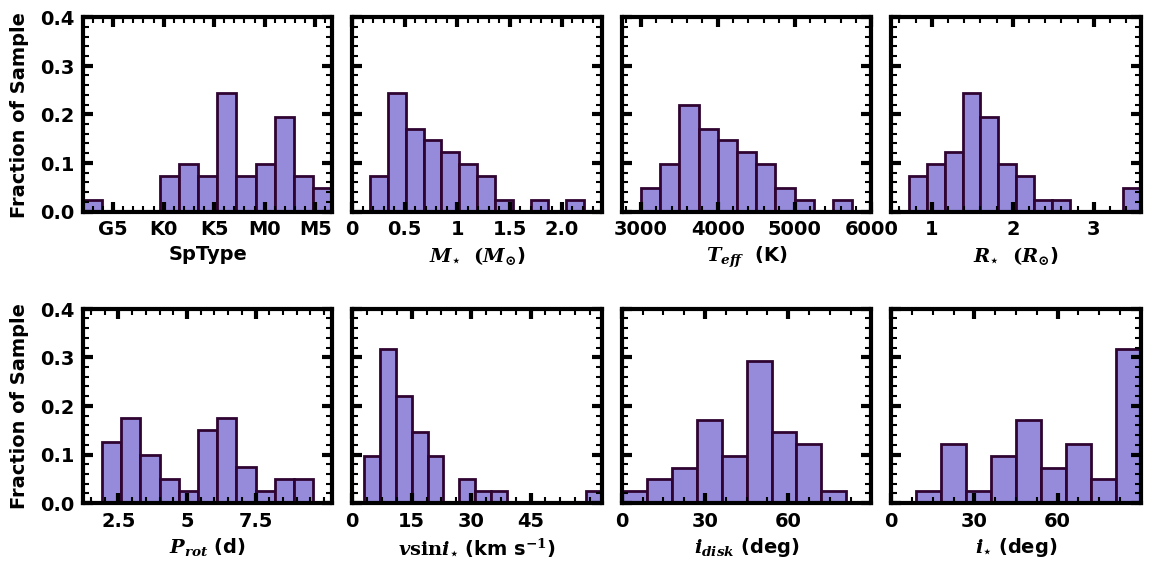

In [370]:
hist_fontsize = 14
hist_title_fontsize = 14
hist_color = '#958bda'  # '#669999'
hist_ylabel = 'Fraction of Sample'
hist_linecolor = '#2f0431'


hists_to_create = {'SpType': {'Title': 'SpType',
                                      'Label': 'SpType',
                                      'Save Text': 'SpType',
                                      'Bin Width': 0.19,
                                      'Bin Range': [3.20, 5.65]  # [3.80, 5.65]
                                      },
                            'Mstar (Msun)': {'Title': 'Stellar Mass',
                                            'Label': r'$M_{\mathdefault{\star}}$  $(M_{\odot}$)',
                                            'Save Text': 'Mstar_distribution_stassun_',
                                            'Bin Width': 0.17,
                                            'Bin Range': [0, 2.25]
                                            },
                            'Teff (K)': {'Title': r'Stellar $T_{eff}$',
                                            'Label': r'$T_{eff}$  (K)',
                                            'Save Text': 'Teff_distribution_stassun_',
                                            'Bin Width': 250,
                                            'Bin Range': [2750, 6000]  # [2750, 5250]
                                            },
                            'Rstar (Rsun)': {'Title': 'Stellar Radius',
                                            'Label': r'$R_{\mathdefault{\star}}$  $(R_{\odot}$)',
                                            'Save Text': 'radii_distribution_stassun_',
                                            'Bin Width': 0.22,
                                            'Bin Range': [0.50, 3.50]  # [0.30, 3.60]
                                            },
                            'Prot (d)': {'Title': 'Rotation Period',
                                        'Label': r'$P_{rot}$ (d)',
                                        'Save Text': 'Prot_distribution_stassun_',
                                        'Bin Width': 0.70,
                                        'Bin Range': [1.2, 9.8]
                                        },
                            'vsini (km/s)': {'Title': r'Stellar $v\mathrm{sin}i_{\mathdefault{\star}}$',
                                            'Label': r'$v\mathrm{sin}i_{\mathdefault{\star}}$ (km s$^{-1}$)',
                                            'Save Text': 'vsini_distribution_stassun_',
                                            'Bin Width': 4,
                                            'Bin Range': [3, 60]  # [3, 38]
                                            },
                            'i pp disk (deg)': {'Title': 'Disk Incl',
                                               'Label': r'$i_{disk}$ (deg)',
                                               'Save Text': 'iDisk_distribution_stassun_',
                                               'Bin Width': 9,
                                               'Bin Range': [0, 90]
                                               },
                            'i star (deg)': {'Title': 'Stellar Incl',
                                            'Label': r'$i_{\mathdefault{\star}}$ (deg)',
                                            'Save Text': 'iStar_distribution_stassun_',
                                            'Bin Width': 9,
                                            'Bin Range': [0, 90]
                                            },
                           }

grid_width = 4
grid_height = 2

fig = plt.figure(figsize=(11.5, 6))
gs = gridspec.GridSpec(grid_height , grid_width , width_ratios=[1, 1, 1, 1])
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height ) for jj in range(grid_width )]
ax_keys = list(hists_to_create.keys())

for ax_i, ax in enumerate(axes):

    ax.minorticks_on()

    bin_width = hists_to_create[ax_keys[ax_i]]['Bin Width']
    hist_bins = np.arange(hists_to_create[ax_keys[ax_i]]['Bin Range'][0], hists_to_create[ax_keys[ax_i]]['Bin Range'][1] + bin_width, bin_width)
    bin_vals_stassun, bin_edges = np.histogram(condensed_df_stassun[ax_keys[ax_i]].values, bins=hist_bins)
    bin_vals_fraction_stassun = bin_vals_stassun / sum(bin_vals_stassun)

    ax.minorticks_on()

    # ax.set_title(hists_to_create[ax_keys[ax_i]]['Title'], fontsize=hist_fontsize)

    # if '\n' not in hists_to_create[ax_keys[ax_i]]['Title']:
    #     ax.text(0.50, 0.86, hists_to_create[ax_keys[ax_i]]['Title'], fontsize=hist_fontsize,
    #             horizontalalignment='center', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
    # else:
    #     ax.text(0.50, 0.78, hists_to_create[ax_keys[ax_i]]['Title'], fontsize=hist_fontsize,
    #             horizontalalignment='center', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
    
    # ax.set_title(hists_to_create[ax_keys[ax_i]]['Title'], fontsize=hist_title_fontsize)
    ax.set_xlabel(hists_to_create[ax_keys[ax_i]]['Label'], fontsize=hist_fontsize)
    if np.mod(ax_i, grid_width ) == 0:
        ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize, labelpad=8)
    else:
        ax.set_yticklabels([])

    ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction_stassun, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center', label='TIC')

    if ((ax_keys[ax_i] == 'Rstar (Rsun)') or (ax_keys[ax_i] == 'i star (deg)')) and (do_all_radii == True):
        bin_vals_all, bin_edges = np.histogram(condensed_df_all[ax_keys[ax_i]].values, bins=hist_bins)
        bin_vals_fraction_all = bin_vals_all / sum(bin_vals_all)
        ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction_all, hatch='///', edgecolor='#33cccc', color='None', lw=2, width=bin_width, align='center', label='Lit')
        ax.legend(loc='upper left', prop={'size': 12}, ncol=2)  # , bbox_to_anchor=(0., 0.5, 0.5, 0.35))

    xmin, xmax = min(hist_bins), max(hist_bins)
    ymin, ymax = 0, 0.40  # 14  # 1.15*max(bin_vals)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    if ax_keys[ax_i] == 'SpType':
        sptype_designations = {'3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,0.5) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'Mstar (Msun)':
        xtickvals = [0, 0.5, 1, 1.5, 2.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'Prot (d)':
        xtickvals = [2.5, 5, 7.5]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if (ax_keys[ax_i] == 'i pp disk (deg)') or (ax_keys[ax_i] == 'i star (deg)'):
        xtickvals = [0, 30, 60]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'vsini (km/s)':
        xtickvals = [0, 15, 30, 45]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)




    ax.tick_params(labelsize=hist_fontsize)

    ax.set_rasterized(True)


fig.subplots_adjust(left=0.07, bottom=0.12, right=0.99, top=0.93, wspace=0.08, hspace=0.50)

if do_all_radii == False:
    save_hist_string = 'Histograms_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_'  + date_str + '.pdf'
else:
    save_hist_string = 'Histograms_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_all_'  + date_str + '.pdf'

if plot_transparent == True:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=True)
else:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=False)

plt.show()


In [371]:
# where_iDisks_master_nan = np.where(np.isnan(iDisks_master) == True)[0]
# print(iDisks_targets_master[where_iDisks_master_nan])
# print(iDisks_source_master[where_iDisks_master_nan])

In [372]:
def truncate_and_normalize(convolution, original_x_array, normalize=False):
    """
    Truncate and normalize the convolution of two probability distributions and
    return the corresponding x-array.

    :param convolution: The convolution result array.
    :param original_x_array: The original x-values array.
    :return: A tuple containing the truncated and normalized convolution array and the corresponding x-array.
    """
    # Determine the spacing between x values (dx)
    dx = np.mean(np.diff(original_x_array))

    # Extend the original x-array to match the convolution range
    extended_x_min = original_x_array[0] - (len(convolution) - len(original_x_array)) / 2 * dx
    extended_x_max = original_x_array[-1] + (len(convolution) - len(original_x_array)) / 2 * dx
    extended_x_array = np.arange(extended_x_min, extended_x_max, dx)

    # Ensure extended array is not longer than the convolution array
    extended_x_array = extended_x_array[:len(convolution)]

    # Find indices where the extended x-array overlaps with the original x-array range
    indices = np.where((extended_x_array >= original_x_array[0]) & (extended_x_array <= original_x_array[-1]))[0]
    truncated_convolution = convolution[indices[0]:indices[-1] + 1]

     # Normalize the truncated convolution
    normalized_convolution = truncated_convolution / (np.sum(truncated_convolution) * dx)

    adjusted_x_array = extended_x_array[indices[0]:indices[-1] + 1]

    if normalize == False:
        return_convolution = truncated_convolution
    else:
        return_convolution = normalized_convolution

    return return_convolution, adjusted_x_array









Number of Disks In Master Population:  153
bandwidth_master:  8.0
bandwidth_filtered:  8.0
bandwidth_istars:  8.0
 


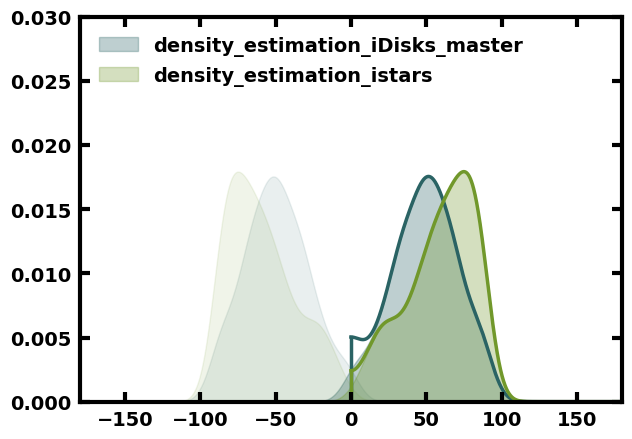

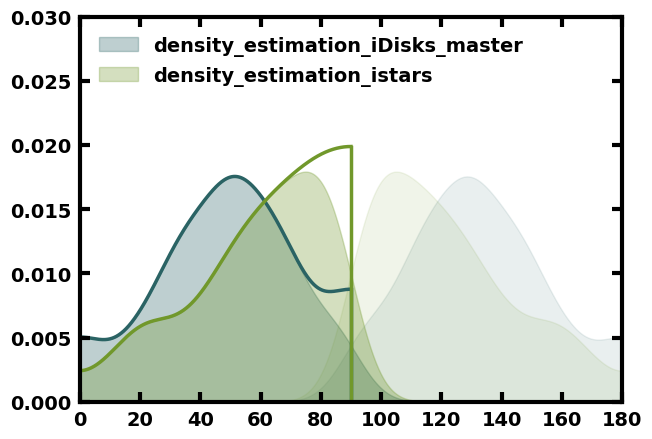

In [373]:
print('Number of Disks In Master Population: ', len(iDisks_master))

kde_n_draws = int(1e3)

Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
x_grid_increment = np.diff(Posteriors['i (deg)'].values)[0]

# x_grid_increment = 0.5
x_grid_values = np.arange(0, 180 + x_grid_increment, x_grid_increment)
x_grid = x_grid_values.reshape(-1, 1)
reverse_x_grid_values = -x_grid_values[::-1][:-1]
all_x_grid_values = np.concatenate((np.array(reverse_x_grid_values), np.array(x_grid_values)))
x_grid_all = np.array(all_x_grid_values).reshape(-1, 1)

kde_color_master = '#666699'
kde_color_filtered = hist_color
kde_color_istars = '#ff527d'

do_MAPs = False
if do_MAPs == False:
    # ------------------ DETERMINE X_GRID ------------------ #
    Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
    # print(Posteriors.columns)
    x_grid_increment = np.diff(Posteriors['i (deg)'].values)[0]
    x_grid_values = np.arange(0, 180 + x_grid_increment, x_grid_increment)
    x_grid = x_grid_values.reshape(-1, 1)
    reverse_x_grid_values = -x_grid_values[::-1][:-1]
    all_x_grid_values = np.concatenate((np.array(reverse_x_grid_values), np.array(x_grid_values)))
    x_grid_draws = x_grid_all[(all_x_grid_values >= 0) & (all_x_grid_values <= 90)]
    x_grid_all = np.array(all_x_grid_values).reshape(-1, 1)
    
    istar_err_ratio = []
    iDisk_filtered_errs = []
    
    # ------------------ DRAW FROM POSTERIORS ------------------ #
    data_for_kde_iDisks_master = [] 
    data_for_kde_iDisks_filtered = []
    data_for_kde_istars = []
    did_plot = 0
    for targetnum in range(len(iDisks_targets_master)):
        # print(iDisks_targets_master[targetnum])

        if iDisks_targets_master[targetnum] in condensed_df_stassun['Simbad Name'].values:

            target_str = iDisks_targets_master[targetnum].replace(' ', '')
            if '/' in iDisks_targets_master[targetnum]:
                target_str = target_str.replace('/', '-')

            Posteriors = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
            iDisk_filtered_errs.append(Posteriors['i Disk +Unc1'].values[0])
            istar_err_ratio.append(np.nanmean([Posteriors['i Star +Unc1'].values[0], Posteriors['i Star -Unc1'].values[0]]))


            P_Delta_i_target_filtered = np.array(Posteriors['P(i Disk | i)'].values)
            P_istar_target = np.array(Posteriors['P(i Star | i)'].values)
            data_for_kde_iDisks_master.extend(choices(x_grid_draws, P_Delta_i_target_filtered, k=kde_n_draws)) 
            data_for_kde_iDisks_filtered.extend(choices(x_grid_draws, P_Delta_i_target_filtered, k=kde_n_draws))
            data_for_kde_istars.extend(choices(x_grid_draws, P_istar_target, k=kde_n_draws))
        else:
            i_disk_dist = norm.pdf(x=x_grid_draws, loc=iDisks_master[targetnum], scale=iDisks_err_master[targetnum])
            disk_draws = choices(x_grid_draws, i_disk_dist, k=kde_n_draws)
            data_for_kde_iDisks_master.extend(disk_draws)   

    data_for_kde_iDisks_master = np.array(data_for_kde_iDisks_master).reshape(-1, 1)
    data_for_kde_iDisks_filtered = np.array(data_for_kde_iDisks_filtered).reshape(-1, 1)
    data_for_kde_istars = np.array(data_for_kde_istars).reshape(-1, 1)

    iDisk_master_err_ratio = iDisks_err_master

    bandwidth_master = 4 * np.nanmedian(iDisk_master_err_ratio)
    bandwidth_filtered = bandwidth_master
    bandwidth_istars = bandwidth_master
    
else:
    data_for_kde_iDisks_master = np.array(iDisks_master).reshape(-1, 1)
    data_for_kde_iDisks_filtered = np.array(condensed_df_stassun['i pp disk (deg)'].values).reshape(-1, 1)
    data_for_kde_istars = np.array(condensed_df_stassun['i star (deg)'].values).reshape(-1, 1)

    iDisk_master_err_ratio = iDisks_err_master

    bandwidth_master = 4 * np.nanmedian(iDisk_master_err_ratio)
    bandwidth_filtered = bandwidth_master
    bandwidth_istars = bandwidth_master

print('bandwidth_master: ', bandwidth_master)
print('bandwidth_filtered: ', bandwidth_filtered)
print('bandwidth_istars: ', bandwidth_istars)
print(' ')


# -------------------------- PERFORM KDE -------------------------- #
kde_iDisks_master = KernelDensity(kernel='gaussian', bandwidth=bandwidth_master).fit(data_for_kde_iDisks_master)
kde_iDisks_filtered = KernelDensity(kernel='gaussian', bandwidth=bandwidth_filtered).fit(data_for_kde_iDisks_filtered)
kde_istars = KernelDensity(kernel='gaussian', bandwidth=bandwidth_istars).fit(data_for_kde_istars)


log_density_iDisks_master = kde_iDisks_master.score_samples(x_grid_all)
log_density_iDisks_filtered = kde_iDisks_filtered.score_samples(x_grid_all)
log_density_istars = kde_istars.score_samples(x_grid_all)

density_estimation_iDisks_master = np.array(np.exp(log_density_iDisks_master))
density_estimation_iDisks_filtered = np.array(np.exp(log_density_iDisks_filtered))
density_estimation_istars = np.array(np.exp(log_density_istars))

# plt.plot(x_grid_all, density_estimation_iDisks_master, label='density_estimation_iDisks_master')
# plt.plot(x_grid_all, density_estimation_istars, label='density_estimation_istars')
# plt.ylim(0, 0.03)
# plt.xlim(min(x_grid_all), max(x_grid_all))
# plt.legend(loc='best')
# plt.show()



# -------------------------- FOLD VALUES LESS THAN 0 -------------------------- #
density_estimation_mirrored_iDisks_master_1 = density_estimation_iDisks_master[::-1]
density_estimation_mirrored_iDisks_filtered_1 = density_estimation_iDisks_filtered[::-1]
density_estimation_mirrored_istars_1 = density_estimation_istars[::-1]

density_estimation_total_iDisks_master_bep = density_estimation_iDisks_master + density_estimation_mirrored_iDisks_master_1
density_estimation_total_iDisks_filtered_bep = density_estimation_iDisks_filtered + density_estimation_mirrored_iDisks_filtered_1
density_estimation_total_istars_bep = density_estimation_istars + density_estimation_mirrored_istars_1

density_estimation_total_positive_x_iDisks_master_bep = density_estimation_total_iDisks_master_bep[all_x_grid_values >= 0]
density_estimation_total_positive_x_iDisks_filtered_bep = density_estimation_total_iDisks_filtered_bep[all_x_grid_values >= 0]
density_estimation_total_positive_x_istars_bep = density_estimation_total_istars_bep[all_x_grid_values >= 0]

x_grid_positive = all_x_grid_values[all_x_grid_values >= 0]

plt.fill_between(all_x_grid_values, density_estimation_iDisks_master, alpha=0.3, color='#2a6364', label='density_estimation_iDisks_master', zorder=0)
plt.fill_between(all_x_grid_values, density_estimation_mirrored_iDisks_master_1, alpha=0.1, color='#2a6364', zorder=0)
plt.plot(x_grid_positive, density_estimation_total_positive_x_iDisks_master_bep, color='#2a6364', alpha=1, zorder=1)
plt.plot([x_grid_positive[0], x_grid_positive[0]], [0, density_estimation_total_positive_x_iDisks_master_bep[0]], color='#2a6364', alpha=1, zorder=1)
plt.fill_between(all_x_grid_values, density_estimation_istars, alpha=0.3, color='#71982b', label='density_estimation_istars', zorder=0)
plt.fill_between(all_x_grid_values, density_estimation_mirrored_istars_1, alpha=0.1, color='#71982b', zorder=0)
plt.plot(x_grid_positive, density_estimation_total_positive_x_istars_bep, color='#71982b', alpha=1, zorder=1)
plt.plot([x_grid_positive[0], x_grid_positive[0]], [0, density_estimation_total_positive_x_istars_bep[0]], color='#71982b', alpha=1, zorder=1)
plt.ylim(0, 0.03)
plt.xlim(min(all_x_grid_values), max(all_x_grid_values))
plt.legend(loc='upper left')
plt.show()



# -------------------------- FOLD VALUES GREATER THAN 90 -------------------------- #
density_estimation_mirrored_iDisks_master_2 = density_estimation_total_positive_x_iDisks_master_bep[::-1]
density_estimation_mirrored_iDisks_filtered_2 = density_estimation_total_positive_x_iDisks_filtered_bep[::-1]
density_estimation_mirrored_istars_2 = density_estimation_total_positive_x_istars_bep[::-1]

density_estimation_total_iDisks_master = density_estimation_total_positive_x_iDisks_master_bep + density_estimation_mirrored_iDisks_master_2
density_estimation_total_iDisks_filtered = density_estimation_total_positive_x_iDisks_filtered_bep + density_estimation_mirrored_iDisks_filtered_2
density_estimation_total_iDisks_istars = density_estimation_total_positive_x_istars_bep + density_estimation_mirrored_istars_2

density_estimation_total_positive_x_iDisks_master = density_estimation_total_iDisks_master[x_grid_positive <= 90]
density_estimation_total_positive_x_iDisks_filtered = density_estimation_total_iDisks_filtered[x_grid_positive <= 90]
density_estimation_total_positive_x_istars = density_estimation_total_iDisks_istars[x_grid_positive <= 90]

x_grid_plot = x_grid_positive[x_grid_positive <= 90]

plt.fill_between(x_grid_positive, density_estimation_total_positive_x_iDisks_master_bep, alpha=0.3, color='#2a6364', label='density_estimation_iDisks_master', zorder=0)
plt.fill_between(x_grid_positive, density_estimation_mirrored_iDisks_master_2, alpha=0.1, color='#2a6364', zorder=0)
plt.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_master, color='#2a6364', alpha=1, zorder=1)
plt.plot([x_grid_plot[-1], x_grid_plot[-1]], [0, density_estimation_total_positive_x_iDisks_master[-1]], color='#2a6364', alpha=1, zorder=1)
plt.fill_between(x_grid_positive, density_estimation_total_positive_x_istars_bep, alpha=0.3, color='#71982b', label='density_estimation_istars', zorder=0)
plt.fill_between(x_grid_positive, density_estimation_mirrored_istars_2, alpha=0.1, color='#71982b', zorder=0)
plt.plot(x_grid_plot, density_estimation_total_positive_x_istars, color='#71982b', alpha=1, zorder=1)
plt.plot([x_grid_plot[-1], x_grid_plot[-1]], [0, density_estimation_total_positive_x_istars[-1]], color='#71982b', alpha=1, zorder=1)
plt.ylim(0, 0.03)
plt.xlim(min(x_grid_positive), max(x_grid_positive))
plt.legend(loc='upper left')
plt.show()



# -------------------------- MULTIPLY MASTER DISKS AND FILTERED STARS -------------------------- #
density_estimation_total_positive_x_iDisks_master_convolved_with_istars = density_estimation_total_positive_x_iDisks_master * density_estimation_total_positive_x_istars
density_estimation_total_positive_x_iDisks_master_convolved_with_istars = density_estimation_total_positive_x_iDisks_master_convolved_with_istars / (sum(density_estimation_total_positive_x_iDisks_master_convolved_with_istars) * np.diff(all_x_grid_values)[0])




K-S Statistic: 0.3646341463414634
p-value:  0.03558589552942029
 
Area under KDE (Trapz):  0.9992 Close enough to 1:  True





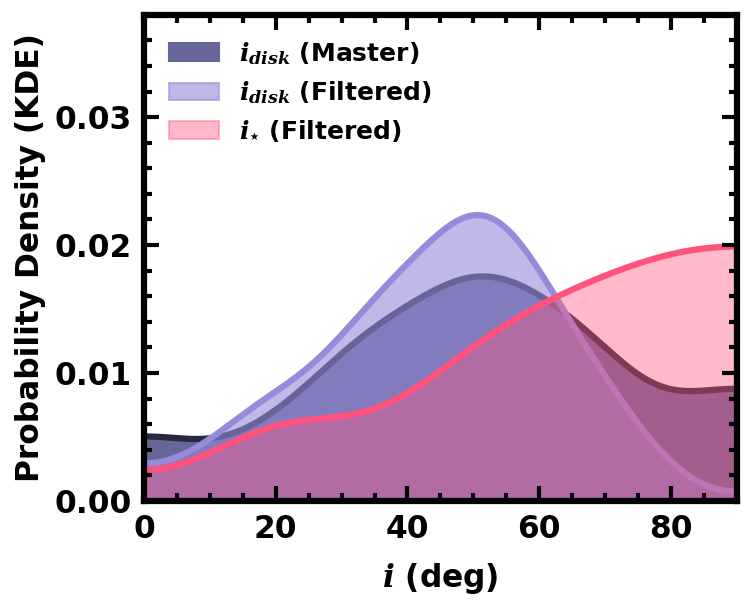

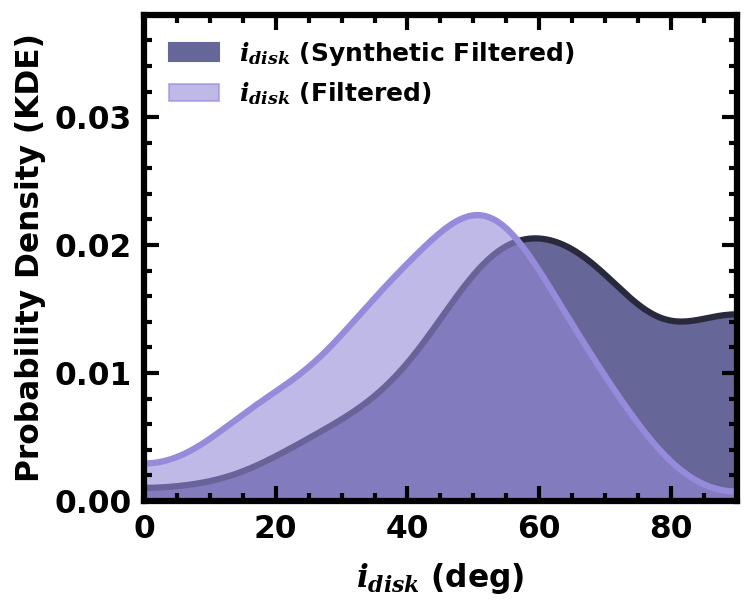

In [374]:
ks_n_draws = int(len(condensed_df_stassun))
ks_rounds = 100
ks_tests = []
p_tests = []
for round_i in range(ks_rounds):
    synthetic_iDisk_population = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, k=ks_n_draws)
    filtered_iDisk_population = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, k=ks_n_draws)
    ks_statistic, p_value = stats.ks_2samp(synthetic_iDisk_population,filtered_iDisk_population)
    ks_tests.append(ks_statistic)
    p_tests.append(p_value)

print('K-S Statistic:', np.mean(ks_tests))
print('p-value: ', np.mean(p_tests))
print(' ')

total_area_trapz = np.trapz(density_estimation_total_positive_x_iDisks_master_convolved_with_istars,  x_grid_plot)
closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
print('Area under KDE (Trapz): ', round(total_area_trapz, 4), 'Close enough to 1: ', closeness_trapz)
print('\n\n')




Delta_i_hist_fontsize = 15





fig = plt.figure(figsize=(5, 4), dpi=150)
ax = fig.add_subplot(111)
ax.minorticks_on()

ax.set_xlabel(r'$i$ (deg)', fontsize=Delta_i_hist_fontsize, labelpad=8)
ax.set_ylabel('Probability Density (KDE)', fontsize=Delta_i_hist_fontsize)

ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_master, color=kde_color_master, label=r'$i_{disk}$ (Master)', alpha=1, zorder=-2)
ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_master, color='#29293d', lw=3, zorder=-2)
ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color=kde_color_filtered, label=r'$i_{disk}$ (Filtered)', alpha=0.6, zorder=-1)
ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color=kde_color_filtered, lw=3, zorder=-1)
ax.fill_between(x_grid_plot, density_estimation_total_positive_x_istars, color=kde_color_istars, label=r'$i_{\mathdefault{\star}}$ (Filtered)', alpha=0.4, zorder=0)
ax.plot(x_grid_plot, density_estimation_total_positive_x_istars, color=kde_color_istars, lw=3, zorder=-0)

ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

ax.legend(loc='upper left', prop={'size': 12}, ncol=1)

ax.set_xlim(0, 90)
ax.set_ylim(0, 0.038)

fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

plt.show()





fig = plt.figure(figsize=(5, 4), dpi=150)
ax = fig.add_subplot(111)
ax.minorticks_on()

ax.set_xlabel(r'$i_{disk}$ (deg)', fontsize=Delta_i_hist_fontsize, labelpad=8)
ax.set_ylabel('Probability Density (KDE)', fontsize=Delta_i_hist_fontsize)

ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, color=kde_color_master, label=r'$i_{disk}$ (Synthetic Filtered)', alpha=1, zorder=-2)
ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, color='#29293d', lw=3, zorder=-2)
ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color=kde_color_filtered, label=r'$i_{disk}$ (Filtered)', alpha=0.6, zorder=-1)
ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color=kde_color_filtered, lw=3, zorder=-1)

ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

ax.legend(loc='upper left', prop={'size': 12}, ncol=1)

ax.set_xlim(0, 90)
ax.set_ylim(0, 0.038)

fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

plt.show()

In [375]:
n_draws = int(1e7)
i_disk_rand_from_kde = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, k=n_draws)
i_star_rand_from_kde = choices(x_grid_plot, density_estimation_total_positive_x_istars, k=n_draws)
i_diff_rand_from_kde = abs(np.array(i_disk_rand_from_kde) - i_star_rand_from_kde)


new_x_bins = np.concatenate((x_grid_plot, [x_grid_plot[-1] + np.diff(x_grid_plot)[0]]))
bin_vals_i_diff, _ = np.histogram(i_diff_rand_from_kde, bins=new_x_bins)  # , density=True)

bin_vals_i_diff[0] = bin_vals_i_diff[1]

smooth_on = True
if smooth_on == True:
    smooth_over_deg = 0.5  #  bandwidth_master
    smooth_over_points = int(smooth_over_deg/np.diff(x_grid_plot)[0])
    if np.mod(smooth_over_points,2) != 0:
        smooth_over_points += 1
    smooth_vals_i_diff = gaussian_filter1d(bin_vals_i_diff, smooth_over_points)  # , mode='nearest')
    i_diff_dist_from_kde = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * np.diff(x_grid_plot)[0])
else:
    i_diff_dist_from_kde = bin_vals_i_diff / (sum(bin_vals_i_diff) * np.diff(x_grid_plot)[0])



total_area_trapz = np.trapz(i_diff_dist_from_kde,  x_grid_plot)
closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
print('Area under KDE (Trapz): ', round(total_area_trapz, 4), 'Close enough to 1: ', closeness_trapz)

print('\ndx = ', np.diff(x_grid_plot)[0])

Area under KDE (Trapz):  0.9989 Close enough to 1:  True

dx =  0.1


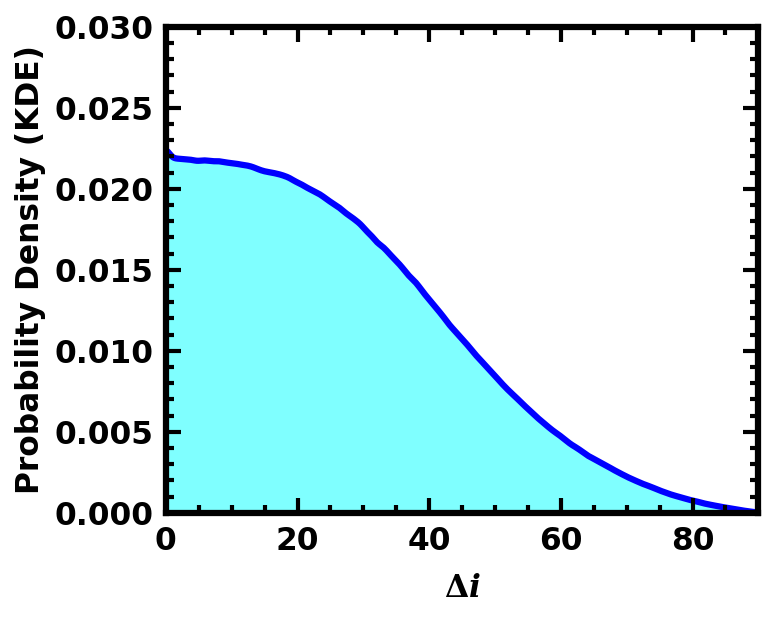

In [377]:
fig = plt.figure(figsize=(5, 4), dpi=150)
ax = fig.add_subplot(111)
ax.minorticks_on()

ax.set_xlabel(r'$\Delta i$', fontsize=Delta_i_hist_fontsize, labelpad=8)
ax.set_ylabel('Probability Density (KDE)', fontsize=Delta_i_hist_fontsize)

ax.fill_between(x_grid_plot, i_diff_dist_from_kde, color='cyan', alpha=0.5, zorder=-2)
ax.plot(x_grid_plot, i_diff_dist_from_kde, color='blue', lw=3, zorder=-2)

ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

# ax.legend(loc='upper left', prop={'size': 12}, ncol=1)

ax.set_xlim(0, 90)
ax.set_ylim(0, 0.03)
fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

plt.show()

In [378]:
condensed_df_stassun.columns

Index(['Target', 'Simbad Name', 'RA', 'DEC', 'SpType', 'SpType Unc',
       'i pp disk (deg)', 'i pp disk Unc', 'Rstar (Rsun)', 'Rstar Unc',
       'Mstar (Msun)', 'Mstar Unc', 'Prot (d)', 'Prot Unc', 'vsini (km/s)',
       'vsini Unc', 'Teff (K)', 'Teff Unc', 'Age (Myr)', 'Age Unc',
       'Lstar (Lsun)', 'Lstar Unc', 'i star (deg)', 'i star +Unc',
       'i star -Unc', 'disk diff', 'disk diff +Unc', 'disk diff -Unc', 'Veq',
       'Veq Unc'],
      dtype='object')

Precision of high incl vsinis: 
0.04 +/- 0.04
Precision of low incl vsinis: 
0.03 +/- 0.05
Precision of full sample vsinis: 
0.03 +/- 0.05


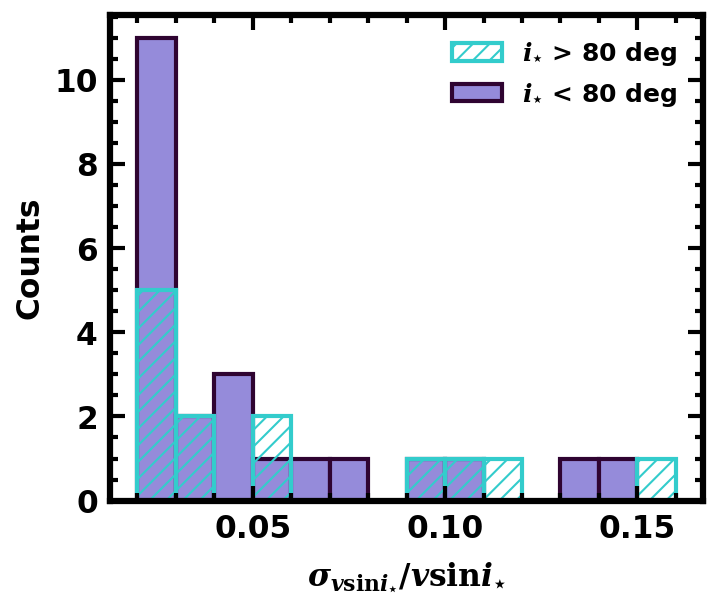

In [379]:
fig = plt.figure(figsize=(5, 4), dpi=150)
ax = fig.add_subplot(111)
# ax_twin = ax.twinx()

ax.minorticks_on()
# ax_twin.minorticks_on()

Delta_i_hist_fontsize = 15

ax.set_xlabel(r'$\sigma_{v\mathrm{sin}i_{\mathdefault{\star}}}$/$v\mathrm{sin}i_{\mathdefault{\star}}$', fontsize=Delta_i_hist_fontsize, labelpad=8)
ax.set_ylabel('Counts', fontsize=Delta_i_hist_fontsize)

high_incl_stars_df = condensed_df_stassun[condensed_df_stassun['i star (deg)'].values >= 80]
low_incl_stars_df = condensed_df_stassun[condensed_df_stassun['i star (deg)'].values < 80]
# all_incl_stars_df = condensed_df_stassun[condensed_df_stassun['vsini Unc'].values != 'ulimit']

# high_incl_stars_df = high_incl_stars_df[high_incl_stars_df['vsini Unc'].values != 'ulimit']
# low_incl_stars_df = low_incl_stars_df[low_incl_stars_df['vsini Unc'].values != 'ulimit']

hist_vsinis_high_incl_stars = np.array(high_incl_stars_df['vsini (km/s)'].values)
hist_vsini_errs_high_incl_stars = np.array([float(fweee) for fweee in high_incl_stars_df['vsini Unc'].values])
hist_vsinis_low_incl_stars = np.array(low_incl_stars_df['vsini (km/s)'].values)
hist_vsini_errs_low_incl_stars = np.array([float(fweee) for fweee in low_incl_stars_df['vsini Unc'].values])
hist_vsinis_all_incl_stars = np.array(condensed_df_stassun['vsini (km/s)'].values)
hist_vsini_errs_all_incl_stars = np.array([float(fweee) for fweee in condensed_df_stassun['vsini Unc'].values])


sigma_vsini_ratio_high_incl_stars = hist_vsini_errs_high_incl_stars / hist_vsinis_high_incl_stars
sigma_vsini_ratio_low_incl_stars = hist_vsini_errs_low_incl_stars / hist_vsinis_low_incl_stars
sigma_vsini_ratio_all_incl_stars = hist_vsini_errs_all_incl_stars / hist_vsinis_all_incl_stars


print('Precision of high incl vsinis: ')
print(np.median(sigma_vsini_ratio_high_incl_stars).round(2), '+/-', np.std(sigma_vsini_ratio_high_incl_stars, ddof=1).round(2))
print('Precision of low incl vsinis: ')
print(np.median(sigma_vsini_ratio_low_incl_stars).round(2), '+/-', np.std(sigma_vsini_ratio_low_incl_stars, ddof=1).round(2))
print('Precision of full sample vsinis: ')
print(np.median(sigma_vsini_ratio_all_incl_stars).round(2), '+/-', np.std(sigma_vsini_ratio_all_incl_stars, ddof=1).round(2))


hist_vsini_bin_width = 0.01
hist_vsini_bins = np.arange(0.02, 0.15 + hist_vsini_bin_width, hist_vsini_bin_width)

bin_vals_high_incl_stars, bin_edges_high_incl_stars = np.histogram(sigma_vsini_ratio_high_incl_stars, bins=hist_vsini_bins)
bin_vals_low_incl_stars, bin_edges_low_incl_stars = np.histogram(sigma_vsini_ratio_low_incl_stars, bins=hist_vsini_bins)

ax.bar(bin_edges_high_incl_stars[:-1] + 0.5*hist_vsini_bin_width , bin_vals_high_incl_stars, hatch='///', edgecolor='#33cccc', color='None', lw=2, width=hist_vsini_bin_width, align='center', label=r'$i_{\mathdefault{\star}}}$ > 80 deg', zorder=-1)
ax.bar(bin_edges_low_incl_stars[:-1] + 0.5*hist_vsini_bin_width , bin_vals_low_incl_stars, edgecolor=hist_linecolor, color=hist_color, lw=2, width=hist_vsini_bin_width, align='center', label=r'$i_{\mathdefault{\star}}}$ < 80 deg', zorder=-2)

ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

ax.legend(loc='upper right', prop={'size': 12}, ncol=1)

# fig.subplots_adjust(left=0.16, bottom=0.10, right=0.93, top=0.975, wspace=0.12, hspace=0.35)
fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

plt.show()

In [380]:
if run_physicality_tests == True:

    Delta_i_hist_fontsize = 15

    # temporary_df1 = condensed_df_only_stassun  # [condensed_df_only_stassun['vsini Unc'].values != 'ulimit']
    # temporary_df1_all = np.copy(condensed_df_no_stassun)  # [condensed_df_no_stassun['vsini Unc'].values != 'ulimit']

    bep_list = ['2MASS J04322210+1827426', 'AA Tau', 'DoAr 25', 'IQ Tau', 'WSB 52', 'WSB 67']  # , 'WSB 63']
    bep_radii = []
    bep_radii_err = []
    bep_vsini = []
    bep_vsini_err = []
    bep_prot = []
    bep_prot_err = []
    bep_names = []

    bep_radii_all = []
    for bep_i in range(len(bep_list)):
        temporary_df2 = condensed_df_only_stassun[condensed_df_only_stassun['Simbad Name'].values == bep_list[bep_i]]
        temporary_df2_all = condensed_df_no_stassun[condensed_df_no_stassun['Simbad Name'].values == bep_list[bep_i]]
        bep_radii.append(temporary_df2['Rstar (Rsun)'].values[0])
        bep_radii_err.append(temporary_df2['Rstar Unc'].values[0])
        bep_vsini.append(temporary_df2['vsini (km/s)'].values[0])
        bep_vsini_err.append(temporary_df2['vsini Unc'].values[0])
        bep_prot.append(temporary_df2['Prot (d)'].values[0])
        bep_prot_err.append(temporary_df2['Prot Unc'].values[0])
        bep_radii_all.append(temporary_df2_all['Rstar (Rsun)'].values[0])
        bep_names.append(bep_list[bep_i])

    check_values = {'Simbad Name': bep_names,
                    'Rstar (Rsun)': bep_radii,
                    'Rstar Unc': bep_radii_err,
                    'vsini (km/s)': bep_vsini,
                    'vsini Unc': bep_vsini_err,
                    'Prot (d)': bep_prot,
                    'Prot Unc': bep_prot_err,
                    }

    check_props = ['Rstar (Rsun)', 'vsini (km/s)', 'Prot (d)']
    for check_prop in check_props:
        fig = plt.figure(figsize=(5, 4), dpi=150)
        ax = fig.add_subplot(111)
        ax.minorticks_on()

        ax.set_xlabel(hists_to_create[check_prop]['Label'], fontsize=Delta_i_hist_fontsize, labelpad=8)
        ax.set_ylabel('Counts', fontsize=Delta_i_hist_fontsize)

        check_bin_width = hists_to_create[check_prop]['Bin Width']
        check_hist_bins = np.arange(hists_to_create[check_prop]['Bin Range'][0], hists_to_create[check_prop]['Bin Range'][1] + check_bin_width, check_bin_width)

        check_hist_vals, check_hist_bin_edges = np.histogram(check_values[check_prop], bins=check_hist_bins)
        all_hist_vals, all_hist_bin_edges = np.histogram(condensed_df_only_stassun[check_prop].values, bins=check_hist_bins)


        ax.bar(check_hist_bin_edges[:-1] + 0.5*check_bin_width, check_hist_vals, hatch='///', edgecolor='#33cccc', color='None', lw=2, width=check_bin_width, align='center', label='non-physical', zorder=-1)
        ax.bar(all_hist_bin_edges[:-1] + 0.5*check_bin_width, all_hist_vals, edgecolor=hist_linecolor, color=hist_color, lw=2, width=check_bin_width, align='center', label='all', zorder=-2)

        ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
        ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

        ax.legend(loc='upper right', prop={'size': 12}, ncol=1)

        # fig.subplots_adjust(left=0.16, bottom=0.10, right=0.93, top=0.975, wspace=0.12, hspace=0.35)
        fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

        plt.show()


    pass_targets = ['HQ Tau', 'SU Aur', 'Sz 73', 'WSB 67', 'HP Tau']
    no_stassun_radii = []
    only_stassun_radii = []
    check_stassun_radii = []
    check_all_radii = []
    no_stassun_periods = []
    only_stassun_periods = []
    no_stassun_vsini = []
    only_stassun_vsini = []
    for meep in range(len(condensed_df_all['Simbad Name'].values)):
        if (condensed_df_no_stassun['Simbad Name'].values[meep] in condensed_df_only_stassun['Simbad Name'].values) and (condensed_df_no_stassun['Simbad Name'].values[meep] not in bep_list):
            no_stassun_radii.append(condensed_df_no_stassun['Rstar (Rsun)'].values[meep])
            only_stassun_radii.append(condensed_df_only_stassun['Rstar (Rsun)'].values[meep])
            no_stassun_periods.append(condensed_df_no_stassun['Prot (d)'].values[meep])
            only_stassun_periods.append(condensed_df_only_stassun['Prot (d)'].values[meep])
            no_stassun_vsini.append(condensed_df_no_stassun['vsini (km/s)'].values[meep])
            only_stassun_vsini.append(condensed_df_only_stassun['vsini (km/s)'].values[meep])


    fig = plt.figure(figsize=(5, 4), dpi=150)
    ax = fig.add_subplot(111)
    ax.minorticks_on()

    ax.set_xlabel(r'$R_{S19}/R_{lit}$', fontsize=Delta_i_hist_fontsize, labelpad=8)
    ax.set_ylabel('Counts', fontsize=Delta_i_hist_fontsize)

    check_bin_width = 0.15
    check_hist_bins = np.arange(0.4, 2. + check_bin_width, check_bin_width)

    check_fractional_radii = np.array(bep_radii)/np.array(bep_radii_all)
    print(condensed_df_only_stassun['Rstar (Rsun)'].values)
    print()
    print(print(condensed_df_only_stassun['Rstar (Rsun)'].values))
    # check_fractional_radii = np.array(check_stassun_radii)/np.array(check_all_radii)
    all_fractional_radii = np.array(only_stassun_radii)/np.array(no_stassun_radii)

    check_hist_vals, check_hist_bin_edges = np.histogram(check_fractional_radii, bins=check_hist_bins)
    all_hist_vals, all_hist_bin_edges = np.histogram(all_fractional_radii, bins=check_hist_bins)


    ax.bar(check_hist_bin_edges[:-1] + 0.5*check_bin_width, check_hist_vals, hatch='///', edgecolor='#33cccc', color='None', lw=2, width=check_bin_width, align='center', label='non-physical', zorder=-1)
    ax.bar(all_hist_bin_edges[:-1] + 0.5*check_bin_width, all_hist_vals, edgecolor=hist_linecolor, color=hist_color, lw=2, width=check_bin_width, align='center', label='all', zorder=-2)

    ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
    ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

    ax.legend(loc='upper right', prop={'size': 12}, ncol=1)

    # fig.subplots_adjust(left=0.16, bottom=0.10, right=0.93, top=0.975, wspace=0.12, hspace=0.35)
    fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

    plt.show()

    check_offset = round((1. - np.mean(check_fractional_radii))*100)
    all_offet = round((1. - np.mean(all_fractional_radii))*100)

    # print('check: ', round((1. - np.mean(check_fractional_radii))*100,2), '+/-', round(np.std(check_fractional_radii, ddof=1)*100,2))
    # print('all: ', round((1. - np.mean(all_fractional_radii))*100,2), '+/-', round(np.std(all_fractional_radii, ddof=1)*100,2))
    print('check: ', check_offset, '+/-', round(np.std(check_fractional_radii, ddof=1)*100))
    print('all: ', all_offet, '+/-', round(np.std(all_fractional_radii, ddof=1)*100))

In [381]:
if do_all_radii == True:

    check_rstars = (np.array(check_values['Rstar (Rsun)']) * u.Rsun).to(u.km).value
    check_rstars_err = (np.array(check_values['Rstar Unc']) * u.Rsun).to(u.km).value
    check_prots = (np.array(check_values['Prot (d)']) * u.d).to(u.s).value
    check_prots_err = (np.array(check_values['Prot Unc']) * u.d).to(u.s).value
    check_vsinis = np.array(check_values['vsini (km/s)'])
    check_vsinis_err = np.array(check_values['vsini Unc'])

    check_veqs = (2 * np.pi * check_rstars)/(check_prots)
    check_veqs_err = check_veqs * np.sqrt((check_rstars_err/check_rstars)**2 + (check_prots_err/check_prots)**2)

    check_veqs_minus_vsinis = check_veqs - check_vsinis
    check_veqs_minus_vsinis_1sig = []
    check_veqs_minus_vsinis_2sig = []
    for vsini_err_i in range(len(check_vsinis)):
        check_veqs_minus_vsinis_1sig.append(np.sqrt(float(check_vsinis_err[vsini_err_i])**2 + check_veqs_err[vsini_err_i]**2))
        check_veqs_minus_vsinis_2sig.append(2*np.sqrt(float(check_vsinis_err[vsini_err_i])**2 + check_veqs_err[vsini_err_i]**2))

    for rawr in range(len(check_veqs)):
        # print(check_veqs[rawr], '+/-', check_veqs_err[rawr])
        print(check_veqs_minus_vsinis[rawr], '+/-', check_veqs_minus_vsinis_2sig[rawr])


    colormap = choose_cmap('cyber grape', reverse_cmap=False)
    max_cbar_limit = 55  # 
    parameter_z_norm = plt.Normalize(0, max_cbar_limit)
    point_colors = [colormap(parameter_z_norm(bep)) for bep in condensed_df_stassun['disk diff'].values]
    point_size = 8
    point_colors = '#669999'

    fig4 = plt.figure(figsize=(7, 8), dpi=150)
    ax = fig4.add_subplot(111)
    # ax.set_title(r'$v_{eq}$ - $v\mathrm{sin}i$')
    ax.set_ylabel(r'$v_{eq}$ - $v\mathrm{sin}i$  (km s$^{-1}$)', fontsize=16, labelpad=10)

    where_ymin = np.where(check_veqs_minus_vsinis == min(check_veqs_minus_vsinis))[0]
    where_ymax = np.where(check_veqs_minus_vsinis == max(check_veqs_minus_vsinis))[0]

    x_spacing = 1
    x_array = np.arange(0, x_spacing*len(check_veqs_minus_vsinis), x_spacing)
    xmin, xmax = min(x_array) - x_spacing, max(x_array) + x_spacing
    # ymin, ymax =  min(veqs_minus_vsinis_stassun) - 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun)), max(veqs_minus_vsinis_stassun) + 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun))

    ax.plot([xmin, xmax], [0, 0], linestyle=':', color=zeroline_color, lw=2.5, alpha=1., zorder=-3)
    ax.scatter(x_array, check_veqs_minus_vsinis, edgecolors=point_color, linewidth=2, s=np.pi*point_size**2, color=point_colors, linestyle='None')
    ax.errorbar(x_array, check_veqs_minus_vsinis, yerr=check_veqs_minus_vsinis_1sig, elinewidth=3, linewidth=0, capsize=0, ecolor=point_color, capthick=12, zorder=-1)
    ax.errorbar(x_array, check_veqs_minus_vsinis, yerr=check_veqs_minus_vsinis_2sig, elinewidth=3, linewidth=0, capsize=0, ecolor=point_color, capthick=12, alpha=0.3, zorder=-2)

    ax.minorticks_on()
    ax.tick_params(axis='y', which='minor', length=4, width=2)
    ax.tick_params(axis='x', which='minor', length=0, width=0)
    ax.tick_params(which='major', length=7, width=2, labelsize=16)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(-15, 5)  # ymin,  ymax)

    # test_targs = condensed_df_stassun['Simbad Name'].values
    xlabels = [targ_label.replace('2MASS ', '') for targ_label in bep_names]
    ax.set_xticks(x_array)
    xticklabels = ax.set_xticklabels(xlabels, fontsize=15, rotation=90)

    fig4.tight_layout()

    ax.set_rasterized(True)


    # save_veq_vsini_string = 'veq_vsini_' + resolution_text + '_' +  light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_'  + date_str + '.pdf'

    # if plot_transparent == True:
    #     fig4.savefig(test_figures_directory + save_veq_vsini_string, dpi=300, transparent=True)
    # else:
    #     fig4.savefig(test_figures_directory + save_veq_vsini_string, dpi=300, transparent=False)


    plt.show()

In [382]:
Delta_i_Rayleigh_logUniformPrior_file = HBM_directory + 'Delta_inclination_rayleigh_log-uniform.h5'
Delta_i_Rayleigh_gaussianPrior_file = HBM_directory + 'Delta_inclination_rayleigh_gaussian.h5'
Delta_i_Gaussian_logUniformPrior_file = HBM_directory + 'Delta_inclination_gaussian_log-uniform.h5'
Delta_i_Gaussian_gaussianPrior_file = HBM_directory + 'Delta_inclination_gaussian_gaussian.h5'

R_lU_label = r'Rayleigh ($log$-U Pr)'
R_G_label = r'Rayleigh (G Pr)'
G_lU_label = r'Gaussian ($log$-U Pr)'
G_G_label = r'Gaussian (G Pr)'

Delta_i_HBM_files = {R_lU_label: {'File Path': Delta_i_Rayleigh_logUniformPrior_file,
                                  },
                    R_G_label: {'File Path': Delta_i_Rayleigh_gaussianPrior_file,
                                },
                    G_lU_label: {'File Path': Delta_i_Gaussian_logUniformPrior_file,
                                 },
                    G_G_label: {'File Path': Delta_i_Gaussian_gaussianPrior_file,
                                },
                    }

In [383]:
def list_datasets(hdf5_file):
    def traverse_datasets(hdf_object):
        """Traverse HDF5 structure and print datasets."""
        if isinstance(hdf_object, h5py.Dataset):
            datasets.append(hdf_object.name)

        elif isinstance(hdf_object, h5py.Group):
            for key in hdf_object:
                traverse_datasets(hdf_object[key])

    datasets = []
    with h5py.File(hdf5_file, 'r') as file:
        traverse_datasets(file)
    return datasets

all_datasets = list_datasets(Delta_i_Rayleigh_logUniformPrior_file)
all_datasets

['/mcmc/accepted', '/mcmc/chain', '/mcmc/log_prob']

In [384]:
# with h5py.File(Delta_i_Gaussian_logUniformPrior_file, 'r') as file:
#     data_accepted = file['/mcmc/accepted'][()]
#     data_chain = file['/mcmc/chain'][()]
#     data_logprob = file['/mcmc/log_prob'][()]
#     # data_mcmc = file['/mcmc']


# # import scipy
# # help(data_mcmc)
# # data_mcmc['accepted']
# print(data_accepted.shape)
# print(data_chain.shape)
# print(data_logprob.shape)
# print(data_accepted)
# print(' ')
# data_accepted = [int(bep) for bep in data_accepted]
# plt.plot(data_logprob[data_accepted])
# plt.show()
# print(data_chain[data_accepted, :, 0][0])

In [385]:
for HBM_key in list(Delta_i_HBM_files.keys()):
    print(HBM_key)
    
    with h5py.File(Delta_i_HBM_files[HBM_key]['File Path'], 'r') as file:
        data_accepted = file['/mcmc/accepted'][()]
        data_chain = file['/mcmc/chain'][()]
        data_logprob = file['/mcmc/log_prob'][()]
    
    data_accepted = [int(bep) for bep in data_accepted]
    x_model = np.linspace(0, 1.001, 1000)
    ivals = x_model*90.
    accepted_models = []

    if 'Rayleigh ' in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        accepted_chains = data_chain[data_accepted, :, 0]
        for chain_i in range(len(accepted_chains)):
            model_profile = x_model/(np.mean(accepted_chains[chain_i])**2) * np.exp((-x_model**2)/(2*np.mean(accepted_chains[chain_i])**2))
            for beep_i in range(len(model_profile)):
                accepted_models.append(model_profile)

    if 'Gaussian ' in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        accepted_chains_mu = data_chain[data_accepted, :, 0]
        accepted_chains_sigma = data_chain[data_accepted, :, 1]
        for chain_j in range(len(accepted_chains_mu)):
            model_profile = norm.pdf(x=x_model, loc=np.mean(accepted_chains_mu[chain_j]), scale=np.mean(accepted_chains_sigma[chain_j]))
            for beep_i in range(len(model_profile)):
                accepted_models.append(model_profile)

    rayleighs_transposed = np.transpose(accepted_models)
    mean_profile = []
    for ral_i in range(len(rayleighs_transposed)):
        mean_profile.append(np.mean(rayleighs_transposed[ral_i]))

    mean_profile = mean_profile/(sum(mean_profile) * np.diff(ivals)[0])
    
    Delta_i_HBM_files[HBM_key]['Model Profile'] = mean_profile

    if 'lU Prior' in HBM_key:
        model_linestyle = '-'
    if 'G Prior' in HBM_key:
        model_linestyle = '--'

    # plt.plot(ivals, mean_profile, linestyle=model_linestyle, label=HBM_key)

    total_area_trapz = np.trapz(mean_profile, ivals)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), 'Close enough to 1: ', closeness_trapz)
    print('\n')

# plt.legend(loc='upper right')
# plt.show()

Rayleigh ($log$-U Pr)
Data Chain Shape:  (30000, 50, 1)
Area under KDE (Trapz):  1.0 Close enough to 1:  True


Rayleigh (G Pr)
Data Chain Shape:  (30000, 50, 1)
Area under KDE (Trapz):  1.0 Close enough to 1:  True


Gaussian ($log$-U Pr)
Data Chain Shape:  (30000, 80, 2)
Area under KDE (Trapz):  1.0 Close enough to 1:  True


Gaussian (G Pr)
Data Chain Shape:  (30000, 50, 2)
Area under KDE (Trapz):  0.9999 Close enough to 1:  True




In [403]:
# ------------------ DETERMINE X_GRID ------------------ #
Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
posterior_i_values = Posteriors['i (deg)'].values
x_grid = np.array(posterior_i_values).reshape(-1, 1)

reverse_posterior_i_values = -posterior_i_values[::-1][:-1]
all_posterior_i_values = np.concatenate((np.array(reverse_posterior_i_values), np.array(posterior_i_values)))
x_grid_all = np.array(all_posterior_i_values).reshape(-1, 1)



compute_new_KDE = True
KDE_filepath_stassun = primordial_disks_sample_directory + 'KDE_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'
KDE_filepath_all = primordial_disks_sample_directory + 'KDE_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_all_' + date_str + '.csv'
band_width_MAPs = 5

do_mirror = False
iDisk_filtered_bandwidth = round(2 * np.median(iDisk_filtered_errs), 2)

if compute_new_KDE == True:

    kde_n_draws = int(5e3)
    do_scotts_rule = False

    # ------------------ COMPUTE KDE FROM DRAWS ------------------ #
    data_for_kde = []
    for targetnum in range(len(condensed_df_stassun['Simbad Name'].values)):

        target_str = condensed_df_stassun['Simbad Name'].values[targetnum].replace(' ', '')
        # target_str = condensed_df_stassun.loc[targetnum, 'Simbad Name'].replace(' ', '')
        if '/' in condensed_df_stassun['Simbad Name'].values[targetnum]:
            target_str = target_str.replace('/', '-')

        Posteriors = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
        P_Delta_i_target = np.array(Posteriors['P(Delta i | i)'].values)
        data_for_kde.extend(choices(posterior_i_values, P_Delta_i_target, k=kde_n_draws))
    data_for_kde_MAPs = np.array(condensed_df_stassun['disk diff'].values).reshape(-1, 1)

    if do_scotts_rule == True:
        n = len(condensed_df_stassun['disk diff'].values)  # len(data_for_kde)
        d = 1
        band_width = n**(-1./(d+4)) # Scotts Rule
    else:
        band_width = 0.2  # iDisk_filtered_bandwidth
    print('KDE Bandwidth = ', band_width)

    data_for_kde = np.array(data_for_kde).reshape(-1, 1)

    kde = KernelDensity(kernel='gaussian', bandwidth=band_width).fit(data_for_kde)
    kde_MAPs = KernelDensity(kernel='gaussian', bandwidth=band_width_MAPs).fit(data_for_kde_MAPs)
    log_density = kde.score_samples(x_grid_all)
    log_density_MAPs = kde_MAPs.score_samples(x_grid_all)

    density_estimation = np.array(np.exp(log_density))
    density_estimation_MAPs = np.array(np.exp(log_density_MAPs))

    density_estimation_mirrored = density_estimation[::-1]
    density_estimation_mirrored_MAPs = density_estimation_MAPs[::-1]

    if do_mirror == True:
        density_estimation_total = density_estimation + density_estimation_mirrored
        density_estimation_total_MAPs = density_estimation_MAPs + density_estimation_mirrored_MAPs
    else:
        density_estimation_total = density_estimation
        density_estimation_total_MAPs = density_estimation_MAPs

    KDE_dict = {'all_posterior_i_values': all_posterior_i_values,
                'density_estimation': density_estimation,
                'density_estimation_mirrored': density_estimation_mirrored,
                'density_estimation_total': density_estimation_total,
                'kde_n_draws': [kde_n_draws]*len(density_estimation),
                'band_width': [band_width]*len(density_estimation),
                }
    KDE_df = pd.DataFrame(KDE_dict)
    KDE_df.to_csv(KDE_filepath_stassun, index=False)

    # ------------ ALL RADII ------------ #
    if do_all_radii == True:
        data_for_kde_all = []
        for targetnum in range(len(condensed_df_all['Simbad Name'].values)):

            target_str = condensed_df_all['Simbad Name'].values[targetnum].replace(' ', '')
            if '/' in condensed_df_all['Simbad Name'].values[targetnum]:
                target_str = target_str.replace('/', '-')

            Posteriors = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
            P_Delta_i_target = np.array(Posteriors['P(Delta i | i)'].values)
            data_for_kde_all.extend(choices(x_grid, P_Delta_i_target, k=kde_n_draws))
        data_for_kde_MAPs_all = np.array(condensed_df_all['disk diff'].values).reshape(-1, 1)

        data_for_kde_all = np.array(data_for_kde_all).reshape(-1, 1)

        kde_all = KernelDensity(kernel='gaussian', bandwidth=band_width).fit(data_for_kde_all)
        kde_MAPs_all = KernelDensity(kernel='gaussian', bandwidth=band_width_MAPs).fit(data_for_kde_MAPs_all)
        log_density_all = kde_all.score_samples(x_grid_all)
        log_density_MAPs_all = kde_MAPs_all.score_samples(x_grid_all)

        density_estimation_all = np.array(np.exp(log_density_all))
        density_estimation_MAPs_all = np.array(np.exp(log_density_MAPs_all))

        if do_mirror == True:

            density_estimation_mirrored_all = density_estimation_all[::-1]
            density_estimation_mirrored_MAPs_all = density_estimation_MAPs_all[::-1]

            density_estimation_total_all = density_estimation_all + density_estimation_mirrored_all
            density_estimation_total_MAPs_all = density_estimation_MAPs_all + density_estimation_mirrored_MAPs_all
        else:
            density_estimation_total_all = density_estimation_all
            density_estimation_total_MAPs_all = density_estimation_MAPs_all


        KDE_dict_all = {'all_posterior_i_values': all_posterior_i_values,
                        'density_estimation': density_estimation_all,
                        'density_estimation_mirrored': density_estimation_mirrored_all,
                        'density_estimation_total': density_estimation_total_all,
                        'kde_n_draws': [kde_n_draws]*len(density_estimation_all),
                        'band_width': [band_width]*len(density_estimation_all),
                        }
        KDE_df_all = pd.DataFrame(KDE_dict_all)
        KDE_df_all.to_csv(KDE_filepath_all, index=False)
    

else:
    # ------------------ READ IN KDE FROM DRAWS ------------------ #
    KDE_df = pd.read_csv(KDE_filepath_stassun)
    density_estimation = KDE_df['density_estimation'].values
    density_estimation_mirrored = KDE_df['density_estimation_mirrored'].values
    density_estimation_total = KDE_df['density_estimation_total'].values
    kde_n_draws = KDE_df['kde_n_draws'].values[0]
    band_width = KDE_df['band_width'].values[0]
    print('KDE Bandwidth = ', band_width)

    # ------------------ COMPUTE KDE FOR MAP VALUES ------------------ #
    data_for_kde_MAPs = np.array(condensed_df_stassun['disk diff'].values).reshape(-1, 1)
    kde_MAPs = KernelDensity(kernel='gaussian', bandwidth=band_width_MAPs).fit(data_for_kde_MAPs)
    log_density_MAPs = kde_MAPs.score_samples(x_grid_all)
    density_estimation_MAPs = np.array(np.exp(log_density_MAPs))
    density_estimation_mirrored_MAPs = density_estimation_MAPs[::-1]
    density_estimation_total_MAPs = density_estimation_MAPs + density_estimation_mirrored_MAPs



density_estimation_total_positive_x = density_estimation_total[all_posterior_i_values >= 0]
density_estimation_total_positive_x_MAPs = density_estimation_total_MAPs[all_posterior_i_values >= 0]

dx = np.diff(x_grid_plot)[0]

print('dx: ', dx)

smooth_on = True
if smooth_on == True:
    density_estimation_total_positive_x[0] = np.mean(density_estimation_total_positive_x[1:4])
    smooth_over_deg = 4   # 1.5*iDisk_filtered_bandwidth
    print('smooth over: ', smooth_over_deg, 'deg')
    smooth_over_points = int(smooth_over_deg/dx)
    if np.mod(smooth_over_points, 2) != 0:
        smooth_over_points += 1
    smooth_vals_i_diff = gaussian_filter1d(density_estimation_total_positive_x, smooth_over_points)  # , mode='nearest')
    density_estimation_total_positive_x = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * dx)
else:
    density_estimation_total_positive_x = density_estimation_total_positive_x / (sum(density_estimation_total_positive_x) * dx)

KDE Bandwidth =  0.2
dx:  0.1
smooth over:  4 deg


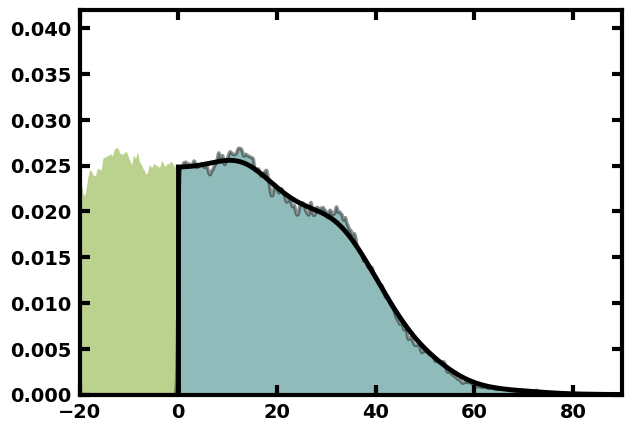

Area under KDE (Trapz):  0.9988 ,  Close enough to 1:  True


In [404]:
plot_mirror_test = True
if plot_mirror_test == True:

    plt.fill_between(all_posterior_i_values, density_estimation, alpha=0.44, zorder=0)
    plt.fill_between(all_posterior_i_values[::-1], density_estimation, alpha=0.44, zorder=0)
    plt.plot(all_posterior_i_values, density_estimation_total, color='#000000', lw=2.5, alpha=0.44, zorder=1)
    plt.plot(posterior_i_values, density_estimation_total_positive_x, color='#000000', lw=3.5, alpha=1, zorder=1)
    plt.plot([0, 0], [0, density_estimation_total_positive_x[0]], color='#000000', lw=3.5, alpha=1, zorder=1)
    # plt.xlim(min(all_posterior_i_values), max(all_posterior_i_values))
    # plt.xlim(-5, 5)
    plt.xlim(-20, max(all_posterior_i_values))
    plt.ylim(0, 0.042)
    plt.show()

    total_area_trapz = np.trapz(density_estimation_total_positive_x, posterior_i_values)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), ',  Close enough to 1: ', closeness_trapz)


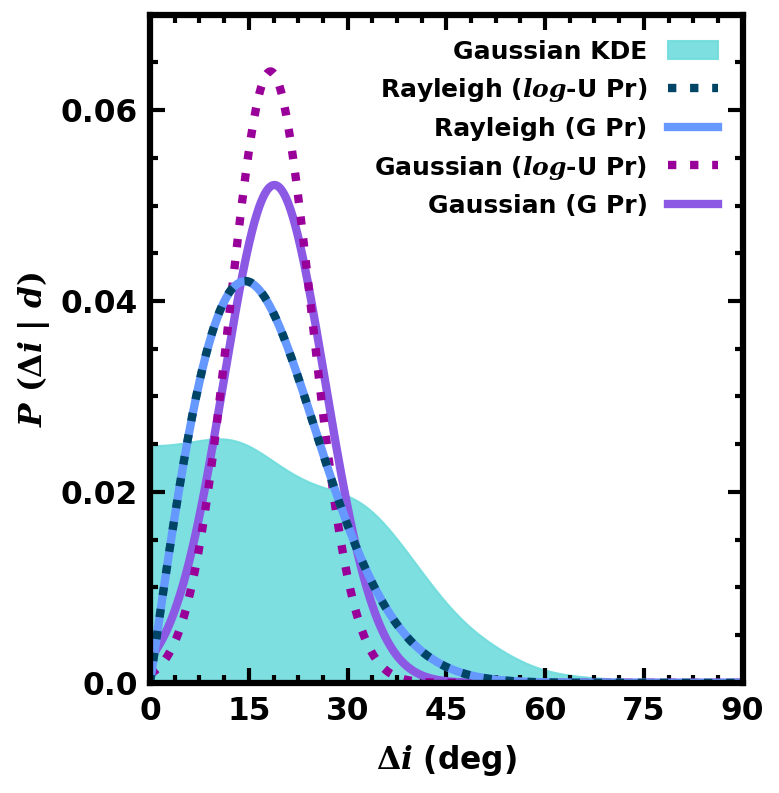

In [405]:

fig = plt.figure(figsize=(5, 5.5), dpi=150)
ax = fig.add_subplot(111)

ax.minorticks_on()

Delta_i_hist_fontsize = 15

ax.set_xlabel(r'$\Delta i$ (deg)', fontsize=Delta_i_hist_fontsize, labelpad=8)
ax.set_ylabel(r'$P$ $(\Delta i$ | $d)$', fontsize=Delta_i_hist_fontsize)


ax.fill_between(x_grid_plot, density_estimation_total_positive_x, color=kde_color, alpha=0.9, label='Gaussian KDE', zorder=1)

# ax.plot(x_grid_plot, i_diff_dist_from_kde,lw=4, linestyle='-', color='magenta', alpha=0.3, label=r'$\Delta i$ drawn from KDEs', zorder=model_zorder)


for HBM_key in list(Delta_i_HBM_files.keys()):
    model_profile = Delta_i_HBM_files[HBM_key]['Model Profile']
    if HBM_key == R_lU_label:
        model_linestyle = ':'
        model_color = '#004466'
        model_zorder = 6
    if HBM_key == R_G_label:
        model_linestyle = '-'
        model_color = '#6699ff'
        model_zorder = 5
    if HBM_key == G_lU_label:
        model_linestyle = ':'
        model_color = '#990099'
        model_zorder = 4
    if HBM_key == G_G_label:
        model_linestyle = '-'
        model_color = '#8c59e4'
        model_zorder = 3

    
    ax.plot(ivals, model_profile, lw=4, linestyle=model_linestyle, color=model_color, label=HBM_key, zorder=model_zorder)


xticks_hist = np.arange(0, 105, 15)
ax.set_xticks(xticks_hist)
ax.set_xticklabels(xticks_hist)
ax.set_xlim(0, 90)

yticks_hist = np.arange(0, 0.0925 + 0.02, 0.02)
ax.set_yticks(yticks_hist)
ax.set_yticklabels(yticks_hist)
ax.set_ylim(0, 0.07)

ax.legend(loc='upper right', prop={'size': 12}, ncol=1, markerfirst=False)  # , bbox_to_anchor=(0.24, 0.90, 0.5, 0.10))

for spine in ax.spines.values():
    spine.set_zorder(100)

ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)


if do_all_radii == False:
    save_hist_string = 'Delta_i_Histogram_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_'  + date_str + '.pdf'
else:
    save_hist_string = 'Delta_i_Histogram_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_all_'  + date_str + '.pdf'

if plot_transparent == True:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=True)
else:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=False)

plt.show()


In [406]:
condensed_df_stassun.columns

Index(['Target', 'Simbad Name', 'RA', 'DEC', 'SpType', 'SpType Unc',
       'i pp disk (deg)', 'i pp disk Unc', 'Rstar (Rsun)', 'Rstar Unc',
       'Mstar (Msun)', 'Mstar Unc', 'Prot (d)', 'Prot Unc', 'vsini (km/s)',
       'vsini Unc', 'Teff (K)', 'Teff Unc', 'Age (Myr)', 'Age Unc',
       'Lstar (Lsun)', 'Lstar Unc', 'i star (deg)', 'i star +Unc',
       'i star -Unc', 'disk diff', 'disk diff +Unc', 'disk diff -Unc', 'Veq',
       'Veq Unc'],
      dtype='object')

/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_4520/376591125.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(cbar_ticks, fontsize=veq_vsini_fontsize)


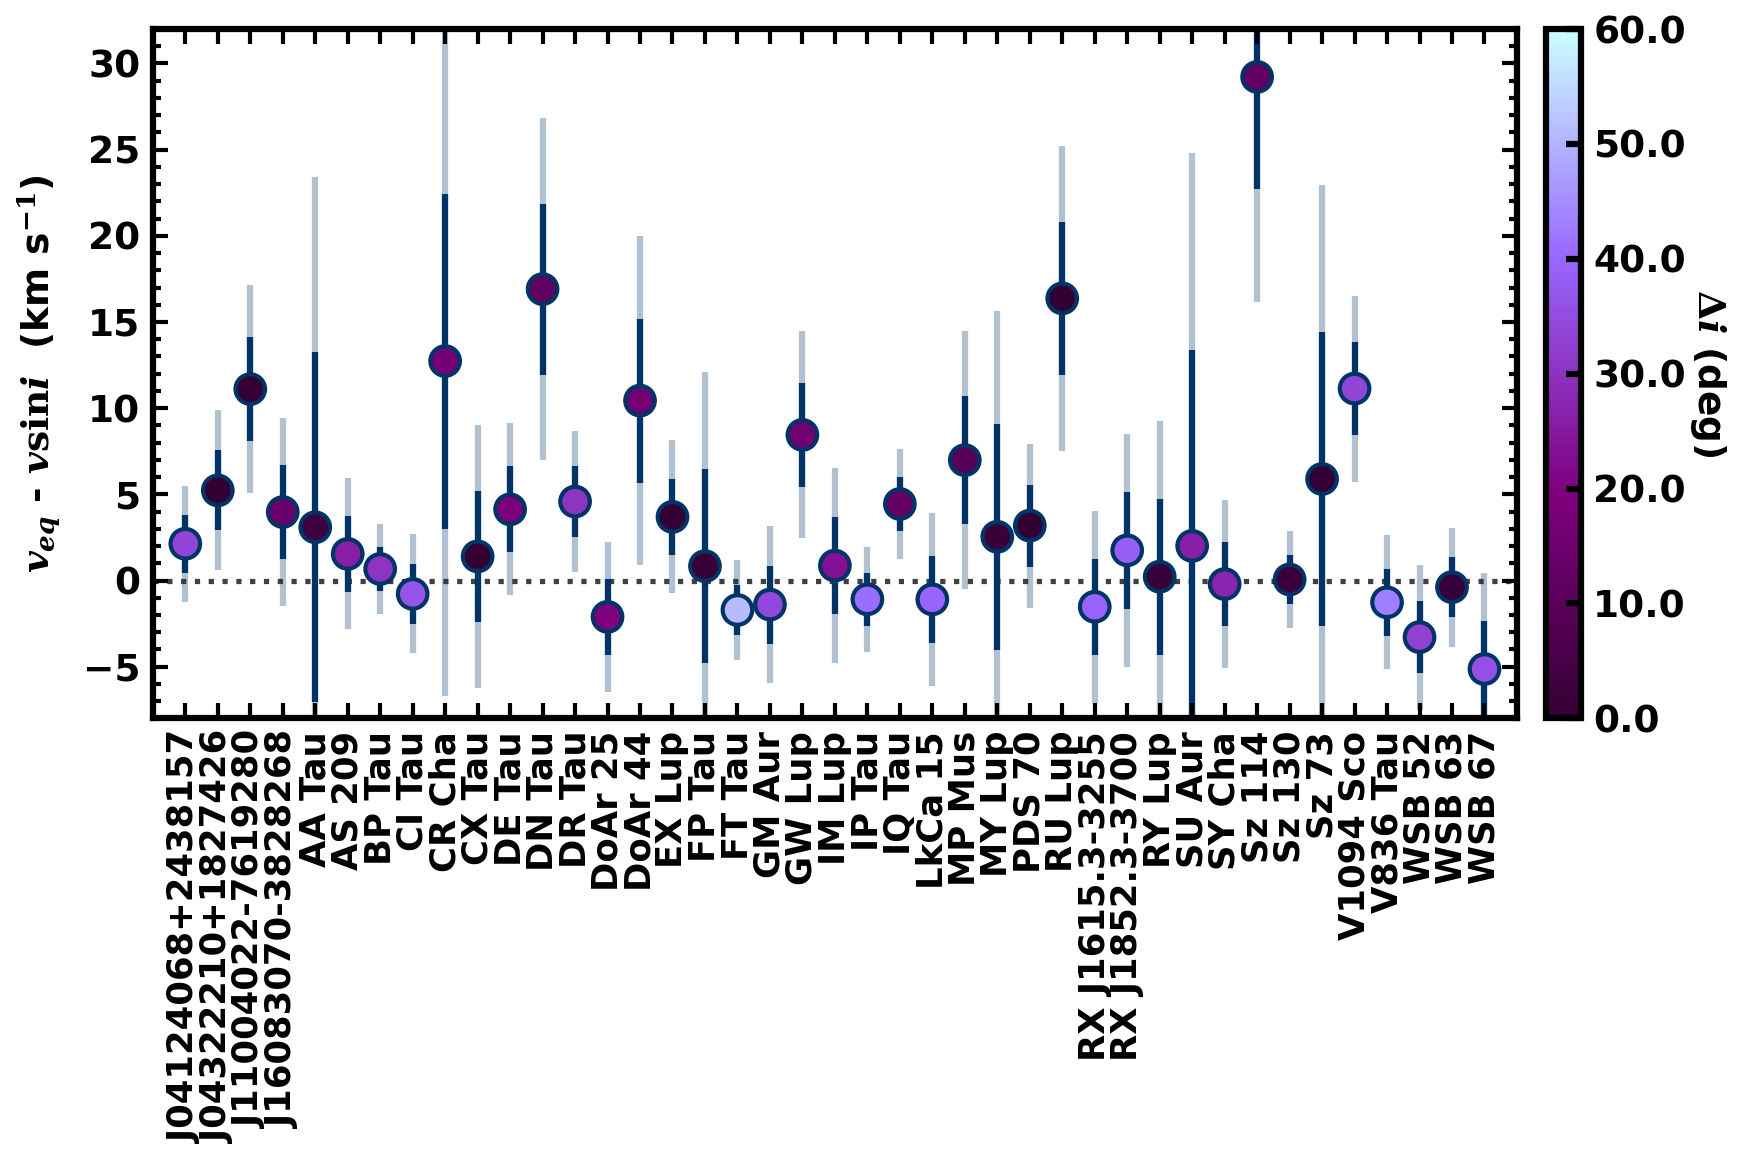

In [412]:
x_spacing = 0.75

point_size = 8
veq_vsini_fontsize = 18

ymin, ymax = -8, 32 
# ymin, ymax = -20, 32 
# ymin, ymax = -70, 70

Delta_i_min, Delta_i_max = 0, 60 
parameter_z_norm = plt.Normalize(0, Delta_i_max)

veq_vsini_figwidth, veq_vsini_figheight = 12, 8



# ------------------------- STASSUN RADII -------------------------- # 

vsinis_stassun = np.array(condensed_df_stassun['vsini (km/s)'].values)
vsini_errs_stassun = np.array(condensed_df_stassun['vsini Unc'].values)
veqs_stassun = np.array(condensed_df_stassun['Veq'].values)
veq_errs_stassun = np.array(condensed_df_stassun['Veq Unc'].values)
masses_stassun = np.array(condensed_df_stassun['Mstar (Msun)'].values)
masses_err_stassun = np.array(condensed_df_stassun['Mstar Unc'].values)
radii_stassun = np.array(condensed_df_stassun['Rstar (Rsun)'].values)
radii_err_stassun = np.array(condensed_df_stassun['Rstar Unc'].values)

vlimit_stassun = np.sqrt((6.674e-20 * masses_stassun * 1.989e30) / (radii_stassun * 6.96e5))

veqs_minus_vsinis_stassun = veqs_stassun - vsinis_stassun
veqs_minus_vsinis_err_stassun_1sig = []
veqs_minus_vsinis_err_stassun_2sig = []
for vsini_err_i in range(len(vsinis_stassun)):
    veqs_minus_vsinis_err_stassun_1sig.append(np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))
    veqs_minus_vsinis_err_stassun_2sig.append(2*np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))

# print(veqs_stassun)

x_array = np.arange(0, x_spacing*len(veqs_minus_vsinis_stassun), x_spacing)

if len(vsinis_stassun) > 1:

    colormap = choose_cmap('cyber grape', reverse_cmap=False)
    point_colors = [colormap(parameter_z_norm(bep)) for bep in condensed_df_stassun['disk diff'].values]


    fig4 = plt.figure(figsize=(veq_vsini_figwidth, veq_vsini_figheight), dpi=150)
    ax = fig4.add_subplot(111)
    ax.set_ylabel(r'$v_{eq}$ - $v\mathrm{sin}i$  (km s$^{-1}$)', fontsize=veq_vsini_fontsize, labelpad=10)

    where_ymin = np.where(veqs_minus_vsinis_stassun == min(veqs_minus_vsinis_stassun))[0]
    where_ymax = np.where(veqs_minus_vsinis_stassun == max(veqs_minus_vsinis_stassun))[0]

    xmin, xmax = min(x_array) - x_spacing, max(x_array) + x_spacing
    # ymin, ymax =  min(veqs_minus_vsinis_stassun) - 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun)), max(veqs_minus_vsinis_stassun) + 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun))
    
    ax.plot([xmin, xmax], [0, 0], linestyle=':', color=zeroline_color, lw=2.5, alpha=1., zorder=-3)
    ax.scatter(x_array, veqs_minus_vsinis_stassun, edgecolors=point_color, linewidth=2, s=np.pi*point_size**2, color=point_colors, linestyle='None')
    ax.errorbar(x_array, veqs_minus_vsinis_stassun, yerr=veqs_minus_vsinis_err_stassun_1sig, elinewidth=3, linewidth=0, capsize=0, ecolor=point_color, capthick=12, zorder=-1)
    ax.errorbar(x_array, veqs_minus_vsinis_stassun, yerr=veqs_minus_vsinis_err_stassun_2sig, elinewidth=3, linewidth=0, capsize=0, ecolor=point_color, capthick=12, alpha=0.3, zorder=-2)

    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), ax=ax, use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
    cbar.set_label(r'$\Delta i$ (deg)', labelpad=20, rotation=270, fontsize=veq_vsini_fontsize, weight='bold')
    cbar_ticks = cbar.get_ticks()  # np.arange(0, 105, 15)
    # cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticks, fontsize=veq_vsini_fontsize)

    ax.minorticks_on()
    ax.tick_params(axis='y', which='minor', length=4, width=2)
    ax.tick_params(axis='x', which='minor', length=0, width=0)
    ax.tick_params(which='major', length=7, width=2, labelsize=veq_vsini_fontsize)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)  # ymin,  ymax)

    # test_targs = condensed_df_stassun['Simbad Name'].values
    xlabels = [targ_label.replace('2MASS ', '') for targ_label in condensed_df_stassun['Simbad Name'].values]
    ax.set_xticks(x_array)
    xticklabels = ax.set_xticklabels(xlabels, fontsize=veq_vsini_fontsize - 1, rotation=90)

    fig4.tight_layout()

    ax.set_rasterized(True)


    save_veq_vsini_string = 'veq_vsini_' + resolution_text + '_' +  light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_'  + date_str + '.pdf'

    if plot_transparent == True:
        fig4.savefig(test_figures_directory + save_veq_vsini_string, dpi=300, transparent=True)
    else:
        fig4.savefig(test_figures_directory + save_veq_vsini_string, dpi=300, transparent=False)


    plt.show()



# # ------------------------- ALL RADII -------------------------- # 
# ymin, ymax = -8, 40  # 57.5

if do_all_radii == True:
    vsinis_all = np.array(condensed_df_all['vsini (km/s)'].values)
    vsini_errs_all = np.array(condensed_df_all['vsini Unc'].values)
    veqs_all = np.array(condensed_df_all['Veq'].values)
    veq_errs_all = np.array(condensed_df_all['Veq Unc'].values)
    masses_all = np.array(condensed_df_all['Mstar (Msun)'].values)
    masses_err_all = np.array(condensed_df_all['Mstar Unc'].values)
    radii_all = np.array(condensed_df_all['Rstar (Rsun)'].values)
    radii_err_all = np.array(condensed_df_all['Rstar Unc'].values)

    vlimit_all = np.sqrt((6.674e-20 * masses_all * 1.989e30) / (radii_all * 6.96e5))

    veqs_minus_vsinis_all = veqs_all - vsinis_all
    veqs_minus_vsinis_err_all_1sig = []
    veqs_minus_vsinis_err_all_2sig = []
    for vsini_err_i in range(len(vsinis_all)):
        veqs_minus_vsinis_err_all_1sig.append(np.sqrt(float(vsini_errs_all[vsini_err_i])**2 + veq_errs_all[vsini_err_i]**2))
        veqs_minus_vsinis_err_all_2sig.append(2*np.sqrt(float(vsini_errs_all[vsini_err_i])**2 + veq_errs_all[vsini_err_i]**2))

    # print(veqs_all)

    x_array = np.arange(0, x_spacing*len(veqs_minus_vsinis_all), x_spacing)

    if len(vsinis_all) > 1:

        colormap = choose_cmap('cyber grape', reverse_cmap=False)
        point_colors = [colormap(parameter_z_norm(bep)) for bep in condensed_df_all['disk diff'].values]


        fig4 = plt.figure(figsize=(veq_vsini_figwidth, veq_vsini_figheight), dpi=150)
        ax = fig4.add_subplot(111)
        ax.set_ylabel(r'$v_{eq}$ - $v\mathrm{sin}i$  (km s$^{-1}$)', fontsize=veq_vsini_fontsize, labelpad=10)

        where_ymin = np.where(veqs_minus_vsinis_all == min(veqs_minus_vsinis_all))[0]
        where_ymax = np.where(veqs_minus_vsinis_all == max(veqs_minus_vsinis_all))[0]

        xmin, xmax = min(x_array) - x_spacing, max(x_array) + x_spacing
        
        ax.plot([xmin, xmax], [0, 0], linestyle=':', color=zeroline_color, lw=2.5, alpha=1., zorder=-3)
        ax.scatter(x_array, veqs_minus_vsinis_all, edgecolors=point_color, linewidth=2, s=np.pi*point_size**2, color=point_colors, linestyle='None')
        ax.errorbar(x_array, veqs_minus_vsinis_all, yerr=veqs_minus_vsinis_err_all_1sig, elinewidth=3, linewidth=0, capsize=0, ecolor=point_color, capthick=12, zorder=-1)
        ax.errorbar(x_array, veqs_minus_vsinis_all, yerr=veqs_minus_vsinis_err_all_2sig, elinewidth=3, linewidth=0, capsize=0, ecolor=point_color, capthick=12, alpha=0.3, zorder=-2)

        cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), ax=ax, use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
        cbar.set_label(r'$\Delta i$ (deg)', labelpad=20, rotation=270, fontsize=veq_vsini_fontsize, weight='bold')
        cbar_ticks = cbar.get_ticks()  # np.arange(0, 105, 15)
        # cbar.set_ticks(cbar_ticks)
        cbar.set_ticklabels(cbar_ticks, fontsize=veq_vsini_fontsize)

        ax.minorticks_on()
        ax.tick_params(axis='y', which='minor', length=4, width=2)
        ax.tick_params(axis='x', which='minor', length=0, width=0)
        ax.tick_params(which='major', length=7, width=2, labelsize=16)

        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)  # ymin,  ymax)

        xlabels = [targ_label.replace('2MASS ', '') for targ_label in condensed_df_all['Simbad Name'].values]
        ax.set_xticks(x_array)
        xticklabels = ax.set_xticklabels(xlabels, fontsize=veq_vsini_fontsize - 1, rotation=90)

        fig4.tight_layout()

        ax.set_rasterized(True)


        save_veq_vsini_string_all = 'veq_vsini_' + resolution_text + '_' +  light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text + '_all_'  + date_str + '.pdf'

        # if plot_transparent == True:
        #     fig4.savefig(test_figures_directory + save_veq_vsini_string_all, dpi=300, transparent=True)
        # else:
        #     fig4.savefig(test_figures_directory + save_veq_vsini_string_all, dpi=300, transparent=False)


        plt.show()


SpType : 41
Mstar (Msun) : 41
Teff (K) : 41
Rstar (Rsun) : 41
Prot (d) : 41
vsini (km/s) : 41
i pp disk (deg) : 41
i star (deg) : 41


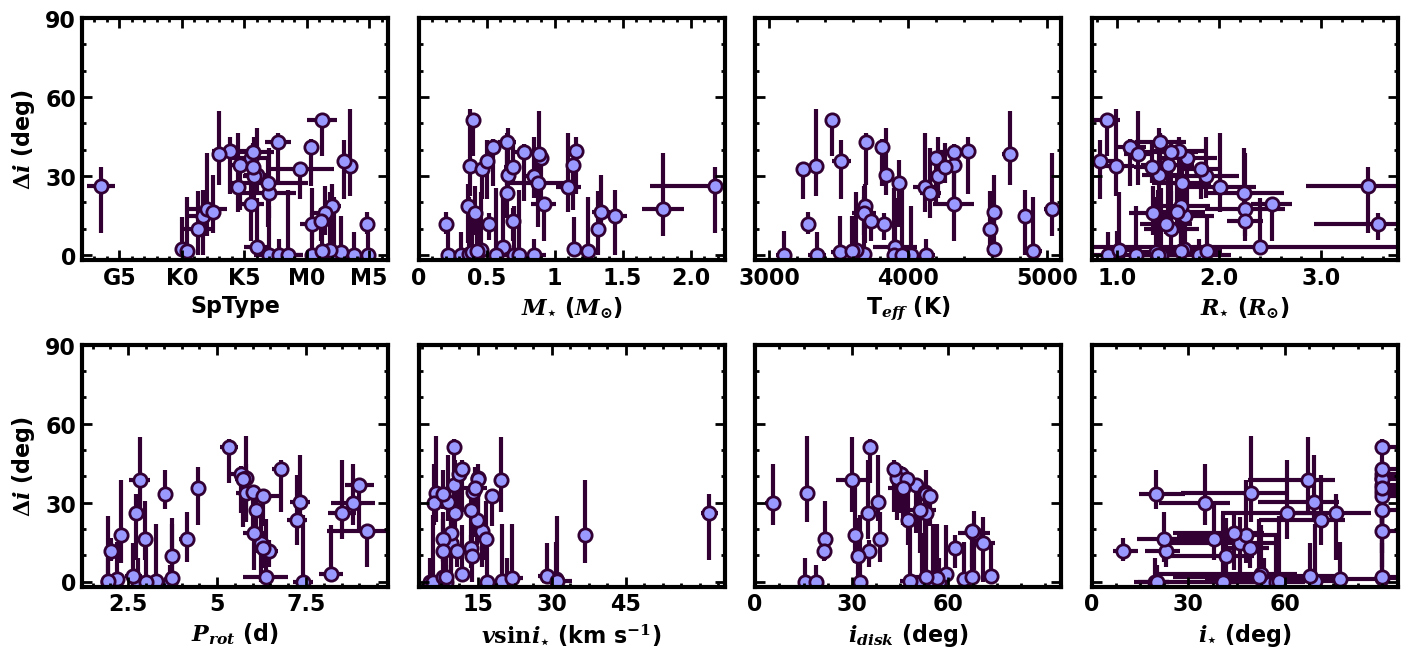

In [413]:
parplot_fontsize = 16
parplot_title_fontsize = 16

target_labels_on = False

save_figs = True


# if z_colors_on == False:
#     fig_width = 6
# else:
#     fig_width = 7
# fig_height = 6



colormap = choose_cmap('cyber grape', reverse_cmap=False)



x_variations = ['SpT', 'mass','Teff', 'radius', 'Prot', 'vsini', 'disk inclination', 'star inclination']
y_variable = 'disk diff'
z_variable = 'star inclination'
z_variable = 'Age'



grid_width = 4
grid_width_cbar = grid_width + 1
grid_height = 2

do_cbar = False
if do_cbar == True:
    cell_width_ratios = [1, 1, 1, 1, 0.10]
    gs = gridspec.GridSpec(grid_height, grid_width_cbar, width_ratios=cell_width_ratios)
    fig_width = 12
    fig_height = 6.5
else:
    cell_width_ratios = [1, 1, 1, 1]
    gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=cell_width_ratios)
    fig_width = 14
    fig_height = 6.5



fig = plt.figure(figsize=(fig_width, fig_height))
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width_cbar - 1)]
ax_keys = list(hists_to_create.keys())

for ax_i, ax in enumerate(axes):

    ax.minorticks_on()

    x_variable = x_variations[ax_i]

    plot_variables = [x_variable, y_variable, z_variable]

    if 'star inclination' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'star inclination' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'i star (deg)'
            x_column_err_p = 'i star -Unc'
            x_column_err_m = 'i star +Unc'
            x_label = r'$i_{\mathdefault{\star}}$ (deg)'
            x_text = 'i_Star'
            xlims = [0, 95]
        if axis_bool == 1:
            y_column = 'i star (deg)'
            y_column_err_p = 'i star -Unc'
            y_column_err_m = 'i star +Unc'
            y_label = r'$i_{\mathdefault{\star}}$ (deg)'
            ylims = [0, 95]
            y_text = 'i_Star'
        if axis_bool == 2:
            z_column = 'i star (deg)'
            z_column_err_p = 'i star -Unc'
            z_column_err_m = 'i star +Unc'
            z_label = r'$i_{\mathdefault{\star}}$ (deg)'
            zlims = [0, 90]
            z_text = 'i_Star'
    if 'disk inclination' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'disk inclination' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'i pp disk (deg)'
            x_column_err_p = 'i pp disk Unc'
            x_column_err_m = 'i pp disk Unc'
            x_label = r'$i_{disk}$ (deg)'
            xlims = [0, 95]
            x_text = 'i_Disk'
        if axis_bool == 1:
            y_column = 'i pp disk (deg)'
            y_column_err_p = 'i pp disk Unc'
            y_column_err_m = 'i pp disk Unc'
            y_label = r'$i_{disk}$ (deg)'
            ylims = [0, 95]
            y_text = 'i_Disk'
        if axis_bool == 2:
            z_column = 'i pp disk (deg)'
            z_column_err_p = 'i pp disk Unc'
            z_column_err_m = 'i pp disk Unc'
            z_label = r'$i_{disk}$ (deg)'
            zlims = [0, 90]
            z_text = 'i_Disk'
    if 'mass' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'mass' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Mstar (Msun)'
            x_column_err_p = 'Mstar Unc'
            x_column_err_m = 'Mstar Unc'
            x_label = r'$M_{\mathdefault{\star}}$ ($M_{\odot}$)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Mstar'
        if axis_bool == 1:
            y_column = 'Mstar (Msun)'
            y_column_err_p = 'Mstar Unc'
            y_column_err_m = 'Mstar Unc'
            y_label = r'$M_{\mathdefault{\star}}$ ($M_{\odot}$)'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'Mstar'
        if axis_bool == 2:
            z_column = 'Mstar (Msun)'
            z_column_err_p = 'Mstar Unc'
            z_column_err_m = 'Mstar Unc'
            z_label = r'$M_{\mathdefault{\star}}$ ($M_{\odot}$)'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'Mstar'
    if 'radius' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'radius' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Rstar (Rsun)'
            x_column_err_p = 'Rstar Unc'
            x_column_err_m = 'Rstar Unc'
            x_label = r'$R_{\mathdefault{\star}}$ ($R_{\odot}$)'
            xlims = [0.75, 3.75]
            x_text = 'Rstar'
        if axis_bool == 1:
            y_column = 'Rstar (Rsun)'
            y_column_err_p = 'Rstar Unc'
            y_column_err_m = 'Rstar Unc'
            y_label = r'$R_{\mathdefault{\star}}$ ($R_{\odot}$)'
            ylims = [0.75, 3.75]
            y_text = 'Rstar'
        if axis_bool == 2:
            z_column = 'Rstar (Rsun)'
            z_column_err_p = 'Rstar Unc'
            z_column_err_m = 'Rstar Unc'
            z_label = r'$R_{\mathdefault{\star}}$ ($R_{\odot}$)'
            zlims = [0.75, 3.75]
            z_text = 'Rstar'
    if 'vsini' in plot_variables:
        vsinis = np.array(condensed_df_stassun['vsini (km/s)'].values)
        vsini_errs = np.array(condensed_df_stassun['vsini Unc'].values)
        veqs = np.array(condensed_df_stassun['Veq'].values)
        veq_errs = np.array(condensed_df_stassun['Veq Unc'].values)

        test_targs = condensed_df_stassun['Target'].values
        
        axis_bool = [index for index in range(len(plot_variables)) if 'vsini' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'vsini (km/s)'
            x_column_err_p = 'vsini Unc'
            x_column_err_m = 'vsini Unc'
            x_label = r'$v\mathrm{sin}i_{\mathdefault{\star}}$ (km s$^{-1}$)'
            xlims = [3, 65]
            x_text = 'vsini'
        if axis_bool == 1:
            y_column = 'vsini (km/s)'
            y_column_err_p = 'vsini Unc'
            y_column_err_m = 'vsini Unc'
            y_label = r'$v\mathrm{sin}i_{\mathdefault{\star}}$ (km s$^{-1}$)'
            xlims = [3, 65]
            y_text = 'vsini'
        if axis_bool == 2:
            z_column = 'vsini (km/s)'
            z_column_err_p = 'vsini Unc'
            z_column_err_m = 'vsini Unc'
            z_label = r'$v\mathrm{sin}i_{\mathdefault{\star}}$ (km s$^{-1}$)'
            xlims = [3, 65]
            z_text = 'vsini'
    if 'Prot' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Prot' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Prot (d)'
            x_column_err_p = 'Prot Unc'
            x_column_err_m = 'Prot Unc'
            x_label = r'$P_{rot}$ (d)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Prot'
        if axis_bool == 1:
            y_column = 'Prot (d)'
            y_column_err_p = 'Prot Unc'
            y_column_err_m = 'Prot Unc'
            y_label = r'$P_{rot}$ (d)'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'Prot'
        if axis_bool == 2:
            z_column = 'Prot (d)'
            z_column_err_p = 'Prot Unc'
            z_column_err_m = 'Prot Unc'
            z_label = r'$P_{rot}$ (d)'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'Prot'
    if 'Teff' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Teff' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Teff (K)'
            x_column_err_p = 'Teff Unc'
            x_column_err_m = 'Teff Unc'
            x_label = r'T$_{eff}$ (K)'
            xlims = [2900, 5100]
            x_text = 'Teff'
        if axis_bool == 1:
            y_column = 'Teff (K)'
            y_column_err_p = 'Teff Unc'
            y_column_err_m = 'Teff Unc'
            y_label = r'T$_{eff}$ (K)'
            ylims = [2900, 5100]
            y_text = 'Teff'
        if axis_bool == 2:
            z_column = 'Teff (K)'
            z_column_err_p = 'Teff Unc'
            z_column_err_m = 'Teff Unc'
            z_label = r'T$_{eff}$ (K)'
            zlims = [2900, 5100]
            z_text = 'Teff'

    if 'SpT' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'SpT' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'SpType'
            x_column_err_p = 'SpType Unc'
            x_column_err_m = 'SpType Unc'
            x_label = 'SpType'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'SpT'
        if axis_bool == 1:
            y_column = 'SpType'
            y_column_err_p = 'SpType Unc'
            y_column_err_m = 'SpType Unc'
            y_label = 'SpType'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'SpT'
        if axis_bool == 2:
            z_column = 'SpType'
            z_column_err_p = 'SpType Unc'
            z_column_err_m = 'SpType Unc'
            z_label = 'SpType'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'SpT'
    if 'disk diff' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'disk diff' in plot_variables[index]]
        for axis_num in axis_bool:
            if axis_num == 0:
                x_column = 'disk diff'
                x_column_err_p = 'disk diff +Unc'
                x_column_err_m = 'disk diff -Unc'
                x_label = r'$\Delta i$ (deg)'
                xlims = [-2, 90]
                x_text = 'Delta_i'
            if axis_num == 1:
                y_column = 'disk diff'
                y_column_err_p = 'disk diff +Unc'
                y_column_err_m = 'disk diff -Unc'
                y_label = r'$\Delta i$ (deg)'
                ylims = [-2, 90]
                y_text = 'Delta_i'
            if axis_num == 2:
                z_column = 'disk diff'
                z_column_err_p = 'disk diff +Unc'
                z_column_err_m = 'disk diff -Unc'
                z_label = r'$\Delta i$ (deg)'
                zlims = [0, 90]
                z_text = 'Delta_i'
    if 'Age' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Age' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Age (Myr)'
            x_column_err_p = 'Age Unc'
            x_column_err_m = 'Age Unc'
            x_label = 'Age (Myr)'
            xlims = [0, 6]
            x_text = 'Age'
        if axis_bool == 1:
            y_column = 'Age (Myr)'
            y_column_err_p = 'Age Unc'
            y_column_err_m = 'Age Unc'
            y_label = 'Age (Myr)'
            ylims = [0, 16]
            y_text = 'Age'
        if axis_bool == 2:
            z_column = 'Age (Myr)'
            z_column_err_p = 'Age Unc'
            z_column_err_m = 'Age Unc'
            z_label = 'Age (Myr)'
            zlims = [0, 6]   # [0, 10]  # np.ceil(np.nanmax(condensed_df_stassun[z_column].values))]
            z_text = 'Age'

    map_min = zlims[0]
    map_max = zlims[1]
    parameter_z_norm = plt.Normalize(map_min, map_max)

    # -------------------------- STASSUN RADII PARAMETERS -------------------------- #

    parameter_x_stassun = np.array(condensed_df_stassun[x_column].values)
    parameter_x_err_p_stassun = np.array(condensed_df_stassun[x_column_err_p].values)
    parameter_x_err_m_stassun = np.array(condensed_df_stassun[x_column_err_m].values)
    parameter_y_stassun = np.array(condensed_df_stassun[y_column].values)
    parameter_y_err_p_stassun = np.array(condensed_df_stassun[y_column_err_p].values)
    parameter_y_err_m_stassun = np.array(condensed_df_stassun[y_column_err_m].values)
    parameter_z_stassun = np.array(condensed_df_stassun[z_column].values)
    parameter_z_err_p_stassun = np.array(condensed_df_stassun[z_column_err_p].values)
    parameter_z_err_m_stassun = np.array(condensed_df_stassun[z_column_err_m].values)
    targets_list_stassun = np.array(condensed_df_stassun['Simbad Name'].values)

    parameter_x_err_stassun = [parameter_x_err_m_stassun, parameter_x_err_p_stassun]
    parameter_y_err_stassun = [parameter_y_err_m_stassun, parameter_y_err_p_stassun]
    parameter_z_err_stassun = [parameter_z_err_m_stassun, parameter_z_err_p_stassun]


    # -------------------------- ALL RADII PARAMETERS -------------------------- #
    if do_all_radii == True:
        
        parameter_x_all = np.array(condensed_df_all[x_column].values)
        parameter_x_err_p_all = np.array(condensed_df_all[x_column_err_p].values)
        parameter_x_err_m_all = np.array(condensed_df_all[x_column_err_m].values)
        parameter_y_all = np.array(condensed_df_all[y_column].values)
        parameter_y_err_p_all = np.array(condensed_df_all[y_column_err_p].values)
        parameter_y_err_m_all = np.array(condensed_df_all[y_column_err_m].values)
        parameter_z_all = np.array(condensed_df_all[z_column].values)
        parameter_z_err_p_all = np.array(condensed_df_all[z_column_err_p].values)
        parameter_z_err_m_all = np.array(condensed_df_all[z_column_err_m].values)
        targets_list_all = np.array(condensed_df_all['Simbad Name'].values)

        parameter_x_err_all = [parameter_x_err_m_all, parameter_x_err_p_all]
        parameter_y_err_all = [parameter_y_err_m_all, parameter_y_err_p_all]
        parameter_z_err_all = [parameter_z_err_m_all, parameter_z_err_p_all]


    if do_cbar == True:
        point_size = 5.4
        point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z_stassun]
        point_edgecolors = [edge_color]*len(point_colors)
        edge_width = 2
    else:
        point_size = 5.4
        # point_colors = ['#781a88']*len(point_colors)
        point_colors = ['#9999ff']*len(point_colors)
        point_edgecolors = ['#330033']*len(point_colors)
        edge_width = 2

    print(x_column, ':', len(parameter_x_stassun))


    for par_i in range(len(parameter_y_stassun)):
        ax.scatter([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], color=point_colors[par_i], edgecolors=point_edgecolors[par_i], s=np.pi*point_size**2, linewidth=edge_width, linestyle='None')
        ax.errorbar([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], xerr=[[parameter_x_err_stassun[0][par_i]],[parameter_x_err_stassun[1][par_i]]], yerr=[[parameter_y_err_stassun[0][par_i]], [parameter_y_err_stassun[1][par_i]]],
                    elinewidth=3, linewidth=0, capsize=0, ecolor=point_edgecolors[par_i], capthick=2, zorder=-1)

    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

    ax.tick_params(which='minor', length=3, width=2, labelsize=parplot_fontsize)
    ax.tick_params(which='major', length=7, width=2, labelsize=parplot_fontsize, pad=4)


    if x_column == 'SpType':
        sptype_designations = {'3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,0.5) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=parplot_fontsize)

    if (y_column == 'disk diff') or (y_column == 'i star (deg)') or (y_column == 'i pp disk (deg)'):
        # ytickvals = np.arange(0, 105, 15)
        ytickvals = np.arange(0, 90 + 30, 30)
        yticks = [int(ytick) for ytick in ytickvals]
        ax.set_yticks(yticks)
        yticklabels = ax.set_yticklabels(yticks, fontsize=parplot_fontsize)
        Number_of_minor_ticks_between_major_ticks = 3
        yticks_minor = AutoMinorLocator(Number_of_minor_ticks_between_major_ticks) 
        ax.yaxis.set_minor_locator(yticks_minor)


    if x_column == 'Mstar (Msun)':
        xtickvals = [0, 0.5, 1, 1.5, 2.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=parplot_fontsize)

    if x_column == 'Rstar (Rsun)':
        xtickvals = [1.0, 2.0, 3.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=parplot_fontsize)

    if x_column == 'Prot (d)':
        xtickvals = [2.5, 5, 7.5]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=parplot_fontsize)

    if (x_column == 'i pp disk (deg)') or (x_column == 'i star (deg)'):
        xtickvals = [0, 30, 60]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=parplot_fontsize)

    if x_column == 'vsini (km/s)':
        xtickvals = [15, 30, 45]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=parplot_fontsize)

    if x_column == 'Teff (K)':
        xtickvals = [3000, 4000, 5000]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=parplot_fontsize)


    ax.set_xlabel(x_label, fontsize=parplot_fontsize, labelpad=4)
    if np.mod(ax_i, grid_width_cbar-1) == 0:
        ax.set_ylabel(y_label, fontsize=parplot_fontsize, labelpad=6)
    else:
        ax.set_ylabel(' ')
        ax.set_yticklabels([])


if do_cbar == True:
    # Add a single colorbar
    cbar_ax = fig.add_subplot(gs[:, -1])
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), cax=cbar_ax) # , use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
    cbar.set_label(z_label, labelpad=30, rotation=270, fontsize=parplot_fontsize, weight='bold')
    cbar_ticks_floats = cbar.get_ticks()
    cbar_ticks = [int(cbar_tick) for cbar_tick in cbar_ticks_floats]
    cbar.set_ticklabels(cbar_ticks, fontsize=parplot_fontsize)



if target_labels_on == True:
    labels_text = 'labeled'
else:
    labels_text = 'unlabeled'

if do_cbar == True:
    fig.subplots_adjust(left=0.07, bottom=0.10, right=0.93, top=0.975, wspace=0.10, hspace=0.35)
else:
    fig.subplots_adjust(left=0.05, bottom=0.10, right=0.99, top=0.975, wspace=0.10, hspace=0.35)

# SAVE THE FIGURE
if save_figs == True:
    if len(parameter_x_stassun) == 1:
        save_par_vs_Delta_i_string = resolution_text + '_' + targets_list_stassun[0] + '_ParGrid_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text  + '_' + date_str + '.pdf'
    if len(parameter_x_stassun) > 1:
        save_par_vs_Delta_i_string = resolution_text + '_ParGrid_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text  + '_' + labels_text + '_' + date_str + '.pdf'

    if plot_transparent == True:
        fig.savefig(test_figures_directory + save_par_vs_Delta_i_string, dpi=300, transparent=True)
    else:
        fig.savefig(test_figures_directory + save_par_vs_Delta_i_string, dpi=300, transparent=False)

    plt.show()





41


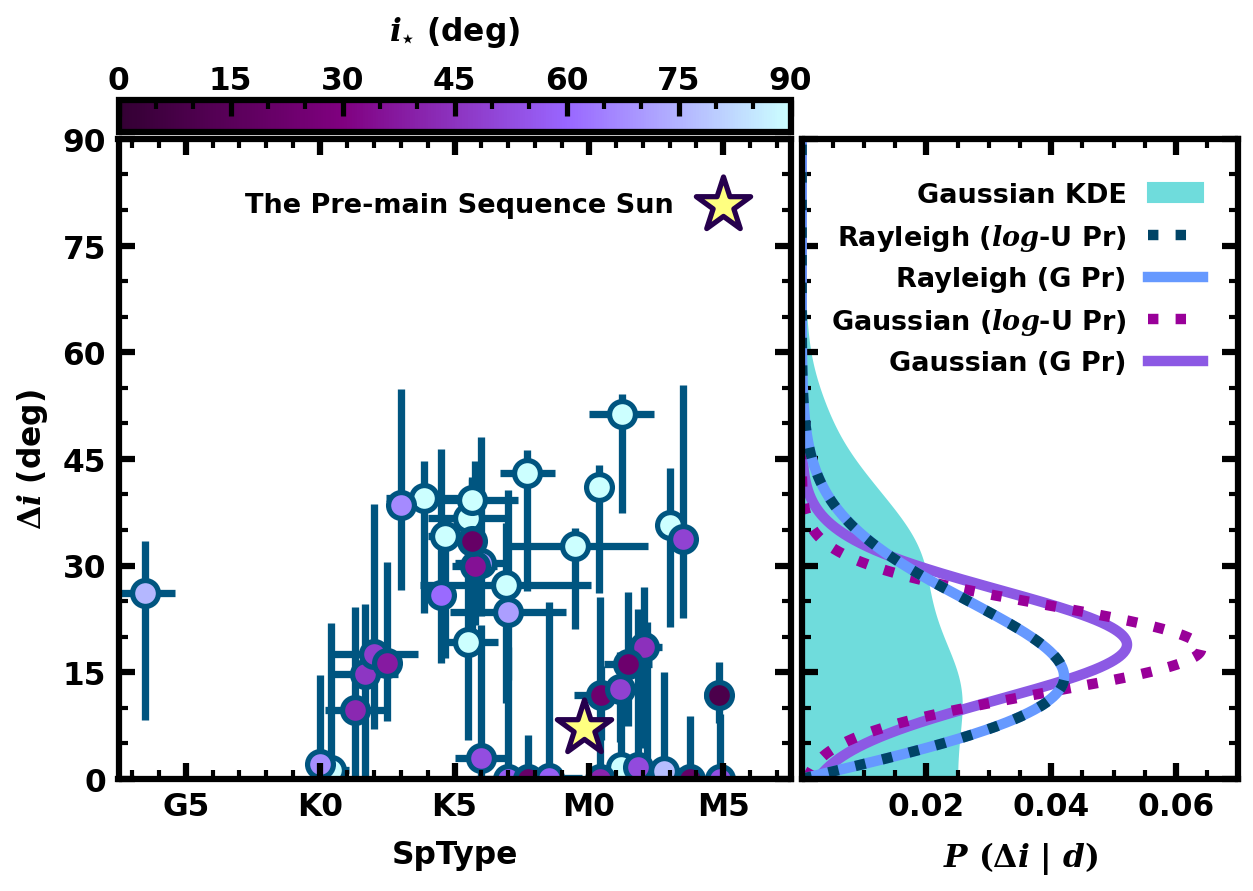

In [465]:

x_column = 'SpType'
x_column_err_p = 'SpType Unc'
x_column_err_m = 'SpType Unc'
x_label = 'SpType'
xlims = [3.25, 5.75]
x_text = 'SpT'

y_column = 'disk diff'
y_column_err_p = 'disk diff +Unc'
y_column_err_m = 'disk diff -Unc'
y_label = r'$\Delta i$ (deg)'
ylims = [-2, 90]
y_text = 'Delta_i'

z_column = 'i star (deg)'
z_column_err_p = 'i star -Unc'
z_column_err_m = 'i star +Unc'
z_label = r'$i_{\mathdefault{\star}}$ (deg)'
zlims = [0, 90]
z_text = 'i_Star'

parameter_z_norm = plt.Normalize(zlims[0], zlims[1])

parameter_x_stassun = np.array(condensed_df_stassun[x_column].values)
parameter_x_err_p_stassun = np.array(condensed_df_stassun[x_column_err_p].values)
parameter_x_err_m_stassun = np.array(condensed_df_stassun[x_column_err_m].values)
parameter_y_stassun = np.array(condensed_df_stassun[y_column].values)
parameter_y_err_p_stassun = np.array(condensed_df_stassun[y_column_err_p].values)
parameter_y_err_m_stassun = np.array(condensed_df_stassun[y_column_err_m].values)
parameter_z_stassun = np.array(condensed_df_stassun[z_column].values)
parameter_z_err_p_stassun = np.array(condensed_df_stassun[z_column_err_p].values)
parameter_z_err_m_stassun = np.array(condensed_df_stassun[z_column_err_m].values)
targets_list_stassun = np.array(condensed_df_stassun['Simbad Name'].values)

parameter_x_err_stassun = [parameter_x_err_m_stassun, parameter_x_err_p_stassun]
parameter_y_err_stassun = [parameter_y_err_m_stassun, parameter_y_err_p_stassun]
parameter_z_err_stassun = [parameter_z_err_m_stassun, parameter_z_err_p_stassun]




grid_height = 2
grid_width = 2

original_fig_width = 8
original_fig_height = 6.5

original_width_ratios = [1, 0.40]
original_height_ratios = [0.05, 1]


fig_width = 8.25
fig_height = 5.80

try_width_ratios = [1, 0.65]
try_height_ratios = [0.05, 1]


single_parplot_fontsize = 15

target_labels_on = False

point_size = 7

z_colors_on = True


fig = plt.figure(figsize=(fig_width, fig_height), dpi=150)
gs = gridspec.GridSpec(grid_height , grid_width , width_ratios=try_width_ratios, height_ratios=try_height_ratios)
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width)]
cbar_ax = axes[0]
blank_ax = axes[1]
ax1 = axes[2]
ax2 = axes[3]


# MAKE INVISIBLE AXES SPINES INVISIBRU
for spine in blank_ax.spines.values():
    spine.set_edgecolor('#ffffff')
blank_ax.set_xticklabels([])
blank_ax.set_yticklabels([])
blank_ax.tick_params(axis='both', which='both', color='#ffffff')



ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_xlabel('SpType', fontsize=single_parplot_fontsize, labelpad=8)
ax1.set_ylabel(r'$\Delta i$ (deg)', fontsize=single_parplot_fontsize, labelpad=6)
ax2.set_xlabel(r'$P$ $(\Delta i$ | $d)$', fontsize=single_parplot_fontsize, labelpad=8)

point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z_stassun]
point_edgecolors = [edge_color]*len(point_colors)
if z_colors_on == True:
    point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z_stassun]
else:
    point_colors = [point_color_no_z]*len(point_colors)

print(len(parameter_y_stassun))

# -------------------------------------- THE SAMPLE ---------------------------------------  #
for par_i in range(len(parameter_y_stassun)):
    if parameter_z_stassun[par_i] == 90.0:
        zord = -2
    if parameter_z_stassun[par_i] < 90:
        zord = -1
    ax1.scatter([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], color=point_colors[par_i], edgecolors=point_edgecolors[par_i], linewidth=2.5, s=np.pi*point_size**2, linestyle='None', zorder=zord)
    ax1.errorbar([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], xerr=[[parameter_x_err_stassun[0][par_i]],[parameter_x_err_stassun[1][par_i]]], yerr=[[parameter_y_err_stassun[0][par_i]], [parameter_y_err_stassun[1][par_i]]],
                elinewidth=3.5, linewidth=0, capsize=0, ecolor=point_edgecolors[par_i], capthick=0, zorder=-3)
# ---------------------------------------------------------------------------------------- #

# --------------------------------------- COLORBAR --------------------------------------- #
if z_colors_on == True:
    # Add a single colorbar
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), cax=cbar_ax, orientation='horizontal') # , use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
    cbar.set_label(z_label, labelpad=12, fontsize=single_parplot_fontsize, weight='bold')  # rotation=270
    cbar_ticks = np.arange(0, 105, 15)
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticks, fontsize=single_parplot_fontsize)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    Number_of_minor_ticks_between_major_ticks_cbar = 3
    yticks_minor_cbar = AutoMinorLocator(Number_of_minor_ticks_between_major_ticks_cbar)
    cbar.minorticks_on()
    cbar.ax.xaxis.set_minor_locator(yticks_minor_cbar)
    cbar.ax.tick_params(which='minor', length=4.5, width=2)
    cbar.ax.tick_params(which='major', length=7.5, width=2.5, pad=2)
# ---------------------------------------------------------------------------------------- #






# ------------------------------ KERNEL DENSITY ESTIMATION ------------------------------- #
# ax1.fill_between([], [], color=kde_color, alpha=1, label='Gaussian KDE', zorder=1)
ax2.fill_between(density_estimation_total_positive_x, x_grid_plot, color=kde_color, alpha=1, label='Gaussian KDE', zorder=1)
# ---------------------------------------------------------------------------------------- #

# -------------------------------------- HBM MODELS -------------------------------------- #
for HBM_key in list(Delta_i_HBM_files.keys()):
    model_profile = Delta_i_HBM_files[HBM_key]['Model Profile']
    if HBM_key == R_lU_label:
        model_linestyle = ':'
        model_color = '#004466'  # '#002b80'
        model_zorder = 6
    if HBM_key == R_G_label:
        model_linestyle = '-'
        model_color = '#6699ff'  # '#33cccc'  # '#0099cc'
        model_zorder = 5
    if HBM_key == G_lU_label:
        model_linestyle = ':'
        model_color = '#990099'  # '#621068'  # '#4d004d'
        model_zorder = 4
    if HBM_key == G_G_label:
        model_linestyle = '-'
        model_color = '#8c59e4'  # '#bf00ff'
        model_zorder = 3
    # ax1.plot([], [], lw=4, linestyle=model_linestyle, color=model_color, label=HBM_key, zorder=model_zorder)
    ax2.plot(model_profile, ivals, lw=5, linestyle=model_linestyle, color=model_color, label=HBM_key, zorder=model_zorder)
# ---------------------------------------------------------------------------------------- #

# ---------------------------------------- THE SUN ---------------------------------------  #
Solar_SpType = 4.98  # 4.6
Solar_SpType_err = 0.1
Solar_obliquity = 7.155
Solar_obliquity_err = 0.002
Solar_point_size = 750

sun_color = '#ffff80'  # '#ace600'
sun_edgecolor = '#26004d'  # '#001a33'
ax1.scatter([Solar_SpType], [Solar_obliquity], marker='*', color=sun_color, edgecolors=sun_edgecolor, linewidth=2.5, s=Solar_point_size, linestyle='None', label='The Pre-main Sequence Sun')
# ax1.errorbar([Solar_SpType], [Solar_obliquity], xerr=[Solar_SpType_err], yerr=[Solar_obliquity_err], elinewidth=3, linewidth=0, capsize=0, ecolor='#001a33', capthick=0, zorder=-1)   
# ---------------------------------------------------------------------------------------- #

for spine in ax2.spines.values():
    spine.set_zorder(100)


sptype_designations = {'0': 'B',
                    '0.5': 'B5',
                    '1': 'A0',
                    '1.5': 'A5',
                    '2': 'F0',
                    '2.5': 'F5',
                    '3': 'G0',
                    '3.5': 'G5',
                    '4': 'K0',
                    '4.5': 'K5',
                    '5': 'M0',
                    '5.5': 'M5',
                    }

xtickvals = [3.5, 4, 4.5, 5, 5.5]  # np.arange(xlims[0], xlims[1]+0.25, 0.25)
xticklabs = []
xticks = []
for xtick in xtickvals:
    if xtick < xlims[1]:
        if (np.mod(xtick,1) == 0) and (xtick >= xlims[0]):
            xticks.append(xtick)
            xticklabs.append(sptype_designations[str(int(xtick))])
        elif (np.mod(xtick,0.5) == 0) and (xtick >= xlims[0]):
            xticks.append(xtick)
            xticklabs.append(sptype_designations['{:.1f}'.format(xtick)])
ax1.set_xticks(xticks)
xticklabels = ax1.set_xticklabels(xticklabs, fontsize=single_parplot_fontsize)

dx2 = 0.02
ax2_xtickvals = np.arange(dx2, 0.07 + dx2, dx2)
ax2.set_xticks(ax2_xtickvals)
ax2.set_xticklabels(ax2_xtickvals, fontsize=single_parplot_fontsize)




ytickvals_major = np.arange(0, 105, 15)
yticks_major = [int(ytick) for ytick in ytickvals_major]
ax1.set_yticks(yticks_major, which='major')
ax2.set_yticks(yticks_major, which='major')
yticklabels = ax1.set_yticklabels(yticks_major, fontsize=single_parplot_fontsize)
ax2.set_yticklabels([])

Number_of_minor_ticks_between_major_ticks = 3
yticks_minor = AutoMinorLocator(Number_of_minor_ticks_between_major_ticks) 
ax1.yaxis.set_minor_locator(yticks_minor)
ax2.yaxis.set_minor_locator(yticks_minor)


ax1.set_xlim(xlims)
ax1.set_ylim(0, 90)
ax2.set_ylim(0, 90)
ax2.set_xlim(0, 0.07)

ax1.set_rasterized(True)

ax1.tick_params(which='minor', length=4.5, width=2)
ax1.tick_params(which='major', length=7.5, width=3, pad=6)

ax2.tick_params(labelsize=single_parplot_fontsize)

ax2.tick_params(which='minor', length=4.5, width=2)
ax2.tick_params(which='major', length=7.5, width=3, pad=6)

# leg2 = ax2.legend(loc='upper left', prop={'size': 12}, ncol=1, bbox_to_anchor=(-1.7, 0.90, 0.5, 0.1), markerfirst=False) # , rotation=90)  # , bbox_to_anchor=(0., 0.5, 0.5, 0.35))
leg1 = ax1.legend(loc='upper right', prop={'size': single_parplot_fontsize-2}, markerfirst=False, bbox_to_anchor=(0, 0, 0.98, 0.9625))  # , frameon=True, fancybox=False, edgecolor='#000000', framealpha=1) # , ncol=2, bbox_to_anchor=(0, 0, 1, 0.96))
leg2 = ax2.legend(loc='upper right', prop={'size': single_parplot_fontsize-2}, markerfirst=False, bbox_to_anchor=(0, 0, 0.98, 0.9775))






# fig.subplots_adjust(left=0.085, bottom=0.10, right=0.99, top=0.89, wspace=0.02, hspace=0.02)
fig.subplots_adjust(left=0.085, bottom=0.11, right=0.99, top=0.89, wspace=0.02, hspace=0.02)
labels_text = 'bep'


# SAVE THE FIGURE
if len(parameter_x_stassun) == 1:
    save_par_vs_Delta_i_HBM_string = resolution_text + '_' + targets_list_stassun[0] + '_ParPlotHBM_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text  + '_' + date_str + '.pdf'
if len(parameter_x_stassun) > 1:
    save_par_vs_Delta_i_HBM_string = resolution_text + '_ParPlotHBM_' + light_or_dark_dext + '_' + transparent_text + '_' + Rshift_text + '_' + Pshift_text  + '_' + labels_text + '_' + date_str + '.pdf'

if plot_transparent == True:
    fig.savefig(test_figures_directory + save_par_vs_Delta_i_HBM_string, dpi=300, transparent=True)
else:
    fig.savefig(test_figures_directory + save_par_vs_Delta_i_HBM_string, dpi=300, transparent=False)

plt.show()

In [416]:
def determine_misalignment(param_x, pdf_y, threshold):

    param_x_above = param_x[param_x > threshold]
    pdf_y_above = pdf_y[param_x > threshold]

    area_under_above = np.trapz(y=pdf_y_above, x=param_x_above)
    area_under_full = np.trapz(y=pdf_y, x=param_x)

    # print('AREA BEYOND THRESHOLD: ', area_under_above)
    # print('SANITY CHECK: ', area_under_full)

    return area_under_above


# def mode_pm_highest_density_interval(x, pdf_y, sigma):
#     # 1sigma makes sigma = 0.6826

#     cdf_y = np.cumsum(pdf_y)
#     cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

#     delta_xlist = []
#     xlower = []
#     xupper = []

#     sigma_lower = 0
#     delta = 1e-6

#     for _ in range(0,round((1 - sigma)/delta)):
#         x1 = np.interp(sigma_lower,cdf_y,x)
#         xu = np.interp(sigma,cdf_y,x)
#         delta_xlist.append(xu-x1)
#         xlower.append(x1)
#         xupper.append(xu)
#         sigma += delta
#         sigma_lower += delta

#     index = delta_xlist.index(min(delta_xlist))
#     mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
#     # print('The lower x value (for minimum credible interval) is ', xlower[index])
#     # print('The upper x value (for minimum credible interval) is ', xupper[index])

#     lower = mode - xlower[index]
#     upper = xupper[index] - mode

#     return mode, lower, upper


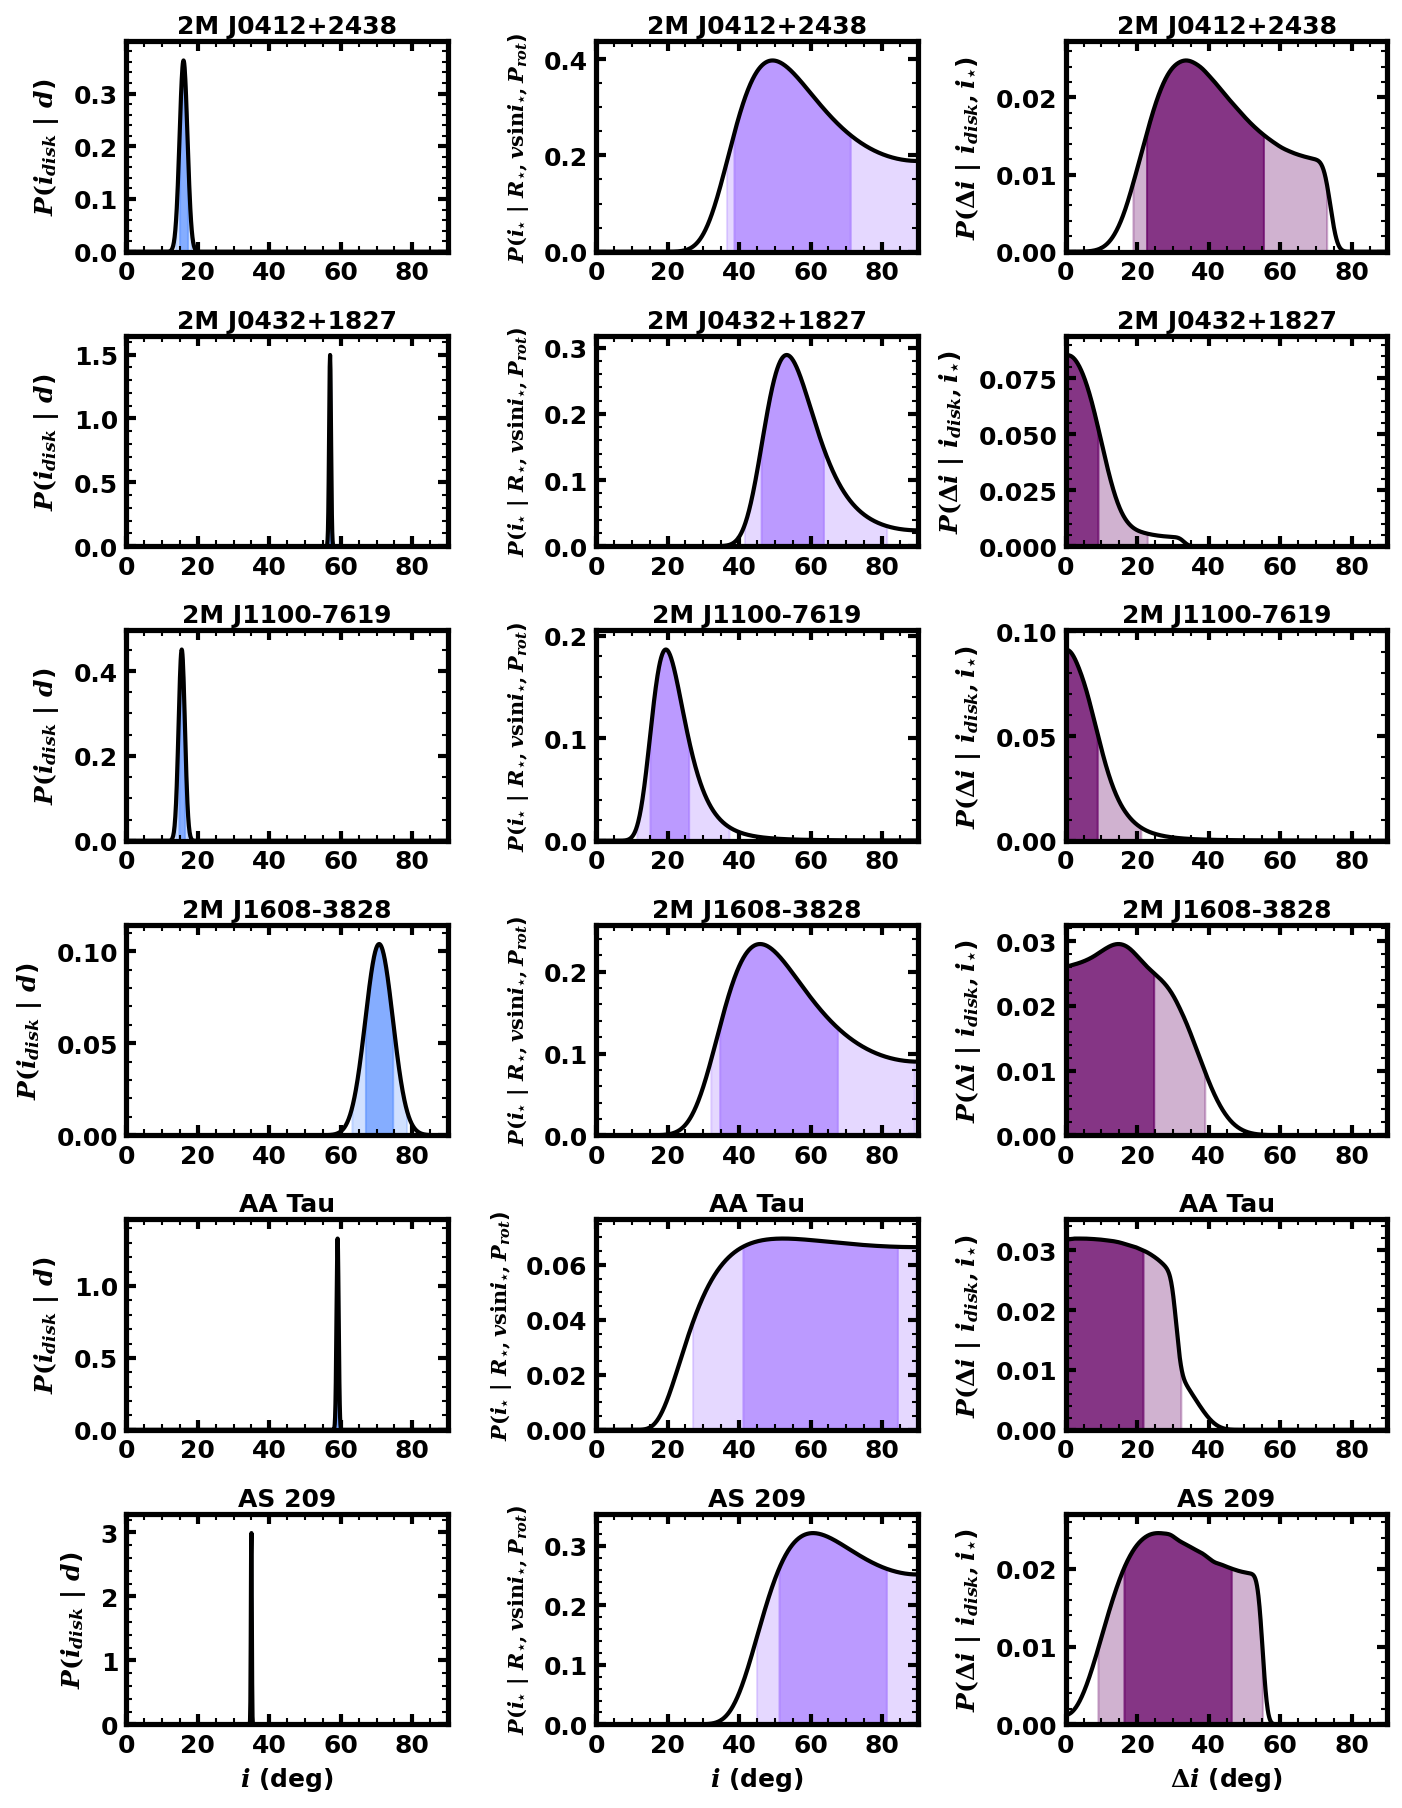

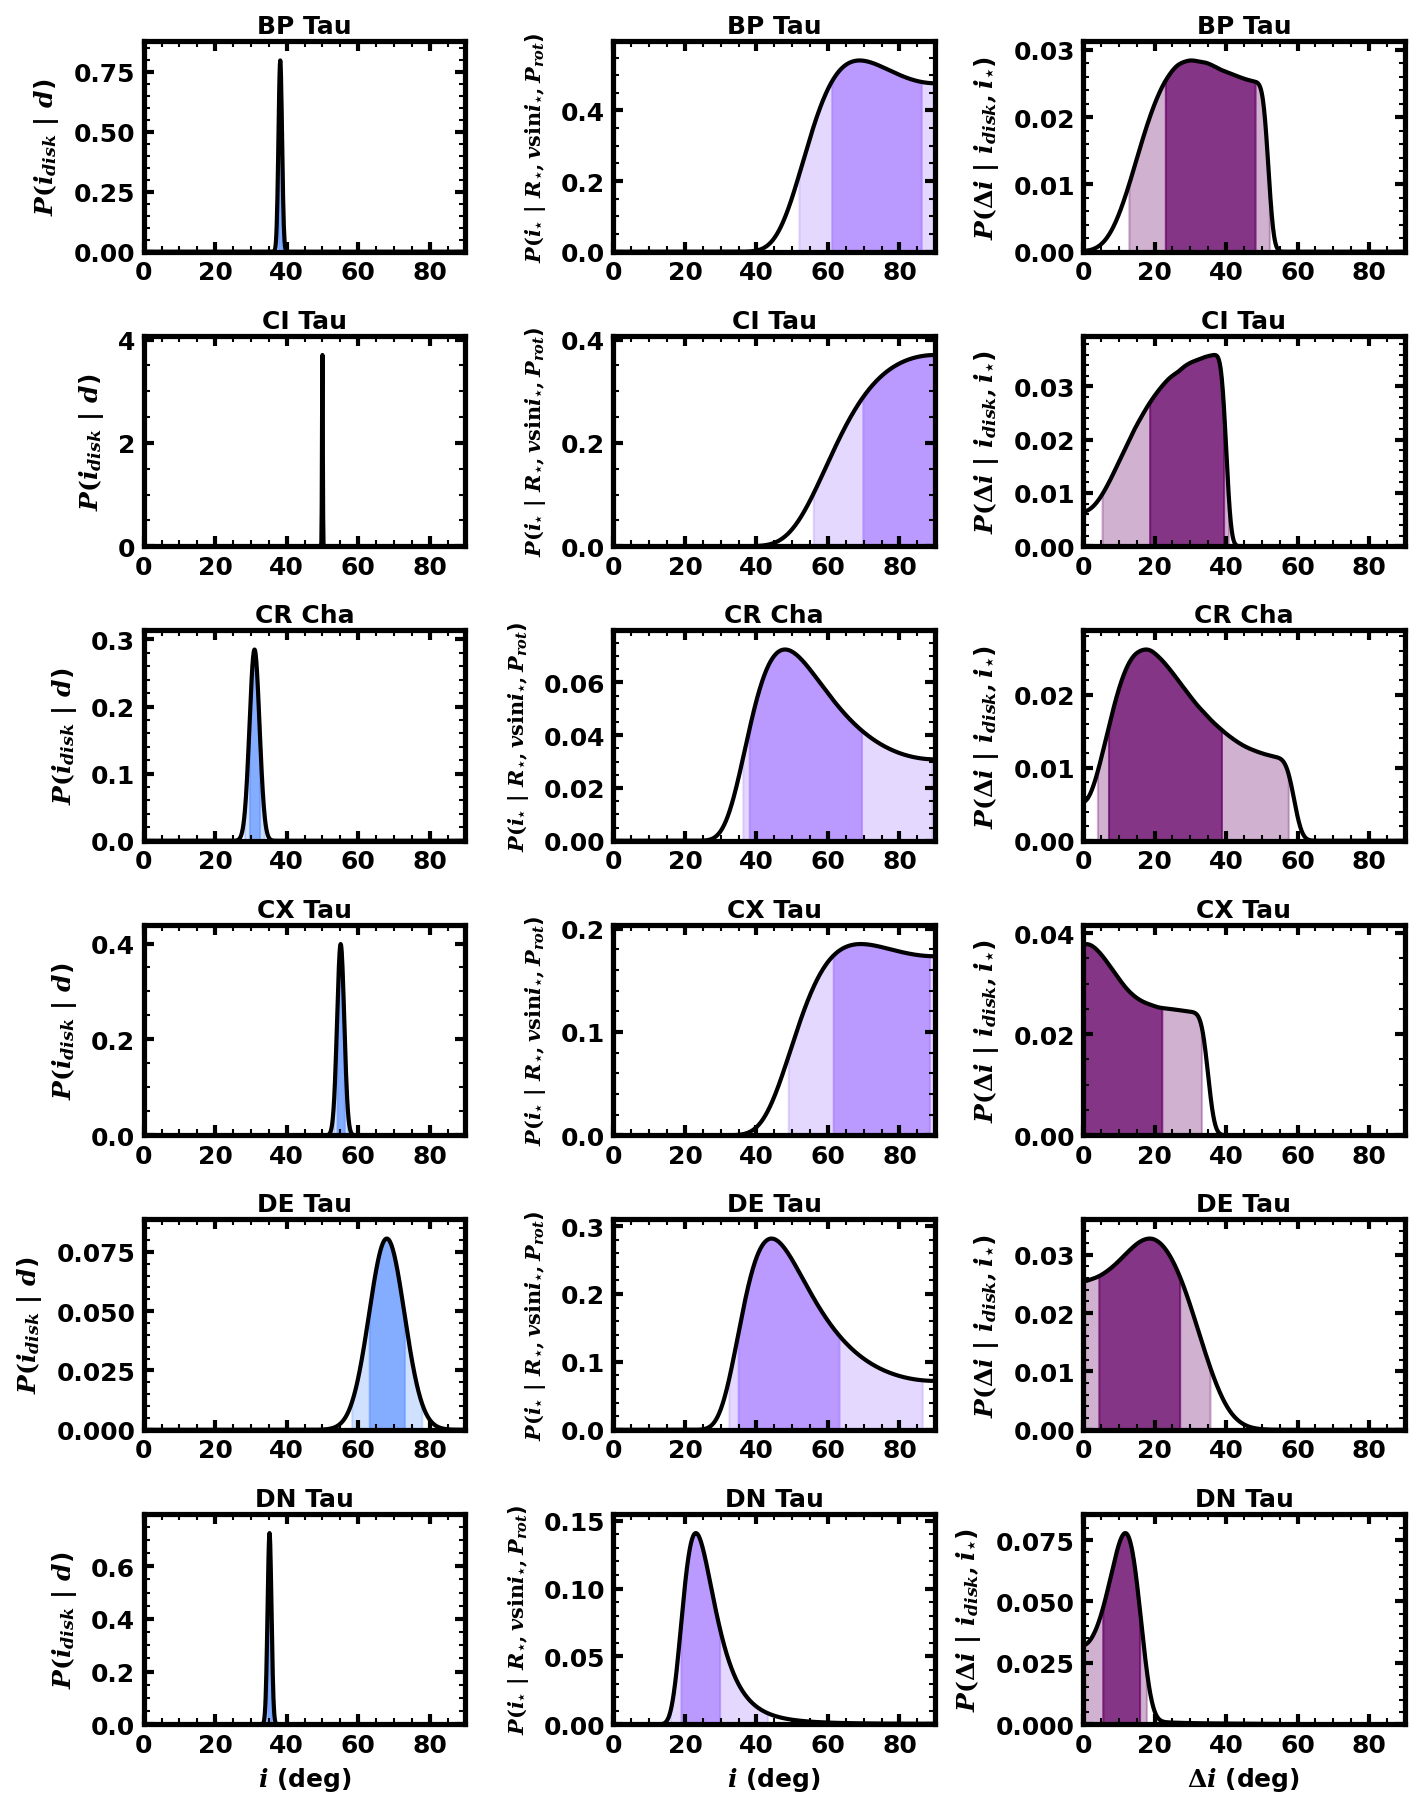

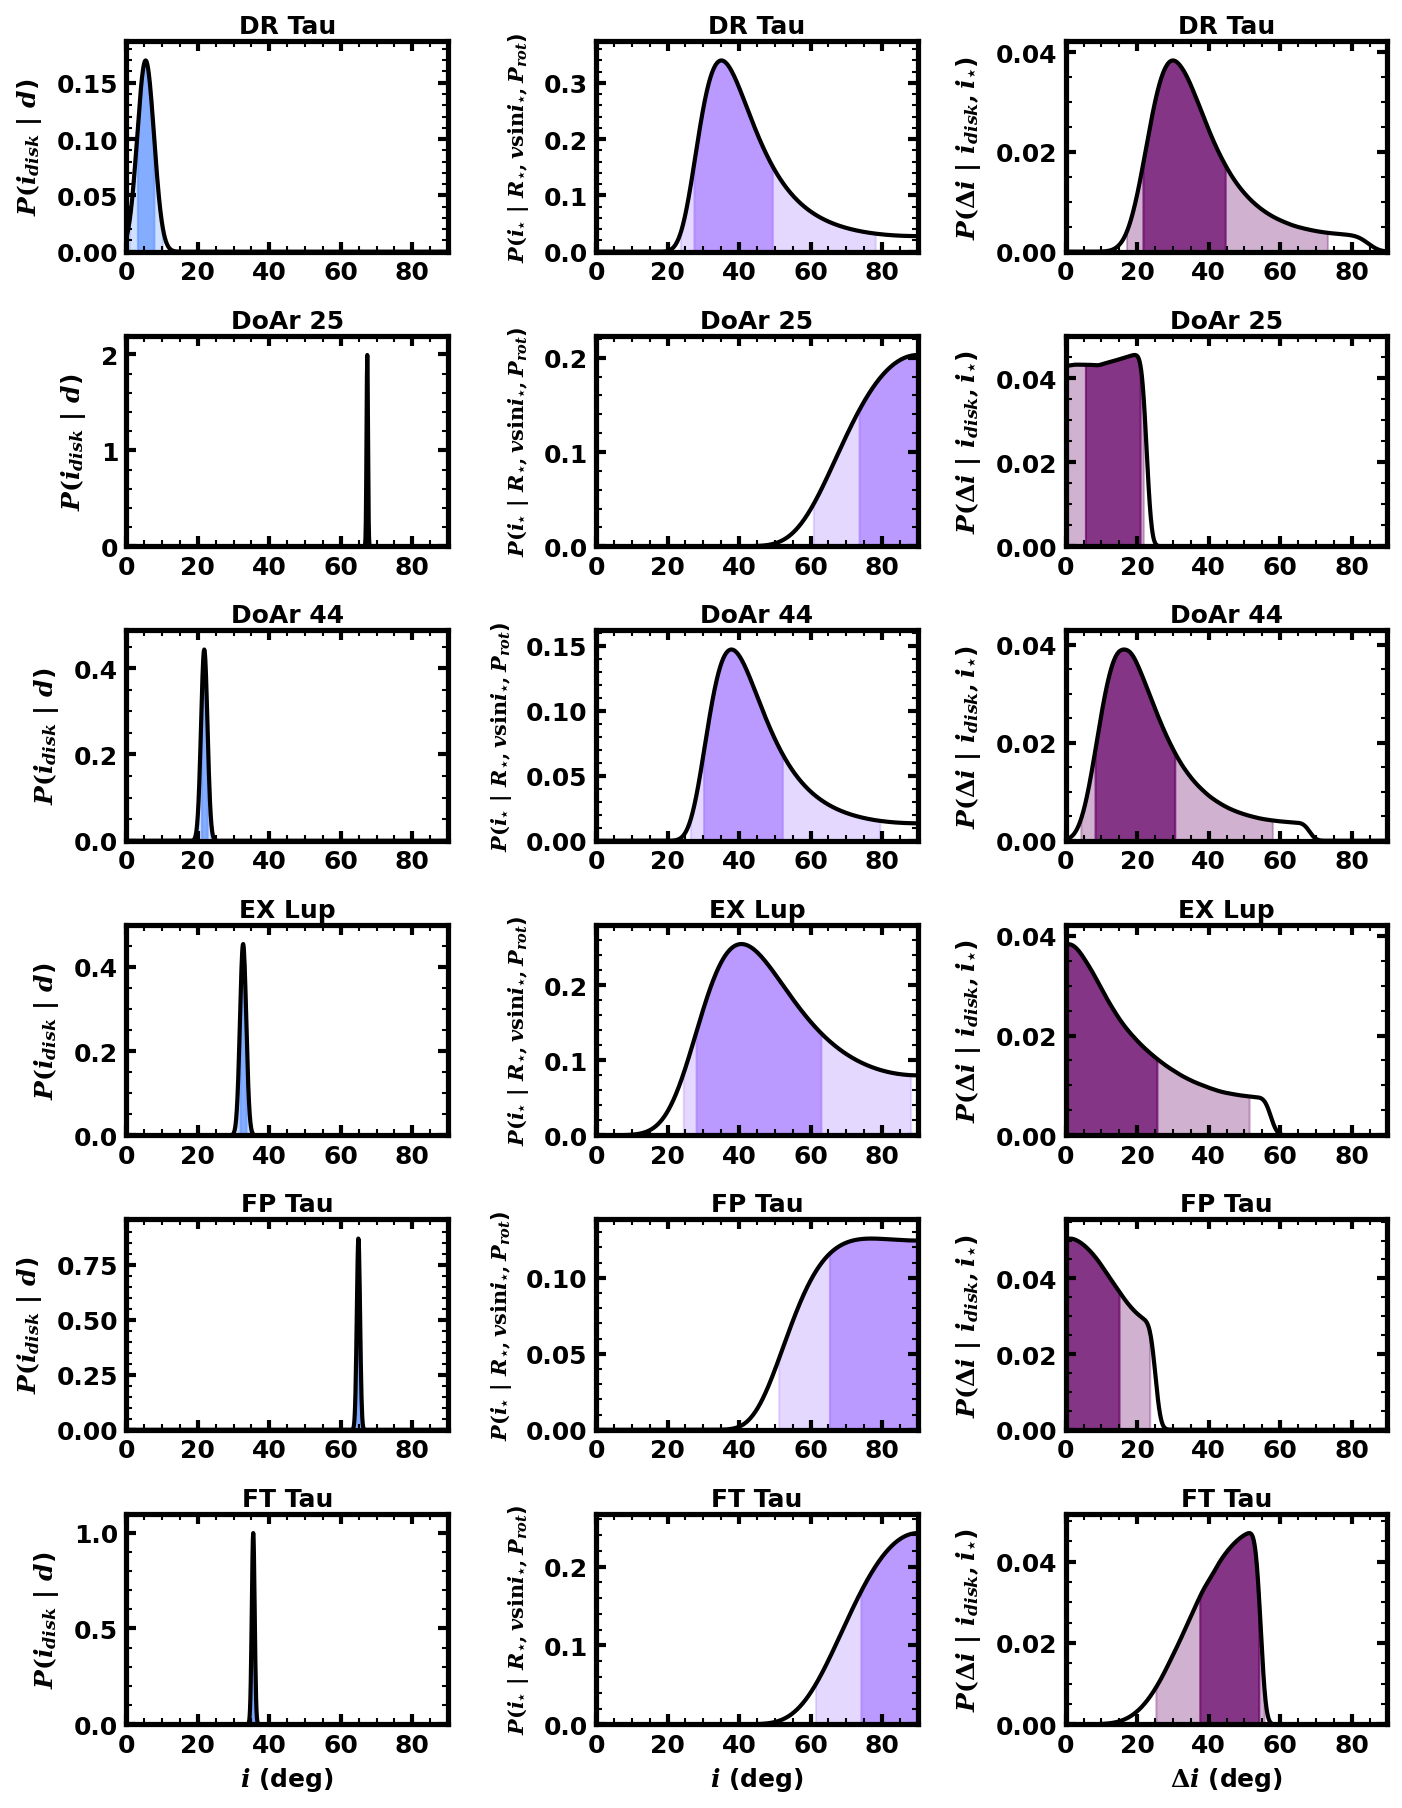

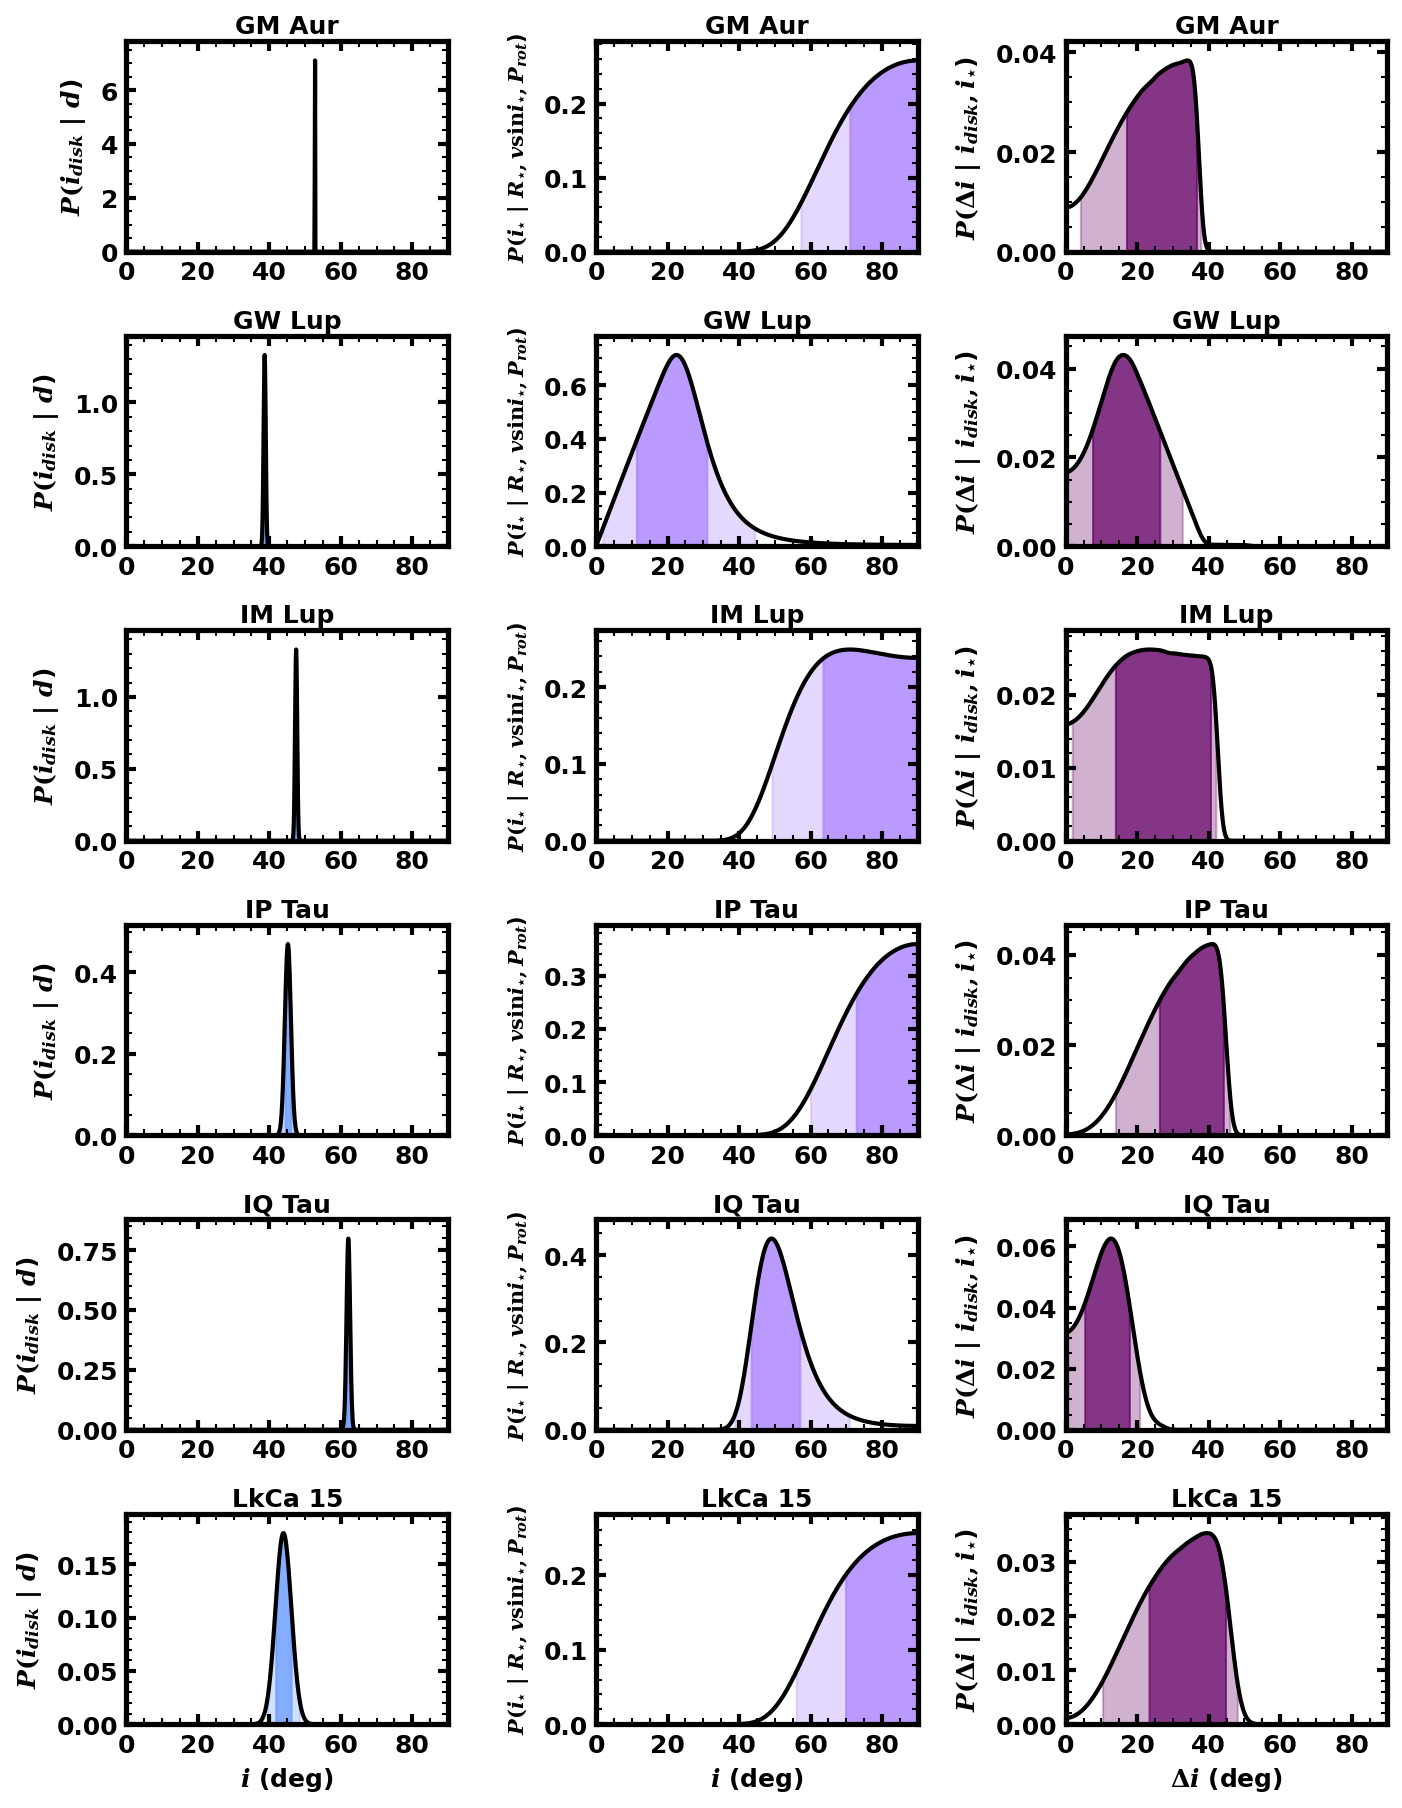

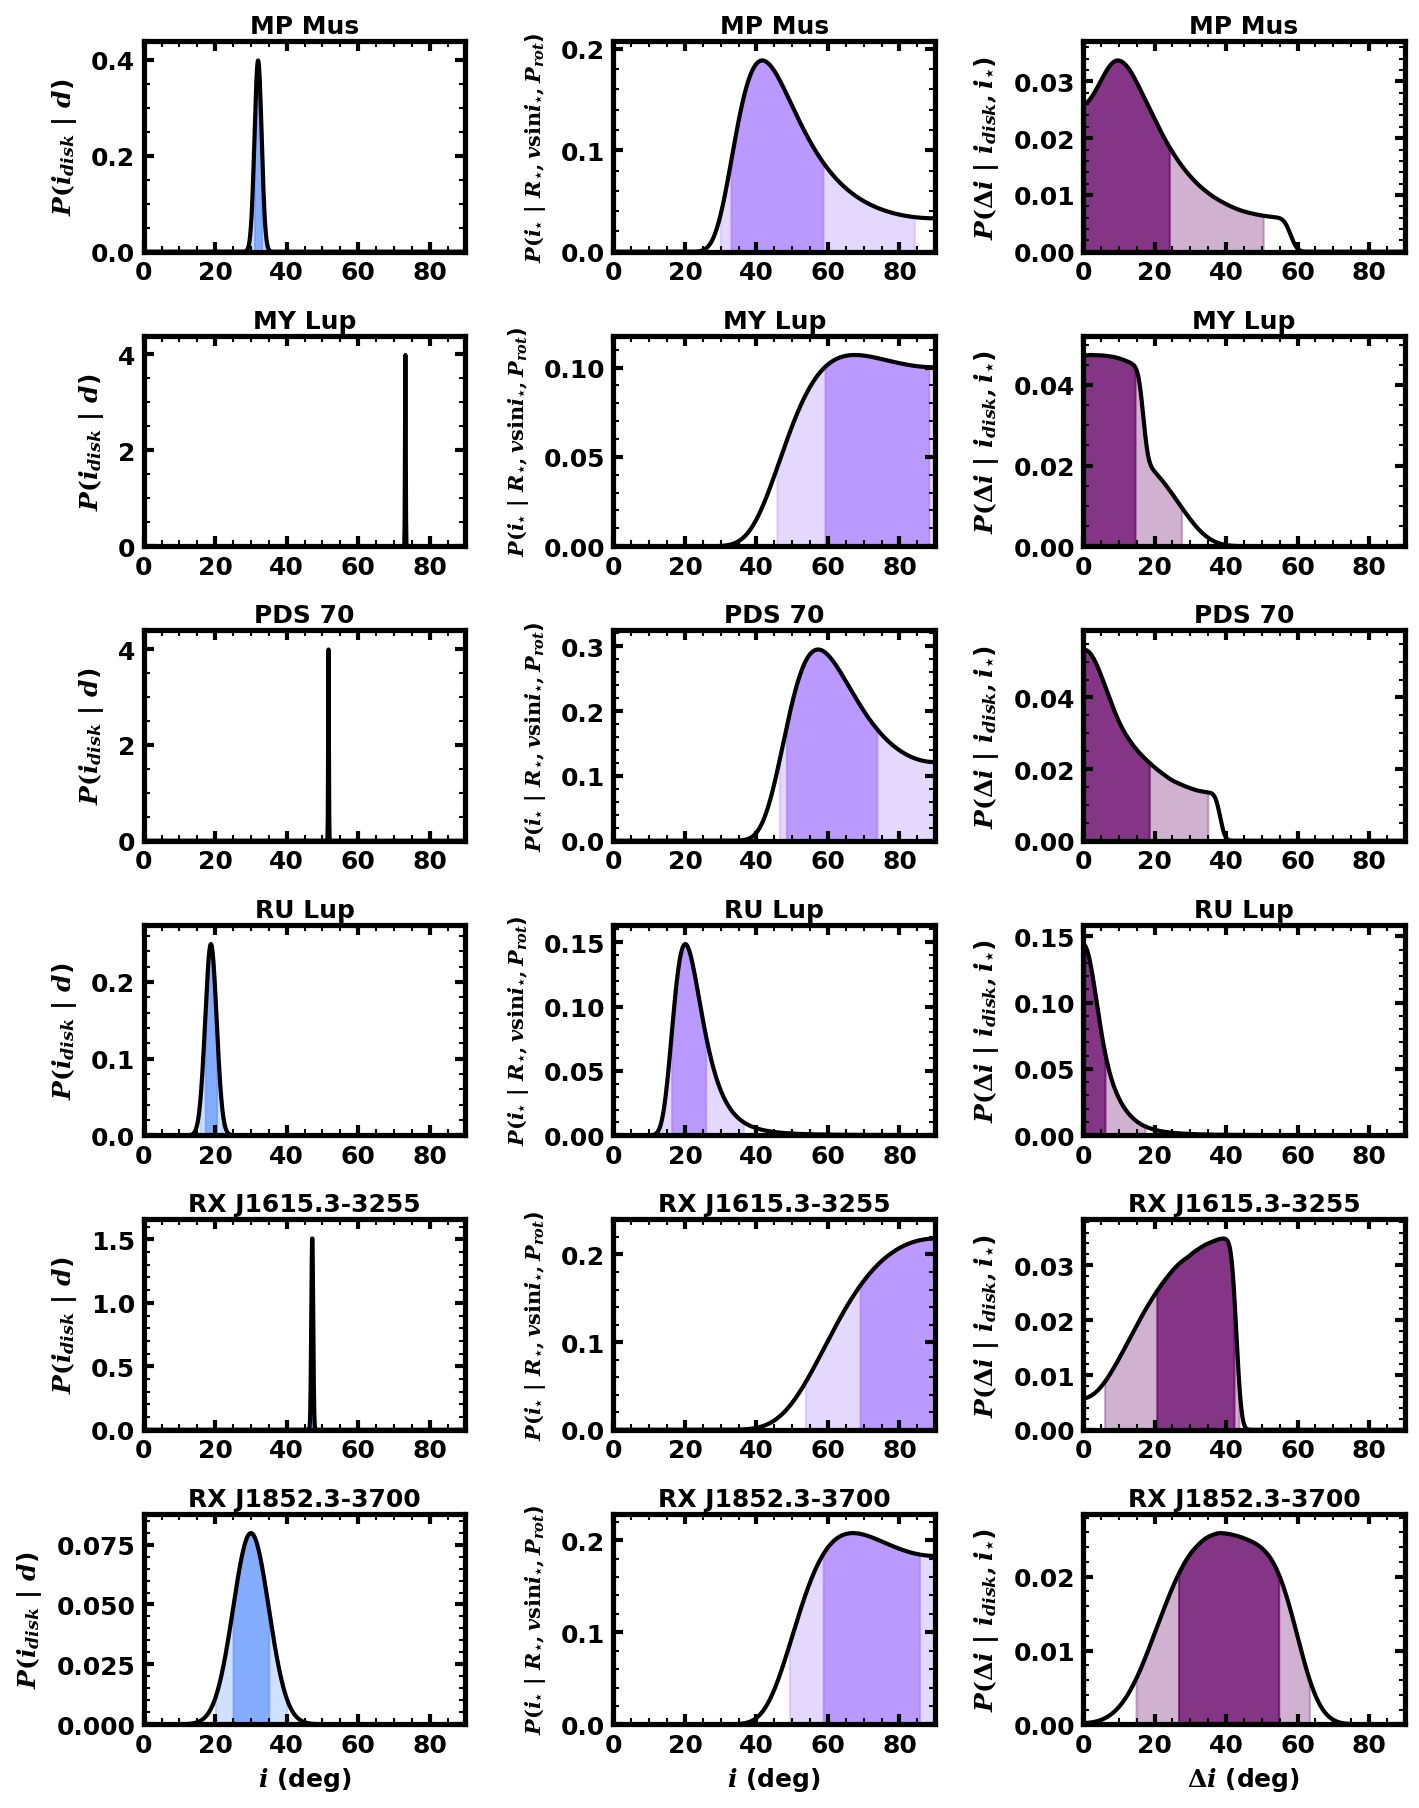

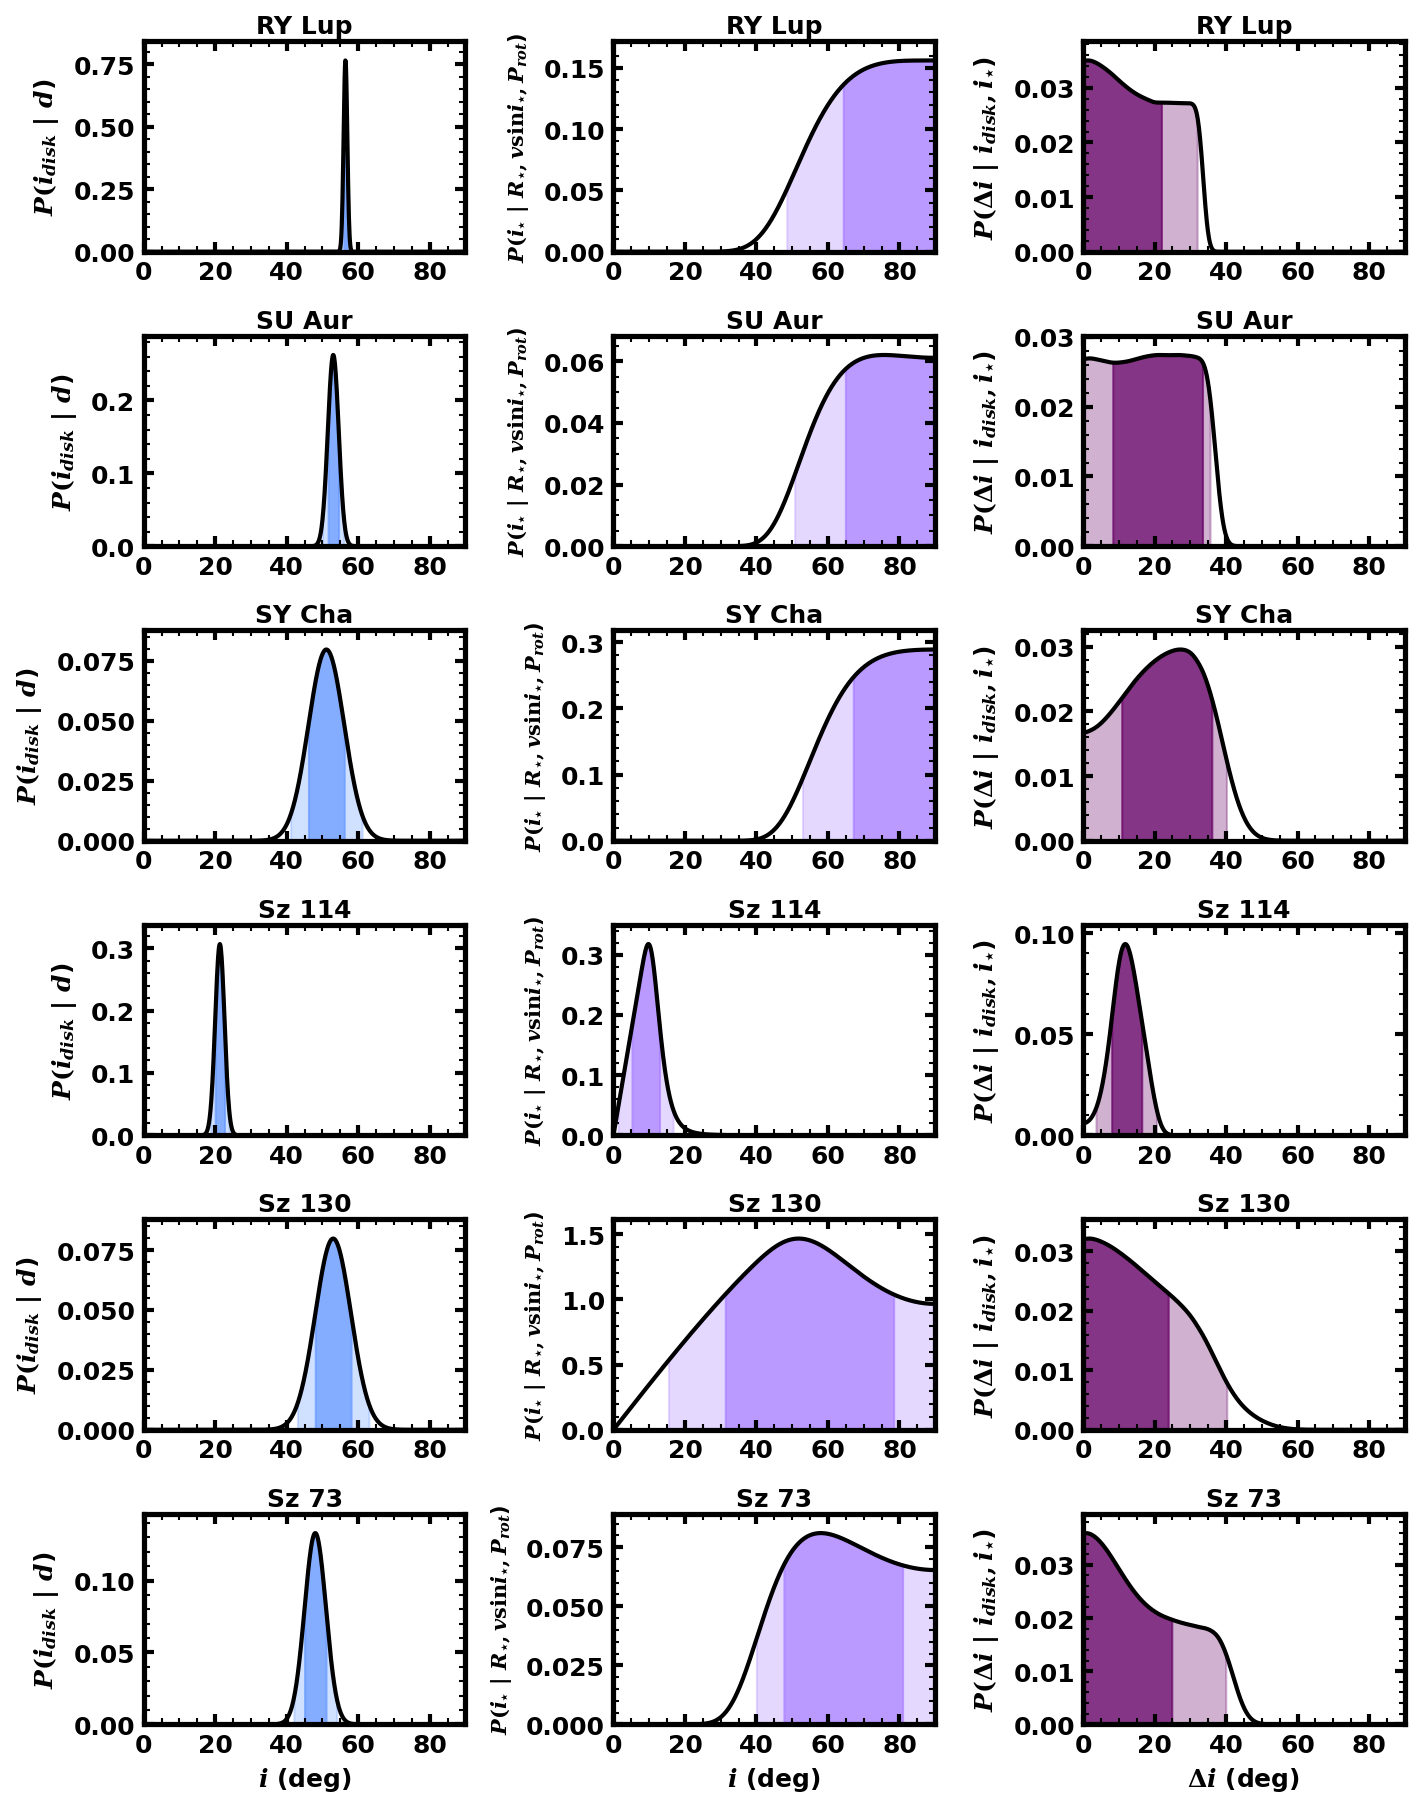

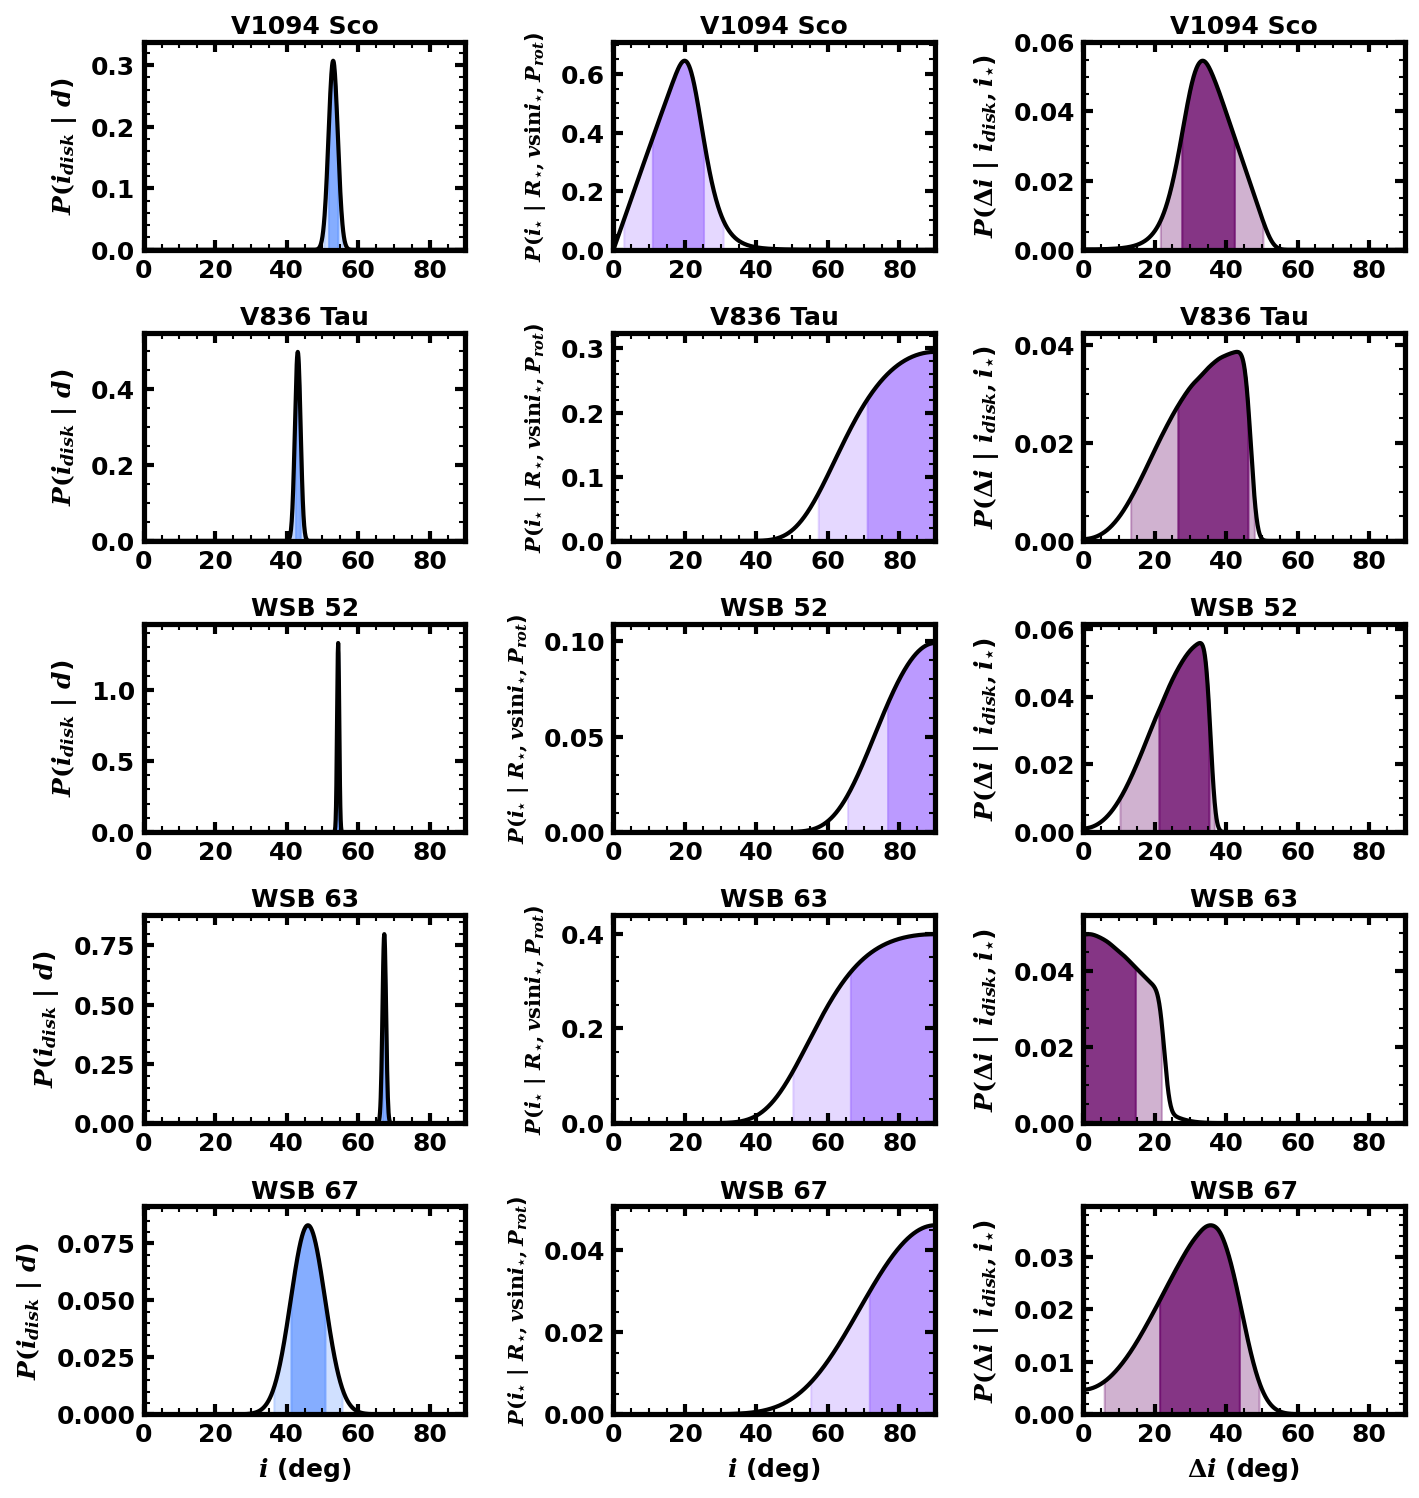

In [419]:
title_fontsize = 12
label_fontsize = 12
tick_fontsize = 12
targetlabel_fontsize = 12

title_weight = 'semibold'

title_pad = 4
label_pad = 6

ccombonum = 4

if ccombonum == 1:
    ccombo = ['#29a366', '#003366', '#007399']
elif ccombonum == 2:
    ccombo = ['#2eb8b8', '#aa80ff', '#660066']
elif ccombonum == 3:
    ccombo = ['#6d931f', '#4d0019', '#007399']
elif ccombonum == 4:
    ccombo = ['#6699ff', '#aa80ff', '#660066']

i_disk_fill_color = ccombo[0]
i_star_fill_color = ccombo[1]
Delta_i_fill_color = ccombo[2]

alpha_sig2 = 0.3
alpha_sig1 = 1 - alpha_sig2


grid_width = 3
grid_height = 6

setnum = 0

fig_height = 12
fig_width = 9.5

original_fig_height = 12

frame_numbers_on = False


sig1_widths = []

misaligned10_90percent_confidence = []
misaligned10_80percent_confidence = []

misaligned20_90percent_confidence = []
misaligned20_80percent_confidence = []



for targetnum in range(len(condensed_df_stassun['Simbad Name'].values)-1):

    # print(targetnum)

    if targetnum != 0:
        targetnum += 1

    if targetnum >= 36:
        grid_height = len(condensed_df_stassun['Simbad Name'].values) - 36
        # print('grid height: ', grid_height)

    if grid_height < 6:
        fig_height = (grid_height / 6 ) * original_fig_height

    if np.mod(targetnum, 6) == 0:
        setnum += 1

        fig = plt.figure(figsize=(fig_width, fig_height), dpi=150)
        gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[1, 1, 1])
        axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width)]

        for ax_i, ax in enumerate(axes):

            #print(targetnum)

            ax.minorticks_on()
            ax.set_rasterized(True)

            if (np.mod(ax_i, grid_width) == 0) and (ax_i != 0):
                targetnum += 1


            simbad_name = condensed_df_stassun['Simbad Name'].values[targetnum]
            if '2MASS' in simbad_name:
                if '+' in simbad_name[5:]:
                    split1 = simbad_name[5:].split('+')[0].replace(' ', '')[0:5]
                    split2 = '+' + simbad_name[5:].split('+')[1].replace(' ', '')[0:4]
                if '-' in simbad_name[5:]:
                    split1 = simbad_name[5:].split('-')[0].replace(' ', '')[0:5]
                    split2 = '-' + simbad_name[5:].split('-')[1].replace(' ', '')[0:4]
                target = '2M ' + split1 + split2
            else:
                target = simbad_name

            target_str = condensed_df_stassun['Simbad Name'].values[targetnum].replace(' ', '')
            if '/' in condensed_df_stassun['Simbad Name'].values[targetnum]:
                target_str = target_str.replace('/', '-')


            Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
            i_values = Pdensity['i (deg)'].values

            P_i_disk = Pdensity['P(i Disk | i)'].values
            MAP_i_disk = Pdensity['i Disk MAP'].values[0]
            sig1_m_i_disk = Pdensity['i Disk -Unc1'].values[0]
            sig1_p_i_disk = Pdensity['i Disk +Unc1'].values[0]
            sig2_m_i_disk = Pdensity['i Disk -Unc2'].values[0]
            sig2_p_i_disk = Pdensity['i Disk +Unc2'].values[0]

            P_i_star = Pdensity['P(i Star | i)'].values
            MAP_i_star = Pdensity['i Star MAP'].values[0]
            sig1_m_i_star = Pdensity['i Star -Unc1'].values[0]
            sig1_p_i_star = Pdensity['i Star +Unc1'].values[0]
            sig2_m_i_star = Pdensity['i Star -Unc2'].values[0]
            sig2_p_i_star = Pdensity['i Star +Unc2'].values[0]

            P_Delta_i = Pdensity['P(Delta i | i)'].values
            MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
            sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
            sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
            sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
            sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]

            # if np.mod(ax_i, grid_width) == 0:
            #     for spine in ax.spines.values():
            #         spine.set_edgecolor('#ffffff')
            #     ax.set_xticklabels([])
            #     ax.set_yticklabels([])
            #     ax.tick_params(axis='both', which='both', color='#ffffff')
            #     ax.text(0.85, 0.50, target, horizontalalignment='right', verticalalignment='center', fontsize=targetlabel_fontsize, color='#000000', transform=ax.transAxes)

            # else:
            for spine in ax.spines.values():
                spine.set_linewidth(2.5)

            # SPECIFY THE X TICKS
            xticks = [0, 20, 40, 60, 80]
            xticklabels = [str(int(xtick)) for xtick in xticks]
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticklabels)
            ax.set_xlim(0, 90)

            # LABEL THE X AXES
            if ax_i >= 3 * (grid_height - 1):
                if (np.mod(ax_i, grid_width) == 0) or (np.mod(ax_i - 1, grid_width) == 0):
                    ax.set_xlabel('$i$ (deg)', fontsize=label_fontsize)
                if np.mod(ax_i - 2, grid_width) == 0:
                    ax.set_xlabel(r'$\Delta i$ (deg)', fontsize=label_fontsize)
            
            # PLOT THE DISK DISTRIBUTION
            if np.mod(ax_i, grid_width) == 0:
                ax.set_title(target, fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
                ax.set_ylabel(r'$P(i_{disk}$ | $d$)', fontsize=label_fontsize, labelpad=label_pad)

                ax.plot(i_values, P_i_disk, color='#000000', lw=2, zorder=4)
                where_sig1 = np.where((i_values >= MAP_i_disk - sig1_m_i_disk) & (i_values <= MAP_i_disk + sig1_p_i_disk))[0]
                where_sig2 = np.where((i_values >= MAP_i_disk - sig2_m_i_disk) & (i_values <= MAP_i_disk + sig2_p_i_disk))[0]
                ax.fill_between(x=i_values[where_sig1], y1=P_i_disk[where_sig1], color=i_disk_fill_color, alpha=alpha_sig1, zorder=-1)
                ax.fill_between(x=i_values[where_sig2], y1=P_i_disk[where_sig2], color=i_disk_fill_color, alpha=alpha_sig2, zorder=-1)
                ax.set_ylim(0, 1.10*max(P_i_disk))

            # PLOT THE STAR DISTRIBUTION
            if np.mod(ax_i - 1, grid_width) == 0:
                ax.set_title(target, fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
                ax.set_ylabel(r'$P(i_{\mathdefault{\star}}$ | $R_{\mathdefault{\star}}, v\mathrm{sin}i_{\mathdefault{\star}}, P_{rot}$)', fontsize=label_fontsize-2, labelpad=label_pad)

                ax.plot(i_values, P_i_star, color='#000000', lw=2, zorder=4)
                where_sig1 = np.where((i_values >= MAP_i_star - sig1_m_i_star) & (i_values <= MAP_i_star + sig1_p_i_star))[0]
                where_sig2 = np.where((i_values >= MAP_i_star - sig2_m_i_star) & (i_values <= MAP_i_star + sig2_p_i_star))[0]
                ax.fill_between(x=i_values[where_sig1], y1=P_i_star[where_sig1], color=i_star_fill_color, alpha=alpha_sig1, zorder=-1)
                ax.fill_between(x=i_values[where_sig2], y1=P_i_star[where_sig2], color=i_star_fill_color, alpha=alpha_sig2, zorder=-1)
                ax.set_ylim(0, 1.10*max(P_i_star))

            # PLOT THE STAR DISTRIBUTION
            if np.mod(ax_i - 2, grid_width) == 0:
                ax.set_title(target, fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
                ax.set_ylabel(r'$P(\Delta i$ | $i_{disk}, i_{\mathdefault{\star}}$)', fontsize=label_fontsize, labelpad=label_pad)
                
                ax.plot(i_values, P_Delta_i, color='#000000', lw=2, zorder=4)
                where_sig1 = np.where((i_values >= MAP_Delta_i - sig1_m_Delta_i) & (i_values <= MAP_Delta_i + sig1_p_Delta_i))[0]
                where_sig2 = np.where((i_values >= MAP_Delta_i - sig2_m_Delta_i) & (i_values <= MAP_Delta_i + sig2_p_Delta_i))[0]
                i_MAP = i_values[P_Delta_i == max(P_Delta_i)]
                ax.fill_between(x=i_values[where_sig1], y1=P_Delta_i[where_sig1], color=Delta_i_fill_color, alpha=alpha_sig1, zorder=-1)
                ax.fill_between(x=i_values[where_sig2], y1=P_Delta_i[where_sig2], color=Delta_i_fill_color, alpha=alpha_sig2, zorder=-1)
                ax.set_ylim(0, 1.10*max(P_Delta_i))

                sig1_widths.append(abs(i_values[where_sig1][-1] - np.mean(i_MAP)))
                sig1_widths.append(abs(i_values[where_sig1][0] - np.mean(i_MAP)))

            ax.tick_params(axis='x', which='major', width=2, length=5, labelsize=tick_fontsize, pad=4)
            ax.tick_params(axis='x', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=4)
            ax.tick_params(axis='y', which='major', width=2, length=5, labelsize=tick_fontsize, pad=4)
            ax.tick_params(axis='y', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=4)

            if frame_numbers_on == True:
                ax.text(0.5, 0.5, ax_i, horizontalalignment='center', verticalalignment='center', fontsize=24, color='red', transform=ax.transAxes)

        
        if grid_height == 6:
            fig.subplots_adjust(left=0.10, bottom=0.04, right=0.985, top=0.975, wspace=0.46, hspace=0.40)
        if grid_height < 6:
            fig.subplots_adjust(left=0.10, bottom=0.06, right=0.985, top=0.975, wspace=0.46, hspace=0.40)
        fig.savefig(test_figures_directory + 'sample_grid_' + str(setnum) + '.pdf', dpi=300, transparent=False)
        plt.show()


In [425]:
misaligned10_90percent_confidence = []
misaligned10_80percent_confidence = []

misaligned20_90percent_confidence = []
misaligned20_80percent_confidence = []

for target_i in range(len(condensed_df_stassun['Simbad Name'].values)):

    target_str = condensed_df_stassun['Simbad Name'].values[target_i].replace(' ', '')
    if '/' in condensed_df_stassun['Simbad Name'].values[target_i]:
        target_str = target_str.replace('/', '-')


    Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
    i_values = Pdensity['i (deg)'].values

    P_Delta_i = Pdensity['P(Delta i | i)'].values
    MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
    sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
    sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
    sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
    sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]


    P_Delta_i = P_Delta_i/(sum(P_Delta_i)*np.diff(i_values)[0])

    # print('\n', target_str)
    # print('MAP VALUE:  ', MAP_Delta_i)

    if MAP_Delta_i >= 10:
        confidence_level_gt_10 = determine_misalignment(param_x=i_values, pdf_y=P_Delta_i, threshold=10)

        if confidence_level_gt_10 >= 0.90:
            if target_str not in misaligned10_90percent_confidence:
                misaligned10_90percent_confidence.append(target_str)
        if confidence_level_gt_10 >= 0.80:
            if target_str not in misaligned10_80percent_confidence:
                misaligned10_80percent_confidence.append(target_str)

        if MAP_Delta_i >= 20:
            confidence_level_gt_20 = determine_misalignment(param_x=i_values, pdf_y=P_Delta_i, threshold=20)

            if confidence_level_gt_20 >= 0.90:
                if target_str not in misaligned20_90percent_confidence:
                    misaligned20_90percent_confidence.append(target_str)
            if confidence_level_gt_20 >= 0.80:
                if target_str not in misaligned20_80percent_confidence:
                    misaligned20_80percent_confidence.append(target_str)

In [426]:

misaligned10_90percent_confidence_fraction = round(len(misaligned10_90percent_confidence)/len(condensed_df_stassun['Simbad Name'].values), 2)
misaligned10_80percent_confidence_fraction = round(len(misaligned10_80percent_confidence)/len(condensed_df_stassun['Simbad Name'].values), 2)

misaligned20_90percent_confidence_fraction = round(len(misaligned20_90percent_confidence)/len(condensed_df_stassun['Simbad Name'].values), 2)
misaligned20_80percent_confidence_fraction = round(len(misaligned20_80percent_confidence)/len(condensed_df_stassun['Simbad Name'].values), 2)

print(' ')
print(r'MISALIGNED >= 10 deg, 80% confidence:  ', misaligned10_80percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned10_80percent_confidence), len(condensed_df_stassun['Simbad Name'].values)))
print(r'MISALIGNED >= 20 deg, 80% confidence:  ', misaligned20_80percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned20_80percent_confidence), len(condensed_df_stassun['Simbad Name'].values)))
print(' ')
print(r'MISALIGNED >= 10 deg, 90% confidence:  ', misaligned10_90percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned10_90percent_confidence), len(condensed_df_stassun['Simbad Name'].values)))
print(r'MISALIGNED >= 20 deg, 90% confidence:  ', misaligned20_90percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned20_90percent_confidence), len(condensed_df_stassun['Simbad Name'].values)))
print(' ')
print(misaligned10_90percent_confidence)
print(misaligned10_80percent_confidence)

 
MISALIGNED >= 10 deg, 80% confidence:   0.46 19/41
MISALIGNED >= 20 deg, 80% confidence:   0.22 9/41
 
MISALIGNED >= 10 deg, 90% confidence:   0.34 14/41
MISALIGNED >= 20 deg, 90% confidence:   0.12 5/41
 
['2MASSJ04124068+2438157', 'AS209', 'BPTau', 'DRTau', 'DoAr44', 'FTTau', 'IPTau', 'LkCa15', 'RXJ1615.3-3255', 'RXJ1852.3-3700', 'V1094Sco', 'V836Tau', 'WSB52', 'WSB67']
['2MASSJ04124068+2438157', 'AS209', 'BPTau', 'CITau', 'CRCha', 'DRTau', 'DoAr44', 'FTTau', 'GMAur', 'IMLup', 'IPTau', 'LkCa15', 'RXJ1615.3-3255', 'RXJ1852.3-3700', 'SYCha', 'V1094Sco', 'V836Tau', 'WSB52', 'WSB67']


In [427]:
# target_nums = choices(np.arange(len(condensed_df_stassun['Simbad Name'].values)), k=1)[0]
# target_nums



In [428]:
list_of_targets = []
list_of_posteriors = []
list_of_MAPS = []

for target_boop in range(len(condensed_df_stassun['Simbad Name'].values)):

    target_str = condensed_df_stassun['Simbad Name'].values[target_boop].replace(' ', '')
    if '/' in condensed_df_stassun['Simbad Name'].values[target_boop]:
        target_str = target_str.replace('/', '-')

    Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
    i_values = Pdensity['i (deg)'].values

    P_Delta_i = Pdensity['P(Delta i | i)'].values
    MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
    sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
    sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
    sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
    sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]

    list_of_targets.append(target_str)
    list_of_posteriors.append(P_Delta_i)
    list_of_MAPS.append(MAP_Delta_i)
    

In [435]:
bep_iters = int(1e4)

sample_size = len(condensed_df_stassun['Simbad Name'].values)


misaligned_10_fractions_c90 = []
misaligned_20_fractions_c90 = []
misaligned_10_fractions_c80 = []
misaligned_20_fractions_c80 = []

for bep_iter in range(bep_iters):

    misaligned_10_c90 = 0
    misaligned_20_c90 = 0
    misaligned_10_c80 = 0
    misaligned_20_c80 = 0

    for target_n in range(sample_size):

        single_draw = choices(i_values, list_of_posteriors[target_n], k=1)[0]

        if single_draw >= 10:
            confidence_level_gt_10 = determine_misalignment(param_x=i_values, pdf_y=list_of_posteriors[target_n], threshold=10)
            if confidence_level_gt_10 >= 0.90:
                misaligned_10_c90 += 1
            if confidence_level_gt_10 >= 0.80:
                misaligned_10_c80 += 1
        if single_draw >= 20:
            confidence_level_gt_20 = determine_misalignment(param_x=i_values, pdf_y=list_of_posteriors[target_n], threshold=20)
            if confidence_level_gt_20 >= 0.90:
                misaligned_20_c90 += 1
            if confidence_level_gt_20 >= 0.80:
                misaligned_20_c80 += 1

    misaligned_10_fractions_c90.append(misaligned_10_c90 / sample_size)
    misaligned_20_fractions_c90.append(misaligned_20_c90 / sample_size)
    misaligned_10_fractions_c80.append(misaligned_10_c80 / sample_size)
    misaligned_20_fractions_c80.append(misaligned_20_c80 / sample_size)






In [436]:
# min(np.diff(sorted(misaligned_10_fractions))[np.diff(sorted(misaligned_10_fractions)) > 0])

fraction bin width:  0.03
 
0.33 + 0.019999862572735616 - 0.04779447543838877
 
0.12 + 0.019999892319046197 - 0.03248803734680425
 


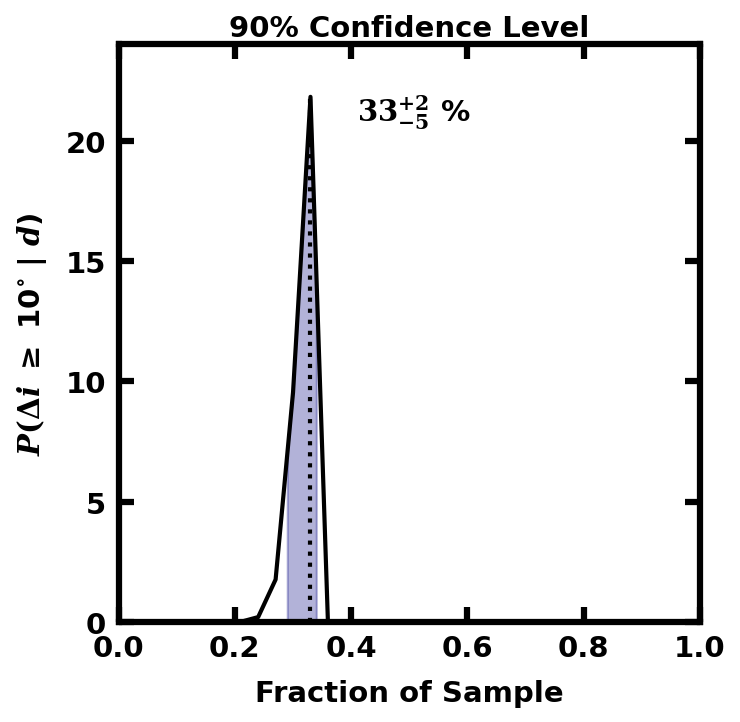

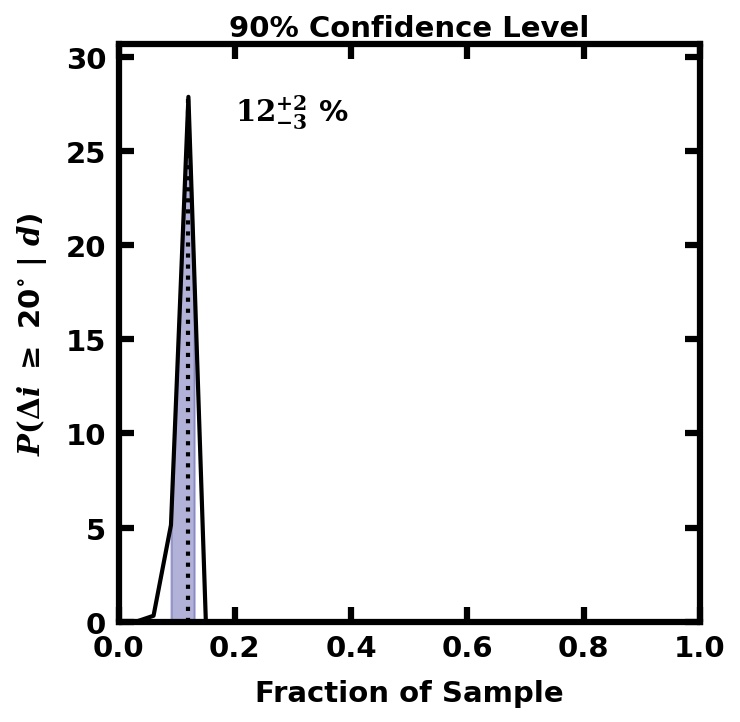

In [439]:
which_confidence_level = 90
if which_confidence_level == 90:
    misaligned_10_fractions = misaligned_10_fractions_c90
    misaligned_20_fractions = misaligned_20_fractions_c90
if which_confidence_level == 80:
    misaligned_10_fractions = misaligned_10_fractions_c80
    misaligned_20_fractions = misaligned_20_fractions_c80



fraction_bin_width = 0.03  # round(max([min(np.diff(sorted(misaligned_10_fractions))[np.diff(sorted(misaligned_10_fractions)) > 0]), min(np.diff(sorted(misaligned_20_fractions))[np.diff(sorted(misaligned_20_fractions)) > 0])]), 2)  # 0.03 # np.diff(i_values)[0]/max(i_values)
print('fraction bin width: ', fraction_bin_width)
fraction_bins = np.arange(0, 1.0 + 2*fraction_bin_width, fraction_bin_width)
hist_misaligned_10_fractions, _ = np.histogram(misaligned_10_fractions, bins=fraction_bins)
hist_misaligned_20_fractions, _ = np.histogram(misaligned_20_fractions, bins=fraction_bins)

posterior_misaligned_10_fractions = hist_misaligned_10_fractions / (sum(hist_misaligned_10_fractions) * fraction_bin_width)
posterior_misaligned_20_fractions = hist_misaligned_20_fractions / (sum(hist_misaligned_20_fractions) * fraction_bin_width)

confidence_level = 0.01 * which_confidence_level     # 0.6826

# print(fraction_bins[:-1][posterior_misaligned_10_fractions == max(posterior_misaligned_10_fractions)])[0]

misaligned_10_MAP, sig1_misaligned_10_m, sig1_misaligned_10_p, fraction_values, posterior_misaligned_10_fractions = mode_pm_highest_density_interval(x=fraction_bins[:-1], pdf_y=posterior_misaligned_10_fractions, sigma=confidence_level, return_pdf=True)
misaligned_20_MAP, sig1_misaligned_20_m, sig1_misaligned_20_p, fraction_values, posterior_misaligned_20_fractions = mode_pm_highest_density_interval(x=fraction_bins[:-1], pdf_y=posterior_misaligned_20_fractions, sigma=confidence_level, return_pdf=True)

print(' ')
print(misaligned_10_MAP, '+', abs(sig1_misaligned_10_p), '-', abs(sig1_misaligned_10_m))
print(' ')
print(misaligned_20_MAP, '+', abs(sig1_misaligned_20_p), '-', abs(sig1_misaligned_20_m))
print(' ')

fraction_fontsize = 14
fraction_labelpad = 8

conf_fig = plt.figure(figsize=(5, 5), dpi=150)
ax = conf_fig.add_subplot(111)
ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
ax.set_ylabel(r'$P(\Delta i$ $\geq$ 10$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
ax.set_xlabel('Fraction of Sample', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

fraction_fill_color = 'Navy'
ax.plot(fraction_values, posterior_misaligned_10_fractions, color='#000000', lw=2, zorder=4)
ax.plot([misaligned_10_MAP, misaligned_10_MAP], [0, max(posterior_misaligned_10_fractions)], ls=':', color='#000000', lw=2, zorder=4)

where_fill = np.where((fraction_values >= misaligned_10_MAP - sig1_misaligned_10_m) & (fraction_values <= misaligned_10_MAP + sig1_misaligned_10_p))[0]
ax.fill_between(x=fraction_values[where_fill], y1=posterior_misaligned_10_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
ax.set_ylim(0, 1.10*max(posterior_misaligned_10_fractions))
ax.set_xlim(0, 1)

fraction_text = "${:d}^{{+{:d}}}_{{-{:d}}}$ %".format(round(misaligned_10_MAP*100), round(sig1_misaligned_10_p*100), round(sig1_misaligned_10_m*100))
# fraction_text = "${:.1f}^{{+{:.1f}}}_{{-{:.1f}}}$ %".format(round(misaligned_10_MAP*100, 1), round(sig1_misaligned_10_p*100, 1), round(sig1_misaligned_10_m*100, 1))
ax.text(misaligned_10_MAP + 0.08, 0.85, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

plt.show()


conf_fig = plt.figure(figsize=(5, 5), dpi=150)
ax = conf_fig.add_subplot(111)
ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
ax.set_ylabel(r'$P(\Delta i$ $\geq$ 20$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
ax.set_xlabel('Fraction of Sample', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

fraction_fill_color = 'Navy'
ax.plot(fraction_values, posterior_misaligned_20_fractions, color='#000000', lw=2, zorder=4)
ax.plot([misaligned_20_MAP, misaligned_20_MAP], [0, max(posterior_misaligned_20_fractions)], ls=':', color='#000000', lw=2, zorder=4)

where_fill = np.where((fraction_values >= misaligned_20_MAP - sig1_misaligned_20_m) & (fraction_values <= misaligned_20_MAP + sig1_misaligned_20_p))[0]
ax.fill_between(x=fraction_values[where_fill], y1=posterior_misaligned_20_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
ax.set_ylim(0, 1.10*max(posterior_misaligned_20_fractions))
ax.set_xlim(0, 1)

fraction_text = "${:d}^{{+{:d}}}_{{-{:d}}}$ %".format(round(misaligned_20_MAP*100), round(sig1_misaligned_20_p*100), round(sig1_misaligned_20_m*100))
# fraction_text = "${:.1f}^{{+{:.1f}}}_{{-{:.1f}}}$ %".format(round(misaligned_20_MAP*100, 1), round(sig1_misaligned_20_p*100, 1), round(sig1_misaligned_20_m*100, 1))
ax.text(misaligned_20_MAP + 0.08, 0.85, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

plt.show()

In [242]:
# confidence_bins = np.arange(0, 1 + 0.02, 0.01)
# bin_vals_misaligned10_90percent_confidence_population, _ = np.histogram(misaligned10_90percent_confidence_population_fraction_dist, bins=confidence_bins)
# bin_vals_misaligned10_80percent_confidence_population, _ = np.histogram(misaligned10_80percent_confidence_population_fraction_dist, bins=confidence_bins)
# bin_vals_misaligned20_90percent_confidence_population, _ = np.histogram(misaligned20_90percent_confidence_population_fraction_dist, bins=confidence_bins)
# bin_vals_misaligned20_80percent_confidence_population, _ = np.histogram(misaligned20_80percent_confidence_population_fraction_dist, bins=confidence_bins)


# # smooth_on = True
# # if smooth_on == True:
# smooth_over_points = int(0.02/np.diff(confidence_bins)[0])
# if np.mod(smooth_over_points,2) == 0:
#     smooth_over_points += 1
# # bin_vals_misaligned10_90percent_confidence_population = gaussian_filter1d(bin_vals_misaligned10_90percent_confidence_population, smooth_over_points)
# bin_vals_misaligned10_90percent_confidence_population = bin_vals_misaligned10_90percent_confidence_population / (sum(bin_vals_misaligned10_90percent_confidence_population) * np.diff(confidence_bins)[0])
# # bin_vals_misaligned10_80percent_confidence_population = gaussian_filter1d(bin_vals_misaligned10_80percent_confidence_population, smooth_over_points)
# bin_vals_misaligned10_80percent_confidence_population = bin_vals_misaligned10_80percent_confidence_population / (sum(bin_vals_misaligned10_80percent_confidence_population) * np.diff(confidence_bins)[0])

# # bin_vals_misaligned20_90percent_confidence_population = gaussian_filter1d(bin_vals_misaligned20_90percent_confidence_population, smooth_over_points)
# bin_vals_misaligned20_90percent_confidence_population = bin_vals_misaligned20_90percent_confidence_population / (sum(bin_vals_misaligned20_90percent_confidence_population) * np.diff(confidence_bins)[0])
# # bin_vals_misaligned20_80percent_confidence_population = gaussian_filter1d(bin_vals_misaligned20_80percent_confidence_population, smooth_over_points)
# bin_vals_misaligned20_80percent_confidence_population = bin_vals_misaligned20_80percent_confidence_population / (sum(bin_vals_misaligned20_80percent_confidence_population) * np.diff(confidence_bins)[0])
# # else:
# #     bin_vals_misaligned10_90percent_confidence_population = bin_vals_misaligned10_90percent_confidence_population / (sum(bin_vals_misaligned10_90percent_confidence_population) * np.diff(i_values)[0])


# print(bin_vals_misaligned10_90percent_confidence_population)

# # -------------------------------- MISALIGNMENT UNCERTAINTY --------------------------------- #
# misaligned10_90percent_confidence_population_MAP, sig1_misaligned10_90percent_confidence_population_m, sig1_misaligned10_90percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned10_90percent_confidence_population, sigma=0.6826)
# misaligned10_80percent_confidence_population_MAP, sig1_misaligned10_80percent_confidence_population_m, sig1_misaligned10_80percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned10_80percent_confidence_population, sigma=0.6826)
# misaligned20_90percent_confidence_population_MAP, sig1_misaligned20_90percent_confidence_population_m, sig1_misaligned20_90percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned20_90percent_confidence_population, sigma=0.6826)
# misaligned20_80percent_confidence_population_MAP, sig1_misaligned20_80percent_confidence_population_m, sig1_misaligned20_80percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned20_80percent_confidence_population, sigma=0.6826)

# print(' ')
# print(r'MISALIGNED 10 deg w/ 90% confidence:', round(100*misaligned10_90percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned10_90percent_confidence_population_p,3), '-', round(100*sig1_misaligned10_90percent_confidence_population_m,3))
# print(r'MISALIGNED 10 deg w/ 80% confidence:', round(100*misaligned10_80percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned10_80percent_confidence_population_p,3), '-', round(100*sig1_misaligned10_80percent_confidence_population_m,3))
# print(' ')
# print(r'MISALIGNED 20 deg w/ 90% confidence:', round(100*misaligned20_90percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned20_90percent_confidence_population_p,3), '-', round(sig1_misaligned20_90percent_confidence_population_m,3))
# print(r'MISALIGNED 20 deg w/ 80% confidence:', round(100*misaligned20_80percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned20_80percent_confidence_population_p,3), '-', round(100*sig1_misaligned20_80percent_confidence_population_m,3))
# print(' ')

In [160]:
# print(sig1_widths)
# print(np.median(sig1_widths))
# print(np.mean(sig1_widths))

In [155]:
# fig = plt.figure(figsize=(8, 12), dpi=150)
# grid_width = 5
# grid_height = 6
# gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[1, 1, 0.30, 1, 1], wspace=0.08, hspace=0.30)
# axes = [fig.add_subplot(gs[ii, jj]) for ii in range(5) for jj in range(5)]

# label_fontsize = 10
# tick_fontsize = 10

# for ax_i, ax in enumerate(axes):

#     ax.minorticks_on()
#     ax.set_rasterized(True)

#     if np.mod(ax_i - 2, 5) == 0:
#         for spine in ax.spines.values():
#             spine.set_edgecolor('#ffffff')
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.tick_params(axis='both', which='both', color='#ffffff')
#     else:
#         for spine in ax.spines.values():
#             spine.set_linewidth(2.5)
#         x_ticks = np.arange(0, 90 + 30, 30)
#         x_ticklabels = [str(int(x_tick)) for x_tick_i, x_tick in enumerate(x_ticks) if x_tick_i != len(x_ticks)]
#         ax.set_xticks(x_ticks)
#         ax.set_xticklabels(x_ticklabels)
#         if (np.mod(ax_i, 5) == 0) or np.mod(ax_i - 3, 5) == 0:
#             ax.set_ylabel('P(bep | b, e,  p)', fontsize=label_fontsize)
#         if (np.mod(ax_i - 1, 5) == 0) or np.mod(ax_i - 4, 5) == 0:
#             ax.set_yticklabels([])


#         # ax.set_xticklabels([])
#         # ax.set_yticklabels([])

#         ax.tick_params(axis='both', which='major', width=2, length=5, labelsize=tick_fontsize, pad=6)
#         ax.tick_params(axis='both', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=6)

#         ax.text(0.5, 0.5, ax_i, horizontalalignment='center', verticalalignment='center', fontsize=24, color='red', transform=ax.transAxes)
        


# fig.savefig(test_figures_directory + 'test_grid.pdf', dpi=300, transparent=False)
# plt.show()



In [156]:
# title_fontsize = 9
# label_fontsize = 12
# tick_fontsize = 12
# targetlabel_fontsize = 12

# title_pad = 12
# label_pad = 4

# i_disk_fill_color = '#29a366'
# i_star_fill_color = '#003366'
# Delta_i_fill_color = '#007399'

# alpha_sig2 = 0.3
# alpha_sig1 = 1 - alpha_sig2


# grid_width = 4
# grid_height = 6

# setnum = 0


# frame_numbers_on = False



# for targetnum in range(len(condensed_df_stassun['Simbad Name'].values)-1):

#     if targetnum != 0:
#         targetnum += 1
#     if np.mod(targetnum, grid_height) == 0:
#         setnum += 1

#         fig = plt.figure(figsize=(10, 12), dpi=150)
#         gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[0.50, 1, 1, 1], wspace=0.56, hspace=0.30)
#         axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width)]

#         for ax_i, ax in enumerate(axes):

#             #print(targetnum)

#             ax.minorticks_on()
#             ax.set_rasterized(True)

#             if (np.mod(ax_i, grid_width) == 0) and (ax_i != 0):
#                 targetnum += 1

#             simbad_name = condensed_df_stassun['Simbad Name'].values[targetnum]
#             if '2MASS' in simbad_name:
#                 if '+' in simbad_name[5:]:
#                     split1 = simbad_name[5:].split('+')[0] + '\n'
#                     split2 = '+' + simbad_name[5:].split('+')[1]
#                 if '-' in simbad_name[5:]:
#                     split1 = simbad_name[5:].split('-')[0] + '\n'
#                     split2 = '-' + simbad_name[5:].split('-')[1]
#                 target = '2MASS\n' + split1 + split2
#             elif 'RX' in simbad_name:
#                 target = 'RX\n' + simbad_name[3:]
#             else:
#                 target = simbad_name

#             target_str = condensed_df_stassun['Simbad Name'][targetnum].replace(' ', '')
#             if '/' in condensed_df_stassun['Simbad Name'][targetnum]:
#                 target_str = target_str.replace('/', '-')

#             Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
#             i_values = Pdensity['i (deg)'].values

#             P_i_disk = Pdensity['P(i Disk | i)'].values
#             MAP_i_disk = Pdensity['i Disk MAP'].values[0]
#             sig1_m_i_disk = Pdensity['i Disk -Unc1'].values[0]
#             sig1_p_i_disk = Pdensity['i Disk +Unc1'].values[0]
#             sig2_m_i_disk = Pdensity['i Disk -Unc2'].values[0]
#             sig2_p_i_disk = Pdensity['i Disk +Unc2'].values[0]

#             P_i_star = Pdensity['P(i Star | i)'].values
#             MAP_i_star = Pdensity['i Star MAP'].values[0]
#             sig1_m_i_star = Pdensity['i Star -Unc1'].values[0]
#             sig1_p_i_star = Pdensity['i Star +Unc1'].values[0]
#             sig2_m_i_star = Pdensity['i Star -Unc2'].values[0]
#             sig2_p_i_star = Pdensity['i Star +Unc2'].values[0]

#             P_Delta_i = Pdensity['P(Delta i | i)'].values
#             MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
#             sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
#             sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
#             sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
#             sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]

#             if np.mod(ax_i, grid_width) == 0:
#                 for spine in ax.spines.values():
#                     spine.set_edgecolor('#ffffff')
#                 ax.set_xticklabels([])
#                 ax.set_yticklabels([])
#                 ax.tick_params(axis='both', which='both', color='#ffffff')
#                 ax.text(0.85, 0.50, target, horizontalalignment='right', verticalalignment='center', fontsize=targetlabel_fontsize, color='#000000', transform=ax.transAxes)

#             else:
#                 for spine in ax.spines.values():
#                     spine.set_linewidth(2.5)

#                 # SPECIFY THE X TICKS
#                 xticks = [0, 20, 40, 60, 80]
#                 xticklabels = [str(int(xtick)) for xtick in xticks]
#                 ax.set_xticks(xticks)
#                 ax.set_xticklabels(xticklabels)
#                 ax.set_xlim(0, 90)

#                 # LABEL THE X AXES
#                 if ax_i >= 21:
#                     if (np.mod(ax_i - 1, grid_width) == 0) or (np.mod(ax_i - 2, grid_width) == 0):
#                         ax.set_xlabel('$i$ (deg)', fontsize=label_fontsize)
#                     if np.mod(ax_i - 3, grid_width) == 0:
#                         ax.set_xlabel(r'$\Delta i$ (deg)', fontsize=label_fontsize)
                
#                 # PLOT THE DISK DISTRIBUTION
#                 if np.mod(ax_i - 1, grid_width) == 0:
#                     # if ax_i < grid_width:
#                     #     ax.set_title(r'Distribution of $i_{disk}$', fontsize=title_fontsize, pad=title_pad)
#                     ax.set_ylabel(r'$P(i_{disk}$ | $i$)', fontsize=label_fontsize, labelpad=label_pad)

#                     ax.plot(i_values, P_i_disk, color='#000000', lw=2, zorder=4)
#                     where_sig1 = np.where((i_values >= MAP_i_disk - sig1_m_i_disk) & (i_values <= MAP_i_disk + sig1_p_i_disk))[0]
#                     where_sig2 = np.where((i_values >= MAP_i_disk - sig2_m_i_disk) & (i_values <= MAP_i_disk + sig2_p_i_disk))[0]
#                     ax.fill_between(x=i_values[where_sig1], y1=P_i_disk[where_sig1], color=i_disk_fill_color, alpha=alpha_sig1, zorder=-1)
#                     ax.fill_between(x=i_values[where_sig2], y1=P_i_disk[where_sig2], color=i_disk_fill_color, alpha=alpha_sig2, zorder=-1)
#                     ax.set_ylim(0, 1.10*max(P_i_disk))

#                 # PLOT THE STAR DISTRIBUTION
#                 if np.mod(ax_i - 2, grid_width) == 0:
#                     # if ax_i < grid_width:
#                     #     ax.set_title(r'Distribution of $i_{\mathdefault{\star}}$', fontsize=title_fontsize, pad=title_pad)
#                     ax.set_ylabel(r'$P(i_{\mathdefault{\star}}$ | $i$)', fontsize=label_fontsize, labelpad=label_pad)

#                     ax.plot(i_values, P_i_star, color='#000000', lw=2, zorder=4)
#                     where_sig1 = np.where((i_values >= MAP_i_star - sig1_m_i_star) & (i_values <= MAP_i_star + sig1_p_i_star))[0]
#                     where_sig2 = np.where((i_values >= MAP_i_star - sig2_m_i_star) & (i_values <= MAP_i_star + sig2_p_i_star))[0]
#                     ax.fill_between(x=i_values[where_sig1], y1=P_i_star[where_sig1], color=i_star_fill_color, alpha=alpha_sig1, zorder=-1)
#                     ax.fill_between(x=i_values[where_sig2], y1=P_i_star[where_sig2], color=i_star_fill_color, alpha=alpha_sig2, zorder=-1)
#                     ax.set_ylim(0, 1.10*max(P_i_star))

#                 # PLOT THE STAR DISTRIBUTION
#                 if np.mod(ax_i - 3, grid_width) == 0:
#                     # if ax_i < grid_width:
#                     #     ax.set_title(r'Distribution of $\Delta i$', fontsize=title_fontsize, pad=title_pad)
#                     ax.set_ylabel(r'$P(\Delta i$ | $i$)', fontsize=label_fontsize, labelpad=label_pad)
                    
#                     ax.plot(i_values, P_Delta_i, color='#000000', lw=2, zorder=4)
#                     where_sig1 = np.where((i_values >= MAP_Delta_i - sig1_m_Delta_i) & (i_values <= MAP_Delta_i + sig1_p_Delta_i))[0]
#                     where_sig2 = np.where((i_values >= MAP_Delta_i - sig2_m_Delta_i) & (i_values <= MAP_Delta_i + sig2_p_Delta_i))[0]
#                     ax.fill_between(x=i_values[where_sig1], y1=P_Delta_i[where_sig1], color=Delta_i_fill_color, alpha=alpha_sig1, zorder=-1)
#                     ax.fill_between(x=i_values[where_sig2], y1=P_Delta_i[where_sig2], color=Delta_i_fill_color, alpha=alpha_sig2, zorder=-1)
#                     ax.set_ylim(0, 1.10*max(P_Delta_i))

#                 ax.tick_params(axis='x', which='major', width=2, length=5, labelsize=tick_fontsize, pad=4)
#                 ax.tick_params(axis='x', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=4)
#                 ax.tick_params(axis='y', which='major', width=2, length=5, labelsize=tick_fontsize, pad=4)
#                 ax.tick_params(axis='y', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=4)

#                 if frame_numbers_on == True:
#                     ax.text(0.5, 0.5, ax_i, horizontalalignment='center', verticalalignment='center', fontsize=24, color='red', transform=ax.transAxes)
        
#         fig.subplots_adjust(left=0.05, bottom=0.04, right=0.985, top=0.99, wspace=0.70)  # , hspace=0)
#         fig.savefig(test_figures_directory + 'test_grid' + str(setnum) + '.pdf', dpi=300, transparent=False)
#         plt.show()



In [54]:
np.random.seed(4)
lenbep = 3
array_nans = []
for bep_i in range(lenbep):
    boop = np.arange(0., 20, 1)
    put_nan = np.random.randint(0, len(boop), 4)
    boop[put_nan] = float('nan')
    array_nans.append(boop)

# where_nan = np.argwhere(np.isnan(bep))
# print(np.transpose(where_nan))
# elements = np.arange(0, len(bep[0]), 1)
# print(elements)


# Make a copy just in case you need the original for degugging or something
array_nonans = np.copy(array_nans)

for array_i, temp_array in enumerate(array_nans):
    # Identify locations and elements where there are nans
    nans, args = np.isnan(temp_array), lambda z: z.nonzero()[0]
    # Linearly interpolate over the nans and place the interpolated values into the new array
    array_nonans[array_i][args(nans)] = np.interp(x=args(nans), xp=args(~nans), fp=temp_array[~nans])

print(array_nans)
print(' ')
print(array_nonans)


[array([ 0., nan,  2.,  3.,  4., nan,  6.,  7., nan,  9., 10., 11., 12.,
       13., nan, 15., 16., 17., 18., 19.]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan, nan, nan, 10., 11., 12.,
       13., 14., 15., 16., 17., nan, 19.]), array([ 0.,  1.,  2.,  3., nan,  5.,  6.,  7., nan,  9., 10., 11., 12.,
       nan, 14., 15., 16., 17., nan, 19.])]
 
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]]


In [104]:
# # -------------------- STELLAR RADIUS HISTOGRAM -------------------- #

# bin_width = 0.25
# hist_bins = np.arange(0.3, 3.6 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(condensed_df_stassun['Rstar (Rsun)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5.5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# if do_stassun_radii == True:
#     ax.set_title('Stellar Radius (S19)', fontsize=16)
# else:
#     ax.set_title('Stellar Radius (All)', fontsize=16)
# ax.set_xlabel(r'$R_{*} (R_{\odot}$)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)

# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# # ax.hist(condensed_df_stassun['Rstar (Rsun)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges, alpha=0.2)

# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 14  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(condensed_df_stassun['Rstar (Rsun)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# if do_stassun_radii == True:
#     fig.savefig(test_figures_directory + 'parameter_distributions_stassun_' + date_str + '.pdf', dpi=300)
# else:
#     fig.savefig(test_figures_directory + 'parameter_distributions_all_' + date_str + '.pdf', dpi=300)




# # -------------------- STELLAR INCLINATION HISTOGRAM -------------------- #

# bin_width = 5
# hist_bins = np.arange(0, 90 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(condensed_df_stassun['i star (deg)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# if do_stassun_radii == True:
#     ax.set_title('Stellar Inclination (with S19 Radii)', fontsize=16)
# else:
#     ax.set_title('Stellar Inclination (with All Radii)', fontsize=16)
# ax.set_xlabel(r'$i_{\mathdefault{\star}}$ (deg)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(condensed_df_stassun['i star (deg)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 16  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(condensed_df_stassun['i star (deg)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# if do_stassun_radii == True:
#     fig.savefig(test_figures_directory + 'i_star_distribution_stassun_' + date_str + '.pdf', dpi=300)
# else:
#     fig.savefig(test_figures_directory + 'i_star_distribution_all_' + date_str + '.pdf', dpi=300)





# # -------------------- DISK INCLINATION HISTOGRAM -------------------- #

# bin_width = 5
# hist_bins = np.arange(0, 90 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(condensed_df_stassun['i pp disk (deg)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title('Disk Inclination', fontsize=16)
# ax.set_xlabel(r'$i_{disk}$ (deg)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(condensed_df_stassun['i pp disk (deg)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 7
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(condensed_df_stassun['i pp disk (deg)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'i_disk_distribution_' + date_str + '.pdf', dpi=300)


# # -------------------- STELLAR ROTATION HISTOGRAM -------------------- #

# bin_width = 0.5
# hist_bins = np.arange(1, 10 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(condensed_df_stassun['Prot (d)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title('Rotation Period', fontsize=16)
# ax.set_xlabel(r'$P_{rot}$ (d)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(condensed_df_stassun['Prot (d)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 7  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(condensed_df_stassun['Prot (d)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'Prot_distribution_' + date_str + '.pdf', dpi=300)




# # -------------------- STELLAR VSINI HISTOGRAM -------------------- #

# bin_width = 2
# hist_bins = np.arange(2, 40 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(condensed_df_stassun['vsini (km/s)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title(r'Stellar $v\mathrm{sin}i$', fontsize=16)
# ax.set_xlabel(r'$v\mathrm{sin}i$ (km s$^{-1}$)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(condensed_df_stassun['vsini (km/s)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 9  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(condensed_df_stassun['vsini (km/s)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'vsini_distribution_' + date_str + '.pdf', dpi=300)




# # -------------------- STELLAR SPTYPE HISTOGRAM -------------------- #

# bin_width = 0.15
# hist_bins = np.arange(3.80, 5.70 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(condensed_df_stassun['SpType'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title(r'Stellar SpType', fontsize=16)
# ax.set_xlabel('SpType', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(condensed_df_stassun['SpType'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 12  # 1.15*max(bin_vals)

# sptype_designations = {'3.75': 'G7.5',
#                        '4.00': 'K0',
#                        '4.25': 'K2.5',
#                        '4.50': 'K5',
#                        '4.75': 'K7.5',
#                        '5.00': 'M0',
#                        '5.25': 'M2.5',
#                        '5.50': 'M5',
#                        '5.75': 'M7.5',
#                        }

# keys_list = list(sptype_designations.keys())
# xtickvals = [float(key) for key in keys_list]
# xticklabs = []
# xticks = []
# for xtick_i, xtick in enumerate(xtickvals):
#     if (np.mod(xtick,0.5) == 0):  #  and (xtick >= xlims[0]):
#         xticks.append(xtick)
#         xticklabs.append(sptype_designations[keys_list[xtick_i]])
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabs, fontsize=16)

# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(condensed_df_stassun['SpType'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'SpType_distribution_' + date_str + '.pdf', dpi=300)

In [530]:
# for bep in condensed_df_stassun.index:
#     if condensed_df_stassun['i star (deg)'][condensed_df_stassun.index == bep].values[0] == 90.:
#         # print(condensed_df_stassun['Target'][condensed_df_stassun.index == bep].values[0])
#         print(condensed_df_stassun[condensed_df_stassun.index == bep])


# f = open(primordial_disks_directory+'Primordial_Disks_Targets_' + date_str + '.txt', 'w')
# for bep in range(len(condensed_df_stassun['Simbad Name'].values)):
#     f.write(condensed_df_stassun['Simbad Name'].values[bep] + ', ')
# f.close()

# f = open(primordial_disks_directory+'Primordial_Disks_RAandDEC_' + date_str + '.txt', 'w')
# for bep in range(len(condensed_df_stassun['RA'].values)):
#     f.write(condensed_df_stassun['RA'].values[bep] + ' ' + condensed_df_stassun['DEC'].values[bep] + ', ')
# f.close()

In [531]:
print('These targets need vsinis: ')
for targ_i, targ in enumerate(condensed_df_stassun['Target'].values):
      temp_df = condensed_df_stassun[condensed_df_stassun['Target'] == targ]
      # if (temp_df['SpType'].values[0] < Sptype_cutoff):
      if (np.isnan(temp_df['Prot (d)'].values[0]) == False) and (np.isnan(temp_df['vsini (km/s)'].values[0]) == True):
            RA_split = temp_df['RA'].values[0].split(' ')
            DEC_split = temp_df['DEC'].values[0].split(' ')
            line_str = RA_split[0] + ':' + RA_split[1] + ':' + RA_split[2] + ' ' + DEC_split[0] + ':' + DEC_split[1] + ':' + DEC_split[2] + ' ' + temp_df['Simbad Name'].values[0].replace(' ', '')
            print(line_str)

print('\n\nThese targets need rotation periods: ')
for targ_i, targ in enumerate(condensed_df_stassun['Target'].values):
      temp_df = condensed_df_stassun[condensed_df_stassun['Target'] == targ]
      # if (temp_df['SpType'].values[0] < Sptype_cutoff):
      if (np.isnan(temp_df['Prot (d)'].values[0]) == True) and (np.isnan(temp_df['vsini (km/s)'].values[0]) == False):
            RA_split = temp_df['RA'].values[0].split(' ')
            DEC_split = temp_df['DEC'].values[0].split(' ')
            line_str = RA_split[0] + ':' + RA_split[1] + ':' + RA_split[2] + ' ' + DEC_split[0] + ':' + DEC_split[1] + ':' + DEC_split[2] + ' ' + temp_df['Simbad Name'].values[0].replace(' ', '')
            print(line_str)

These targets need vsinis: 


These targets need rotation periods: 


In [319]:
# # Make sure that we are not duplicating any targets that may have been mistaken as two seperate objects but are really 1 object that's referred to by different names

# matching_names = []
# for _, targ1 in enumerate(condensed_df_stassun['Simbad Name']):
#     for _, targ2 in enumerate(condensed_df_stassun['Simbad Name']):
#         temp_df = condensed_df_stassun[condensed_df_stassun['Target'] == targ2]
#         if targ1 != targ2:
#             targ2_altnames = temp_df['all IDs'].values
#             for _, targ2_alt in enumerate(targ2_altnames):
#                 if targ1 in targ2_alt:
#                     matching_names.append([targ1, targ2, targ2_altnames])

# if len(matching_names) == 0:
#     print('No duplicate objects.')
# else:
#     for match in matching_names:
#         print(match)


In [ ]:
# def mode_pm_highest_density_interval(x, pdf_y, sigma=0.6826):

#     # Compute the CDF
#     cdf_y = np.cumsum(pdf_y)[:-1]
#     cdf_y /= cdf_y[-1]
#     cdf_y = np.append(0, cdf_y)

#     # Compute the mode
#     mode = np.array(x)[pdf_y == max(pdf_y)][0]

#     # Compute potential intervals
#     yrange_max = sigma
#     stepnum = 0
#     stepsize = 0.1
#     x2 = []
#     x1 = []
#     steps = []
#     while yrange_max <= 1:
#         yrange_min = stepnum*stepsize
#         yrange_max = stepnum*stepsize + sigma
#         xrange = x[(np.array(cdf_y) >= yrange_min) & (np.array(cdf_y) <= yrange_max)]
#         if len(xrange) > 0:
#             x2.append(xrange[-1])
#             x1.append(xrange[0])
#         else:
#             x2.append(float('nan'))
#             x1.append(float('nan'))
        
#         steps.append(stepnum)
#         stepnum += 1

#     x2 = np.array(x2)
#     x1 = np.array(x1)
#     steps = np.array(steps)

#     # Select minimum credible interval
#     delta_x = x2 - x1
#     min_step = steps[delta_x == min(delta_x)]

#     # print(steps, delta_x)
#     # plt.scatter(steps, delta_x)

#     lower_bound = x1[min_step][0]
#     upper_bound = x2[min_step][0]

#     lower = mode - lower_bound
#     upper = upper_bound - mode

#     if mode == 90:
#         upper = 0
#     if mode == 0:
#         lower = 0


#     return mode, lower, upper

In [ ]:
# if len(vsinis) > 1:

#     colormap = choose_cmap('cyber grape', reverse_cmap=False)
#     parameter_z_norm = plt.Normalize(0, 90)


#     fig4 = plt.figure(figsize=(10,8), dpi=150)
#     ax = fig4.add_subplot(111)
#     if do_all_radii == False:
#         point_colors = [colormap(parameter_z_norm(bep)) for bep in condensed_df_stassun['i star (deg)'].values]
#         ax.set_title(r'v$_{eq} - v$sin$i$ (with S19 Radii)')
#     else:
#         point_colors = [colormap(parameter_z_norm(bep)) for bep in condensed_df_all_radii['i star (deg)'].values]
#         ax.set_title(r'v$_{eq} - v$sin$i$ (with All Radii)')
#     # ax.set_xlabel('Target', fontsize=16, labelpad=10)
#     ax.set_ylabel(r'v$_{eq} - v$sin$i$ (km s$^{-1}$)', fontsize=16, labelpad=10)

#     x_spacing = 0.5
#     x_array = np.arange(0, x_spacing*len(veqs_minus_vsinis), x_spacing)


#     point_size = 6
#     point_color = '#003366'  # '#608000'  # '#b9cc00'  #ffffff

#     where_ymin = np.where(veqs_minus_vsinis == min(veqs_minus_vsinis))[0]
#     where_ymax = np.where(veqs_minus_vsinis == max(veqs_minus_vsinis))[0]

#     xmin, xmax = min(x_array) - x_spacing, max(x_array) + x_spacing
#     # ymin, ymax = min([-5, -(np.max(veqs_minus_vsinis) + 1.25*max(veqs_minus_vsinis_err)), np.min(veqs_minus_vsinis) - 1.25*max(veqs_minus_vsinis_err)]), np.max([-(np.min(veqs_minus_vsinis) - 1.25*max(veqs_minus_vsinis_err)), np.max(veqs_minus_vsinis) + 1.25*max(veqs_minus_vsinis_err)])
#     ymin, ymax =  min(veqs_minus_vsinis) - 0.15*(max(veqs_minus_vsinis) - min(veqs_minus_vsinis)), max(veqs_minus_vsinis) + 0.15*(max(veqs_minus_vsinis) - min(veqs_minus_vsinis))
    
#     ax.plot([xmin, xmax], [0, 0], linestyle='--', color='#000000', lw=1.5, alpha=0.35, zorder=-3)
#     ax.scatter(x_array, veqs_minus_vsinis, edgecolors=point_color, s=np.pi*point_size**2, color=point_colors, linestyle='None')
#     ax.errorbar(x_array, veqs_minus_vsinis, yerr=veqs_minus_vsinis_err, elinewidth=2, linewidth=0, capsize=0, ecolor=point_color, capthick=12, zorder=-1)
#     ax.errorbar(x_array, veqs_minus_vsinis, yerr=2*veqs_minus_vsinis_err, elinewidth=2, linewidth=0, capsize=0, ecolor=point_color, capthick=12, alpha=0.3, zorder=-2)

#     cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), ax=ax, use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
#     cbar.set_label(r'Stellar $i$ (deg)', labelpad=20, rotation=270, fontsize=16, weight='bold')

#     ax.minorticks_on()
#     ax.tick_params(axis='y', which='minor', length=4, width=2)
#     ax.tick_params(axis='x', which='minor', length=0, width=0)
#     ax.tick_params(which='major', length=7, width=2)

#     ax.set_xlim(xmin, xmax)
#     ax.set_ylim(-10,10)  # ymin,  ymax)

#     test_targs = test_sample_istar['Simbad Name'].values
#     ax.set_xticks(x_array)
#     xticklabels = ax.set_xticklabels(test_targs, fontsize=14, rotation=90)

#     fig4.tight_layout()
#     if do_stassun_radii == True:
#         fig4.savefig(test_figures_directory + 'vsini_vs_veq_stassun_Radii_' + date_str + '.pdf', dpi=300)
#     else:
#         fig4.savefig(test_figures_directory + 'vsini_vs_veq_all_Radii_' + date_str + '.pdf', dpi=300)
#     plt.show()

In [ ]:
# columns = ['Target', 'Simbad Name', 'RA', 'DEC', 'SpType', 'SpType Unc',
#        'i pp disk (deg)', 'i pp disk Unc', 'i star (deg)', 'i star +Unc',
#        'i star -Unc', 'disk diff', 'disk diff +Unc', 'disk diff -Unc',
#        'Rstar (Rsun)', 'Rstar Unc', 'Prot (d)', 'Prot Unc', 'vsini (km/s)',
#        'vsini Unc', 'Veq', 'Veq Unc', 'Mstar (Msun)', 'Mstar Unc', 'Teff (K)',
#        'Teff Unc', 'Age (Myr)', 'Age Unc', '2MASS ID', 'all IDs']
# final_sample = {}
# for col_i, col in enumerate(columns):
#     final_sample[col] = []

# required_parameters = ['Target', 'Simbad Name', 'RA', 'DEC', 'SpType',
#                        'SpType Unc', 'i pp disk (deg)', 'i pp disk Unc',
#                        'i star (deg)', 'i star +Unc',  'i star -Unc', 'disk diff',
#                        'disk diff +Unc', 'disk diff -Unc', 'Rstar (Rsun)',
#                        'Rstar Unc', 'Prot (d)', 'Prot Unc', 'vsini (km/s)',
#                        'vsini Unc', 'Veq', 'Veq Unc','Age (Myr)', 'Age Unc']

# Sptype_cutoff = 3.75  # G  2.5  # F5

# for targ_i, targ in enumerate(condensed_df_stassun['Target'].values):
#        temp_df = condensed_df_stassun[condensed_df_stassun['Target'] == targ]
#        pass_flag = 0
#        for par_i, par in enumerate(required_parameters):
#               if isinstance(temp_df[par].values[0], str) == True:
#                      pass
#               elif np.isnan(temp_df[par].values[0]) == True:
#                      pass_flag = 1
#                      break
#               elif (par == 'SpType') and (temp_df[par].values[0] < Sptype_cutoff):
#                     pass_flag = 1
#                     break
#        if pass_flag == 1:
#              continue
#        else:
#              for final_par_i, final_par in enumerate(columns):
#                      if final_par == 'all IDs':
#                             alternate_IDs = list(customSimbad.query_objectids(temp_df['Simbad Name'].values[0])['ID'])
#                             all_ID_str = ''
#                             for _, allID in enumerate(alternate_IDs):
#                                    if allID != targ:
#                                           all_ID_str += allID + ', '
#                             final_sample['all IDs'].append(all_ID_str)
#                      elif final_par == '2MASS ID':
#                             alternate_IDs = list(customSimbad.query_objectids(temp_df['Simbad Name'].values[0])['ID'])
#                             TwoMASS_ID = float('nan')
#                             for _, allID in enumerate(alternate_IDs):
#                                    if '2MASS' in allID:
#                                           TwoMASS_ID = allID
#                             final_sample['2MASS ID'].append(TwoMASS_ID)
#                      else:
#                             final_sample[final_par].append(temp_df[final_par].values[0])
                            
              


# condensed_df_stassun = pd.DataFrame(final_sample)
# # condensed_df_stassun